# Area destruida por incêndio
Fonte: [https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/](https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Leitura do CSV
# Substitua 'https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/aq1km_biomas.csv' pelo caminho do seu arquivo
# df = pd.read_csv('https://dataserver-coids.inpe.br/queimadas/queimadas/area_queimada/AQ1km/csv/aq1km_biomas.csv')
df = pd.read_csv('aq1km_biomas.csv')

# 2. Remoção das Linhas "Total anual"
# Supondo que há uma coluna identificável, como "Ano" contendo "Total anual"
df = df[~df['Ano'].astype(str).str.contains('Total anual', na=False)]

# 3. Conversão de Tipos
# Transformação de ano e mês para inteiros
df['Ano'] = df['Ano'].astype(int)
df['Mês'] = df['Mês'].astype(int)

# Verifique se as colunas das regiões estão como números
regioes = ['Amazônia', 'Caatinga', 'Cerrado', 'Mata Atlântica', 'Pampa', 'Pantanal', 'Total mensal']
for regiao in regioes:
    df[regiao] = pd.to_numeric(df[regiao], errors='coerce')



## gerando os gráficos

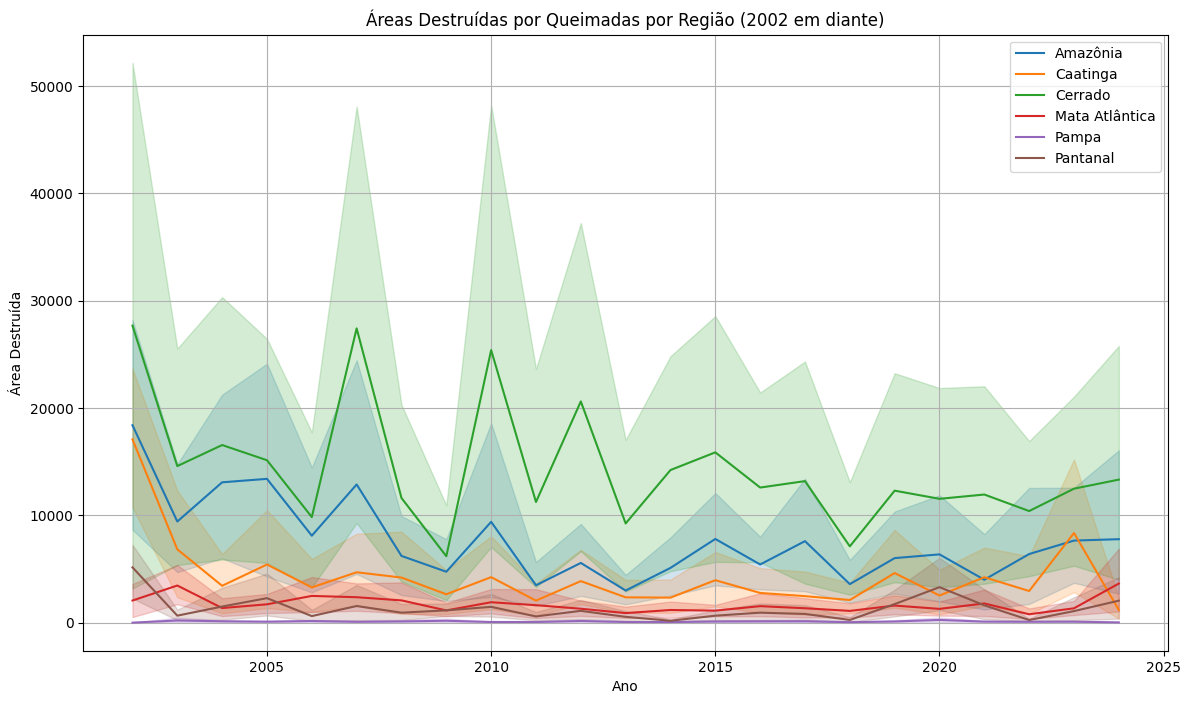

In [14]:
# 4. Geração de Gráficos

# Gráfico de Linhas: Áreas destruídas por região ao longo dos anos
plt.figure(figsize=(14, 8))
for regiao in regioes[:-1]:  # Exclui o 'Total mensal' do loop
    sns.lineplot(data=df, x='Ano', y=regiao, label=regiao)
plt.title('Áreas Destruídas por Queimadas por Região (2002 em diante)')
plt.xlabel('Ano')
plt.ylabel('Área Destruída')
plt.legend()
plt.grid(True)
plt.show()



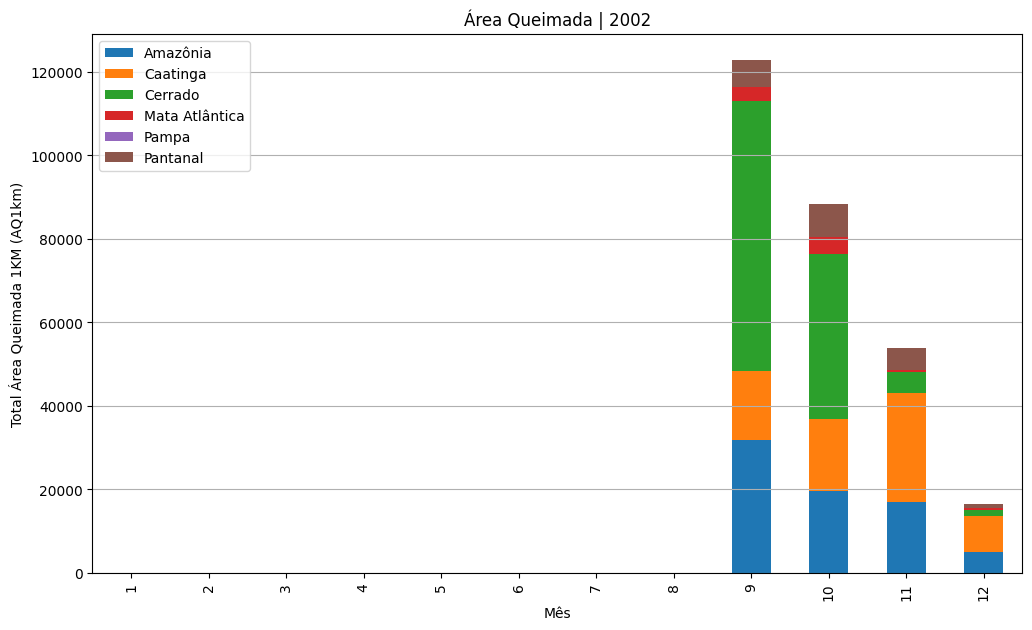

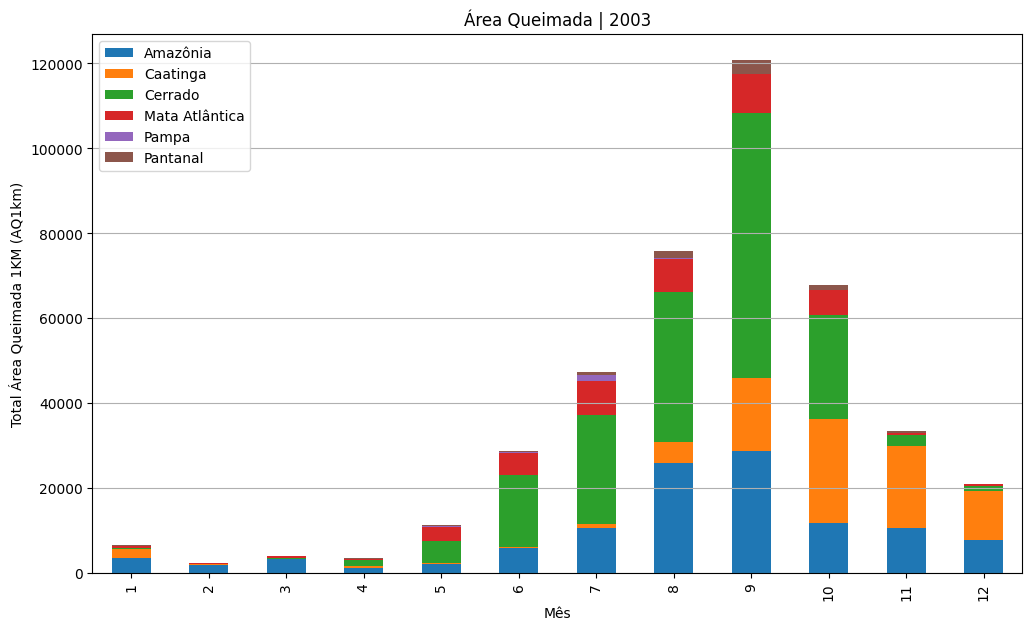

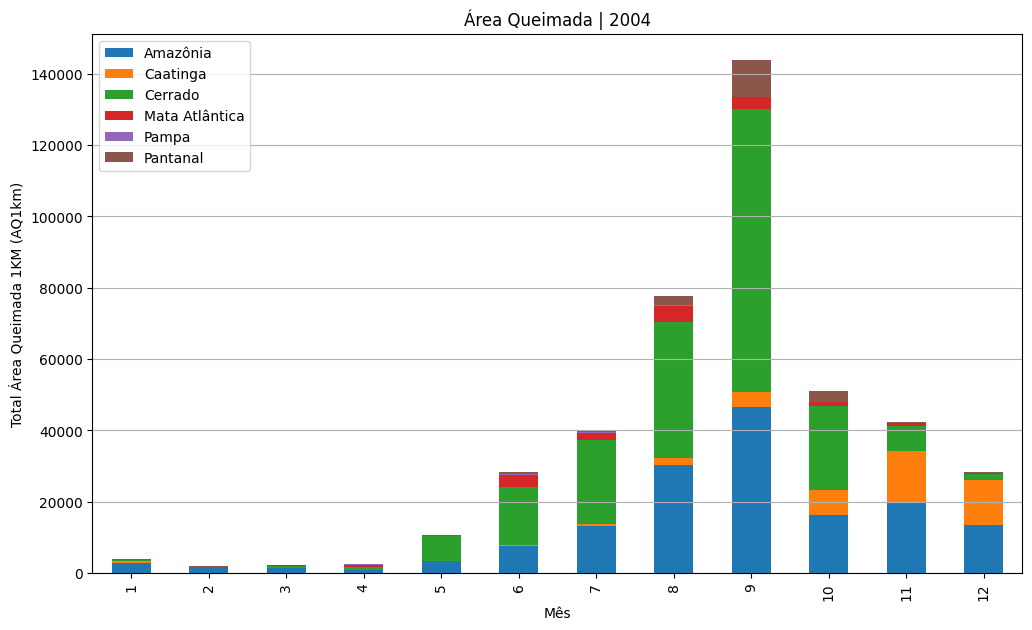

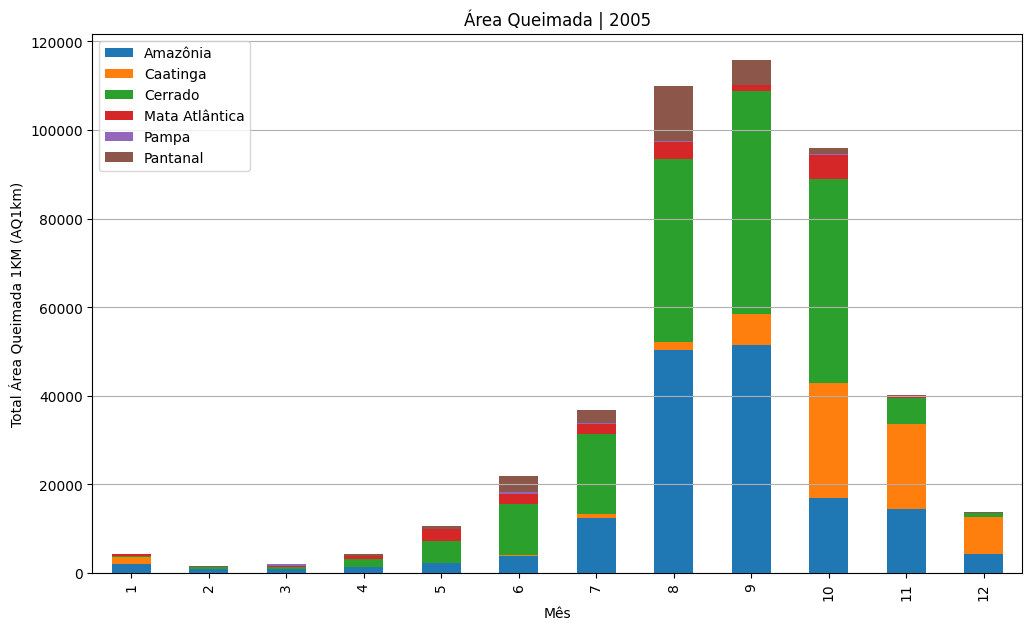

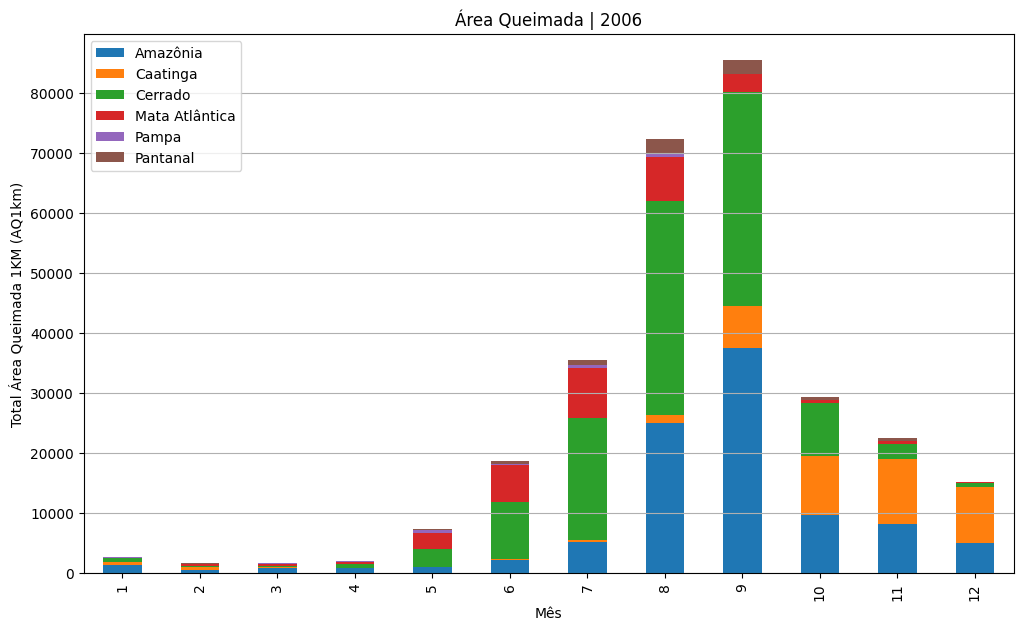

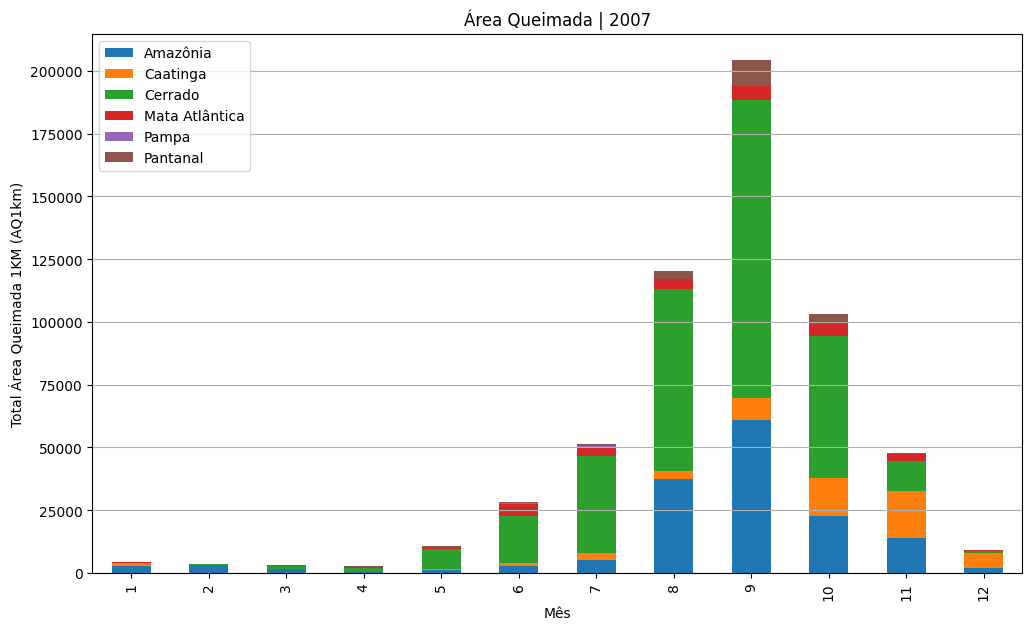

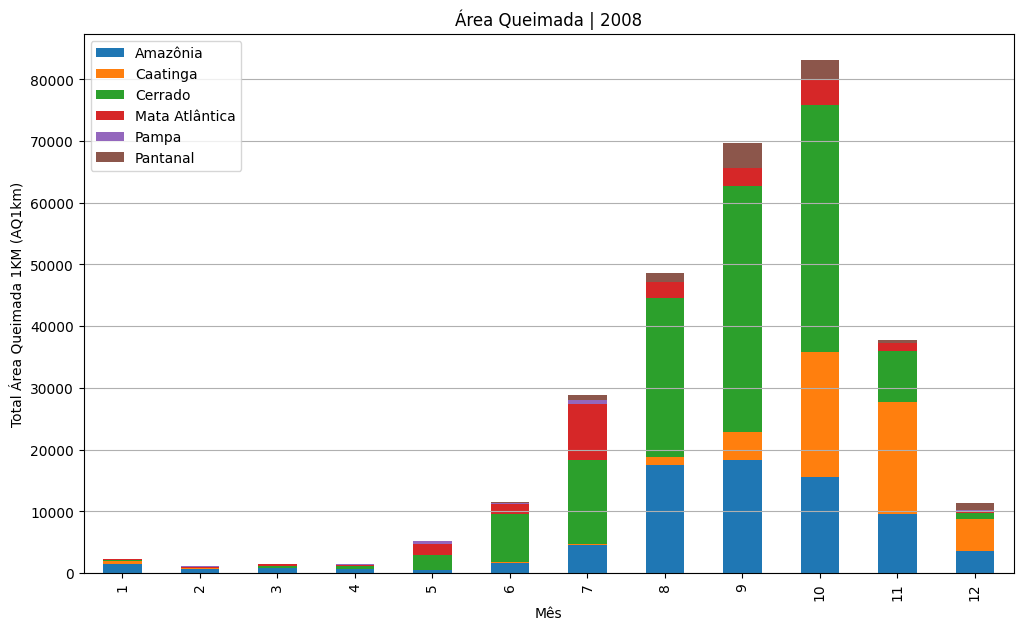

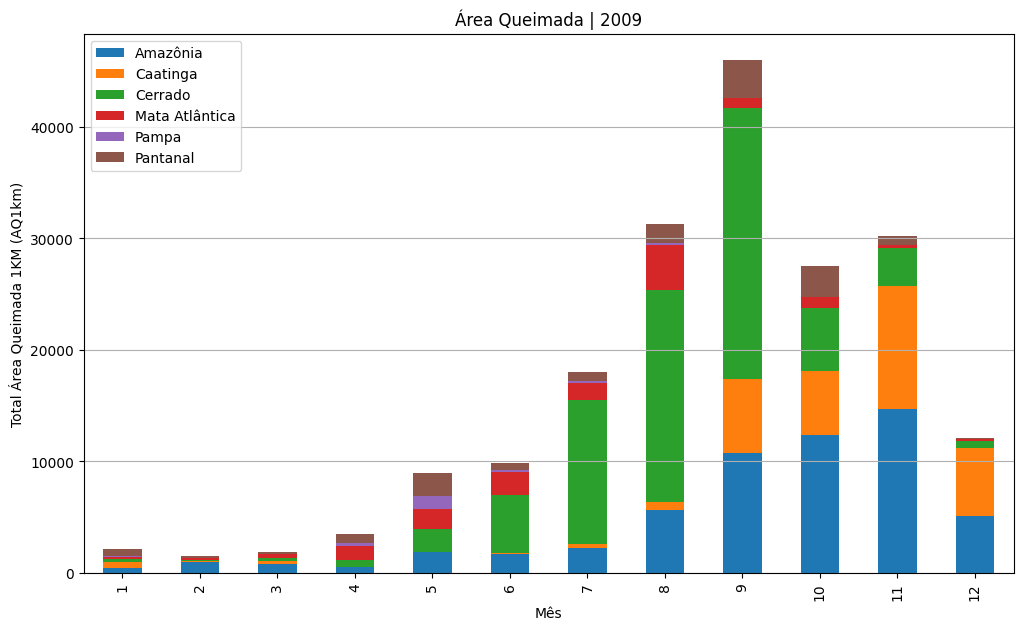

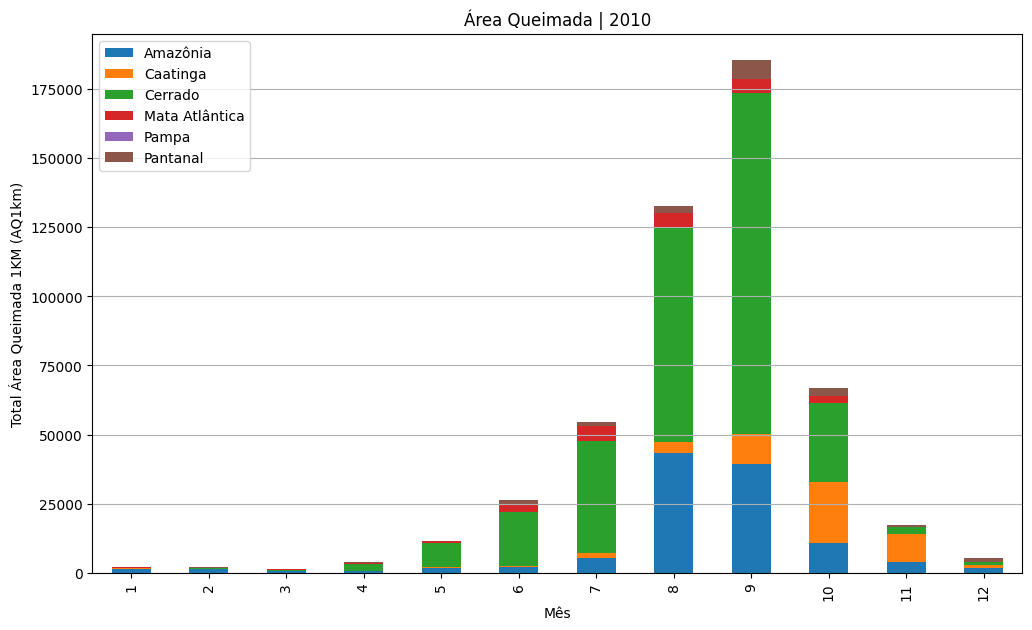

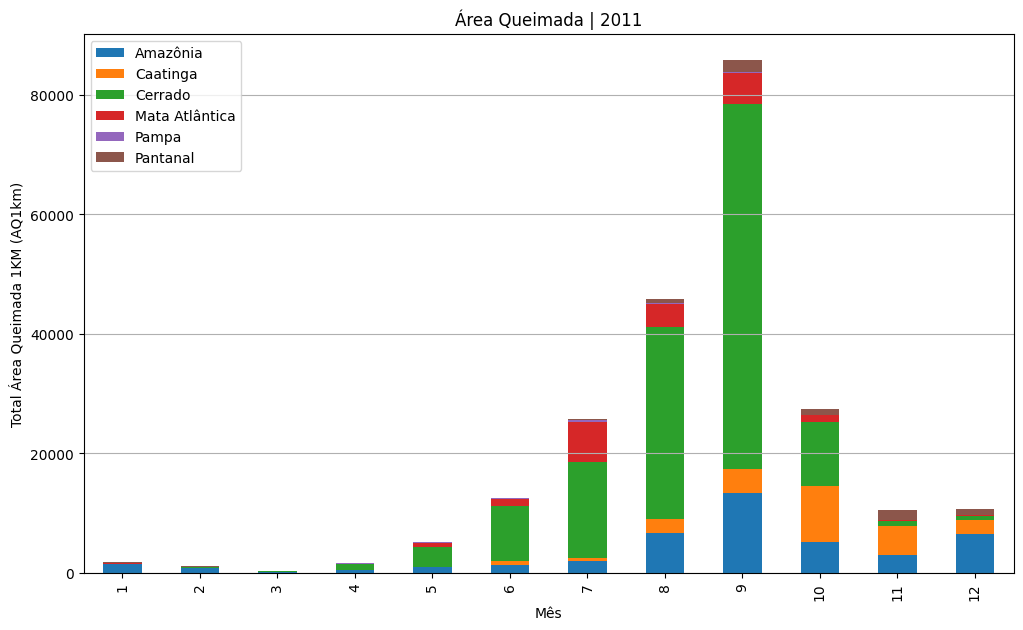

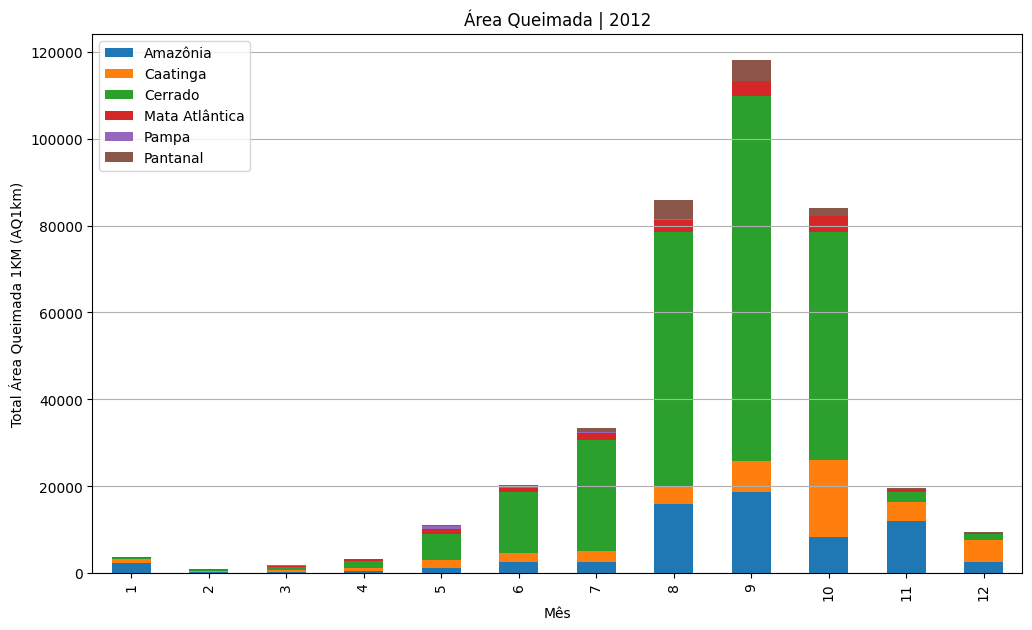

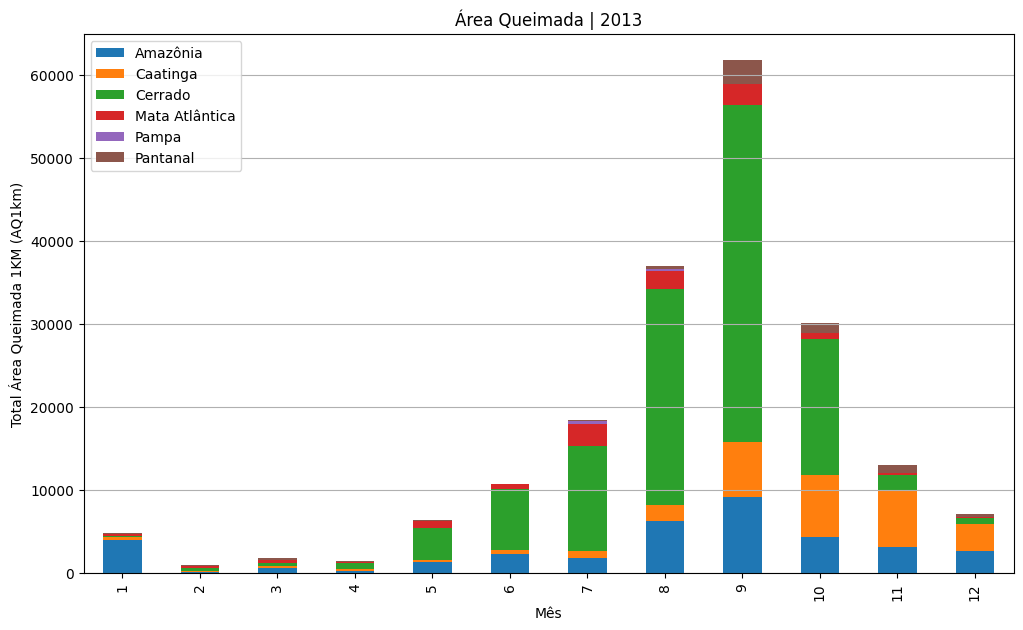

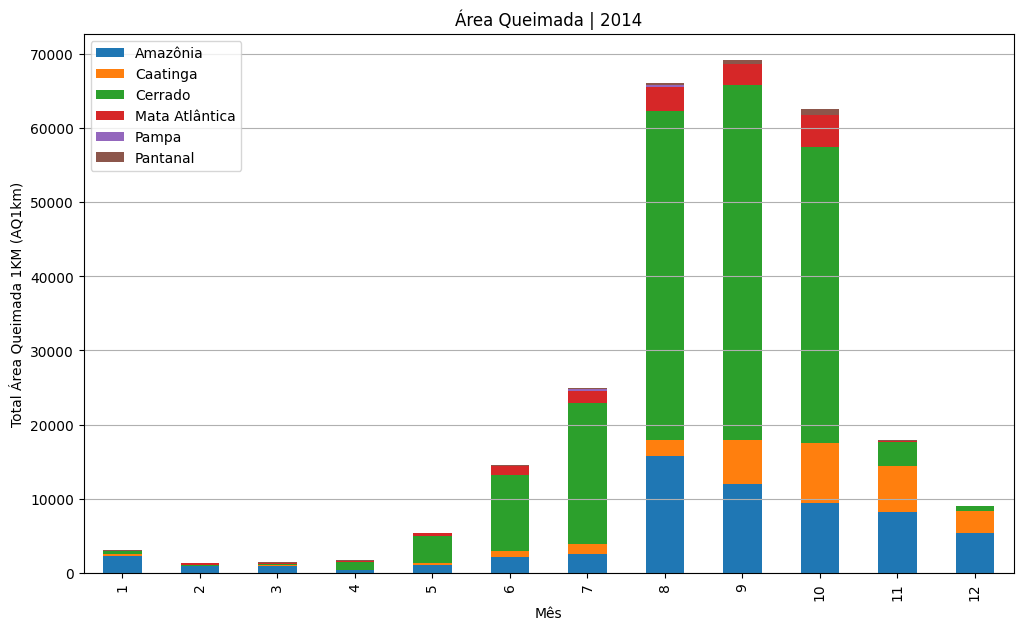

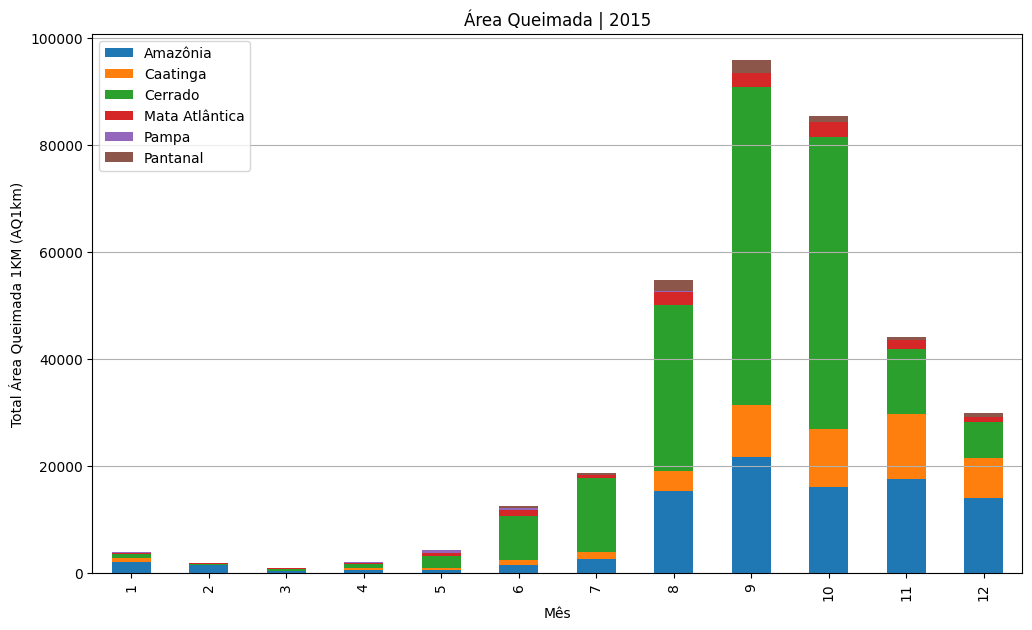

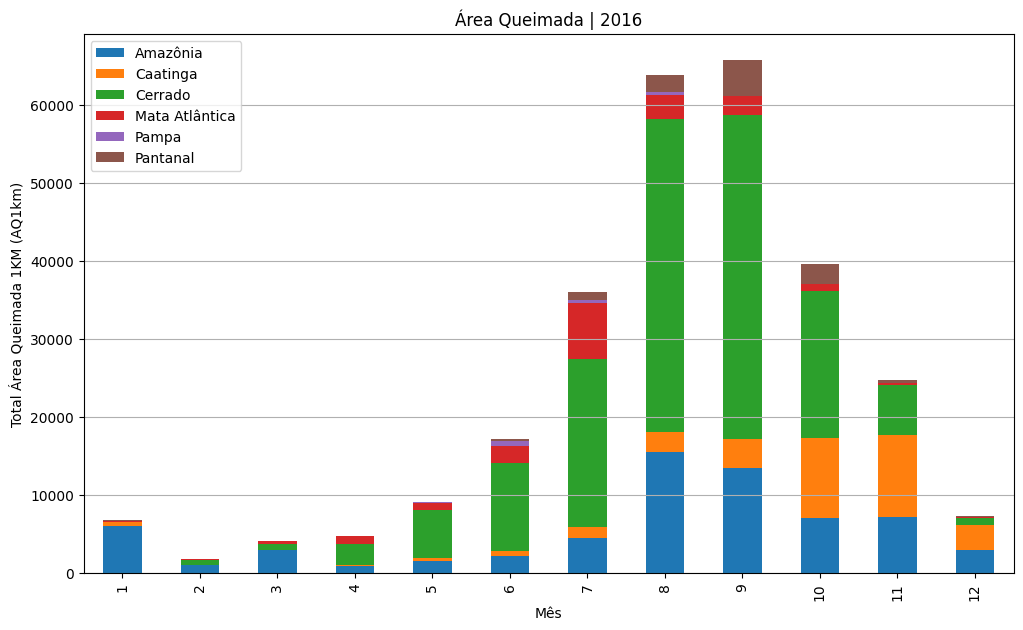

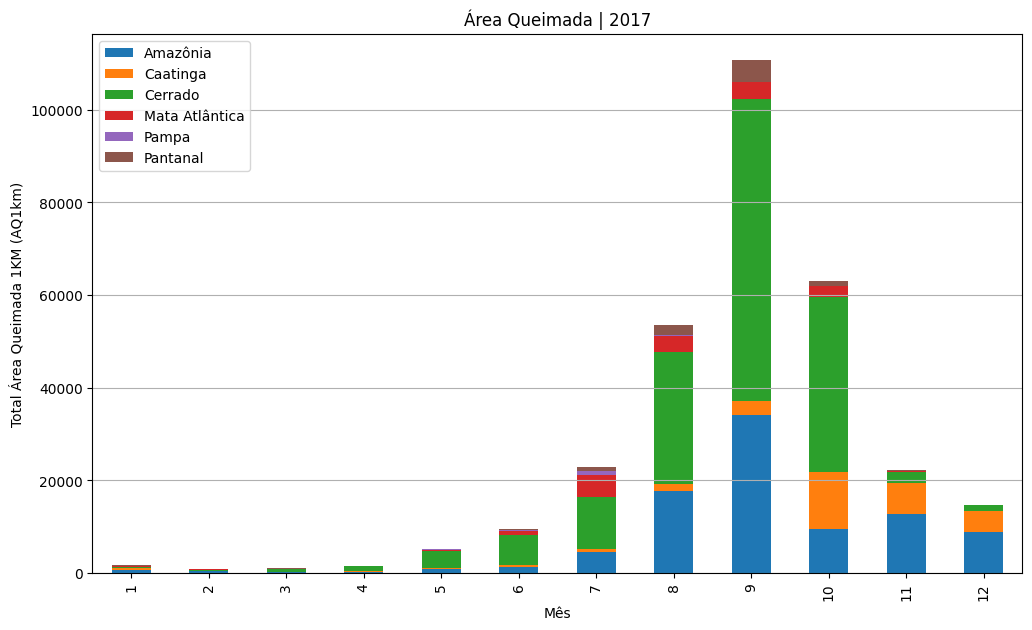

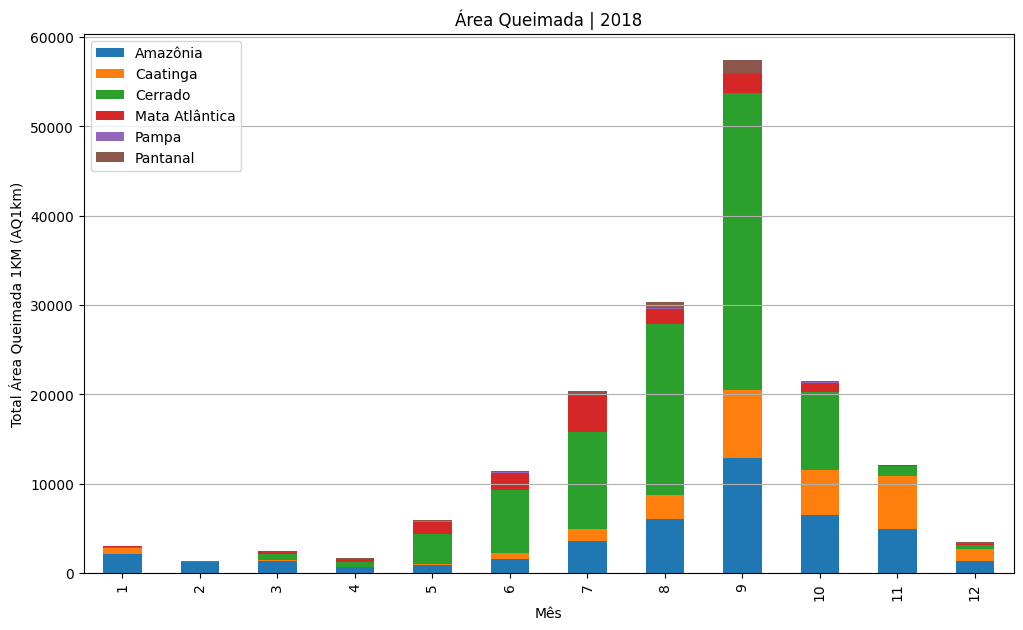

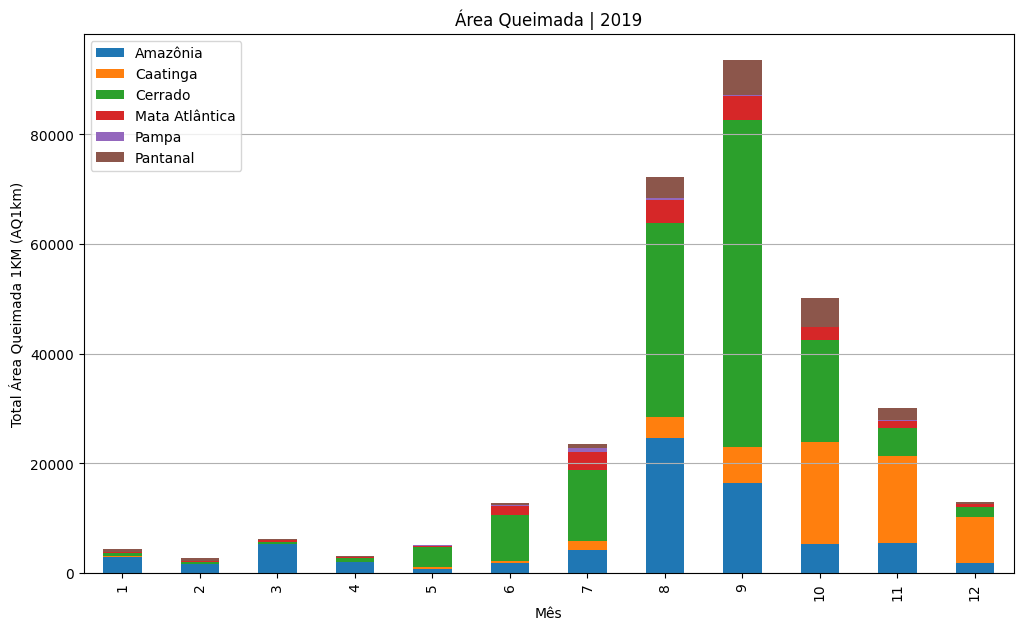

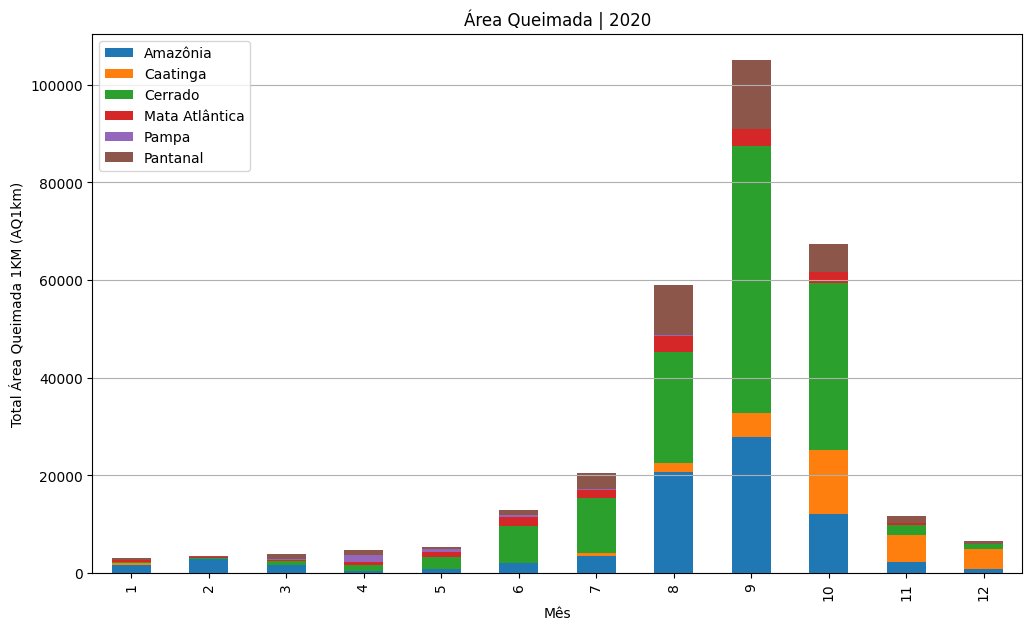

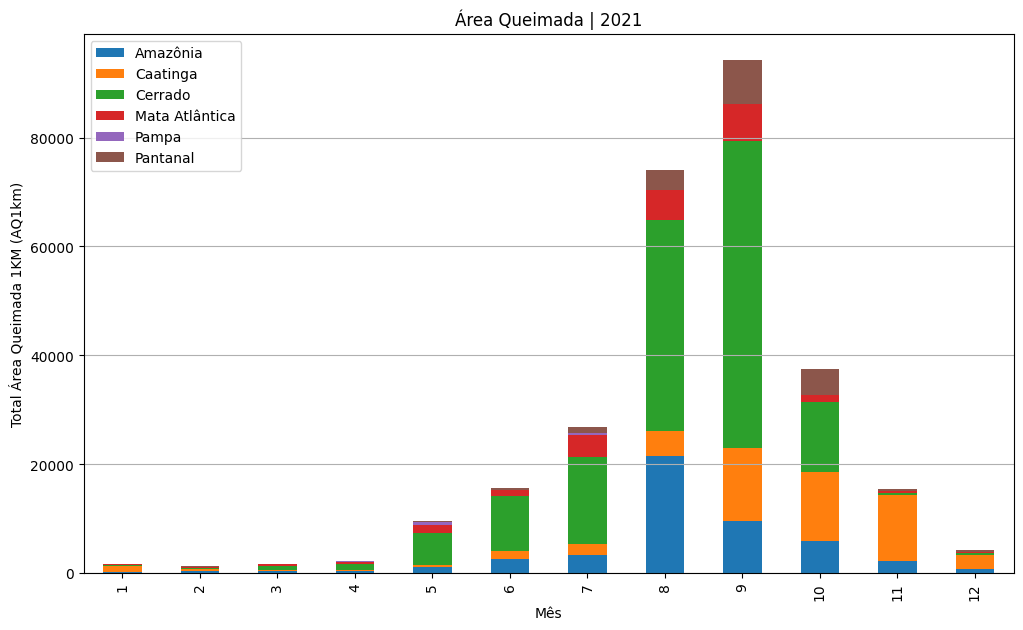

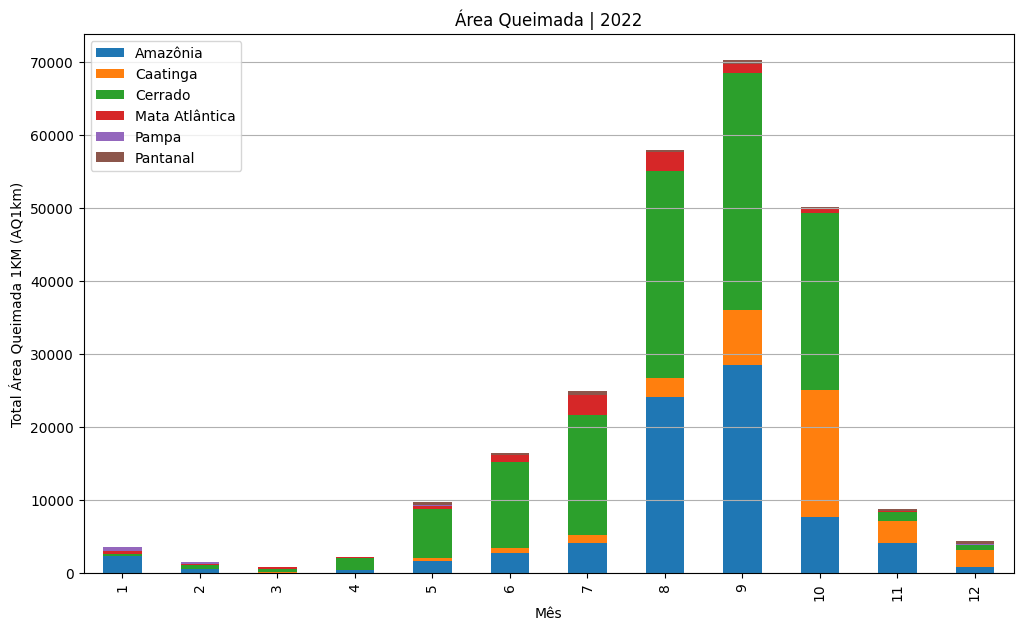

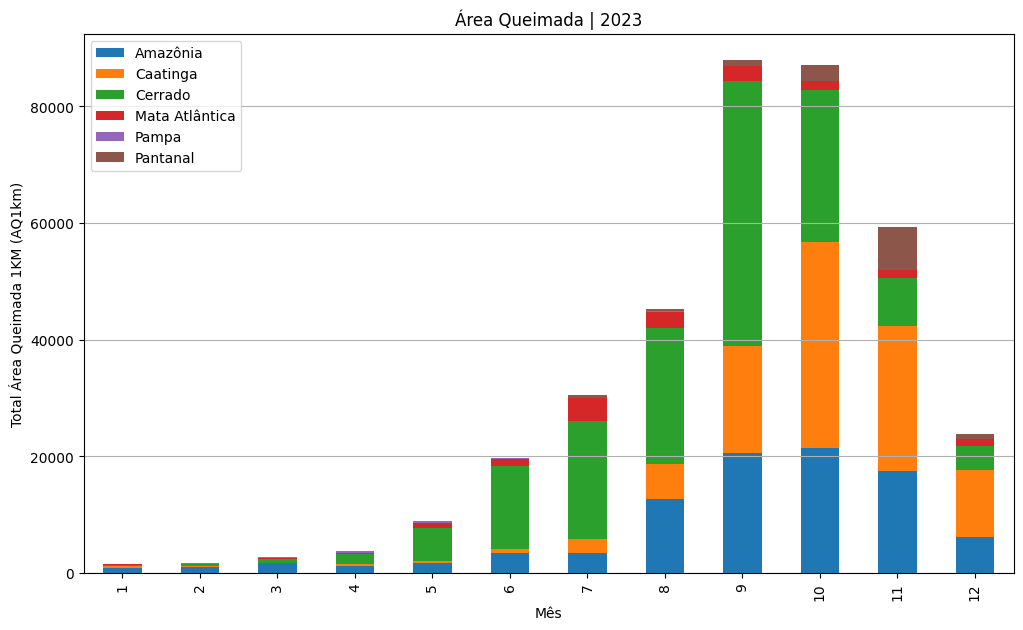

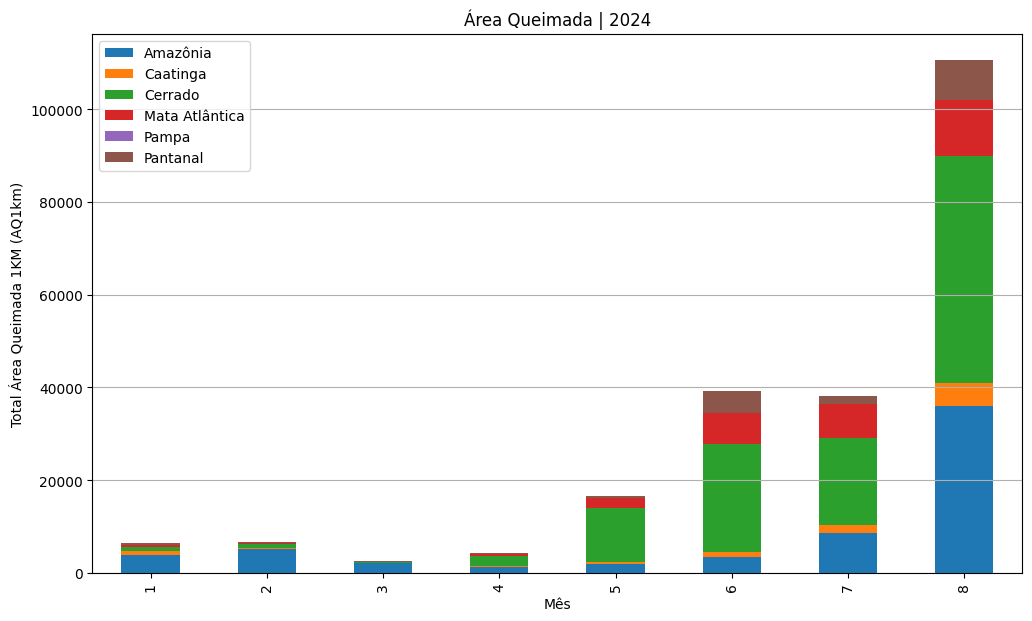

In [6]:
# Gráfico de Barras: Total de áreas destruídas por região em um ano específico (exemplo: 2020)
for ano in range(2002, 2025):
    ano_especifico = ano
    df_ano = df[df['Ano'] == ano_especifico].groupby('Mês')[regioes[:-1]].sum()
    df_ano.plot(kind='bar', stacked=True, figsize=(12, 7))
    plt.title(f'Área Queimada | {ano_especifico}')
    plt.xlabel('Mês')
    plt.ylabel('Total Área Queimada 1KM (AQ1km)')
    plt.legend(loc='upper left')
    plt.grid(axis='y')
    plt.show()



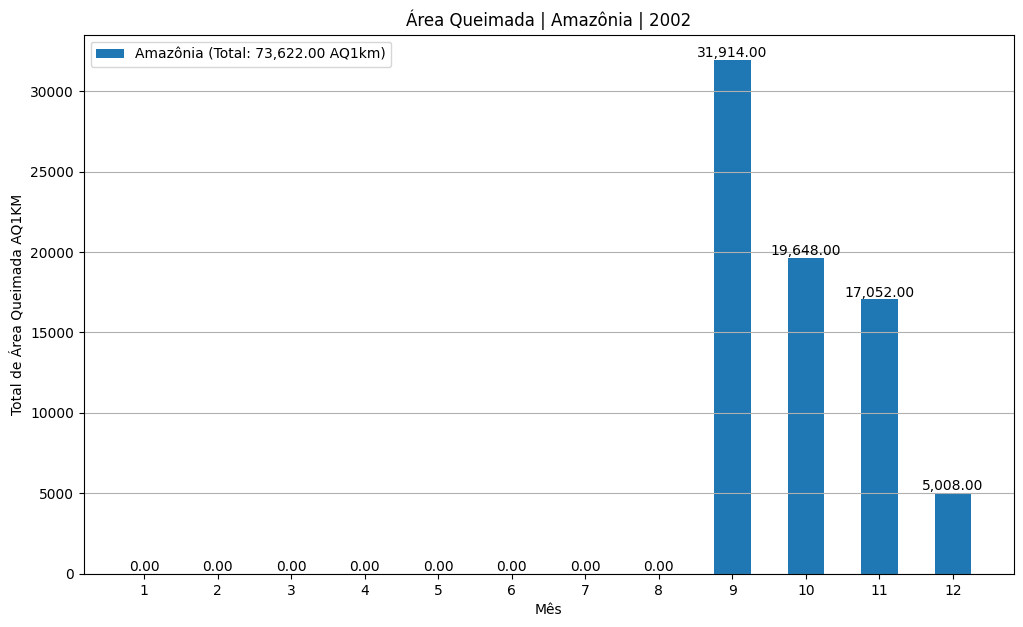

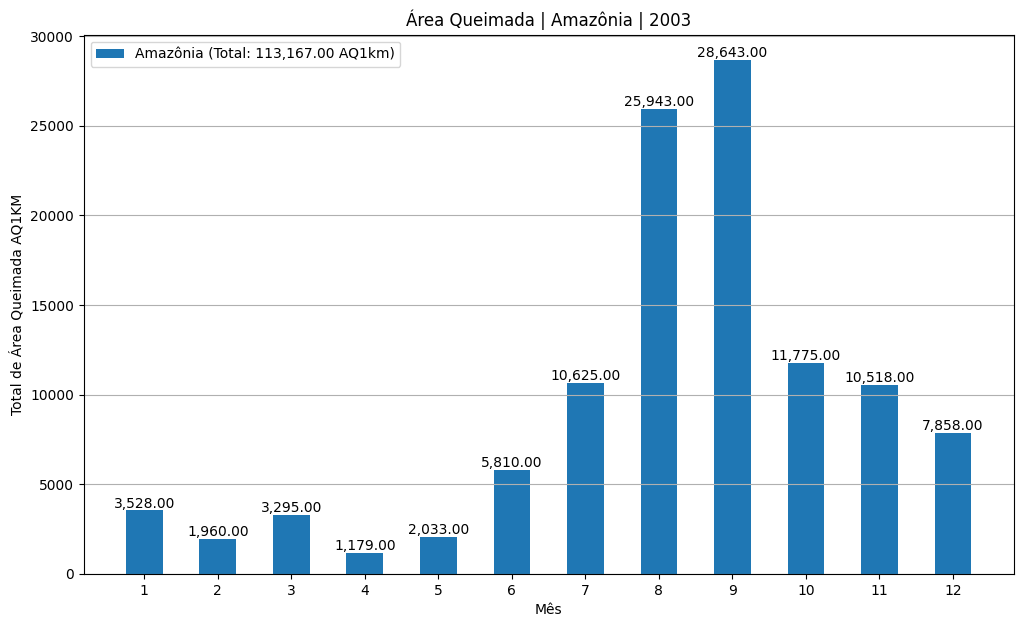

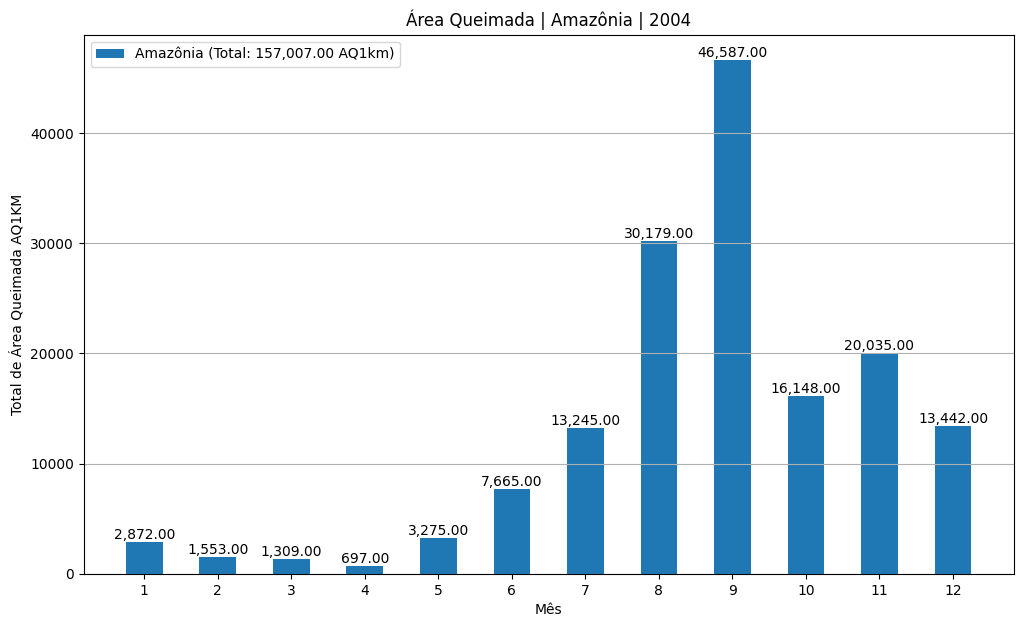

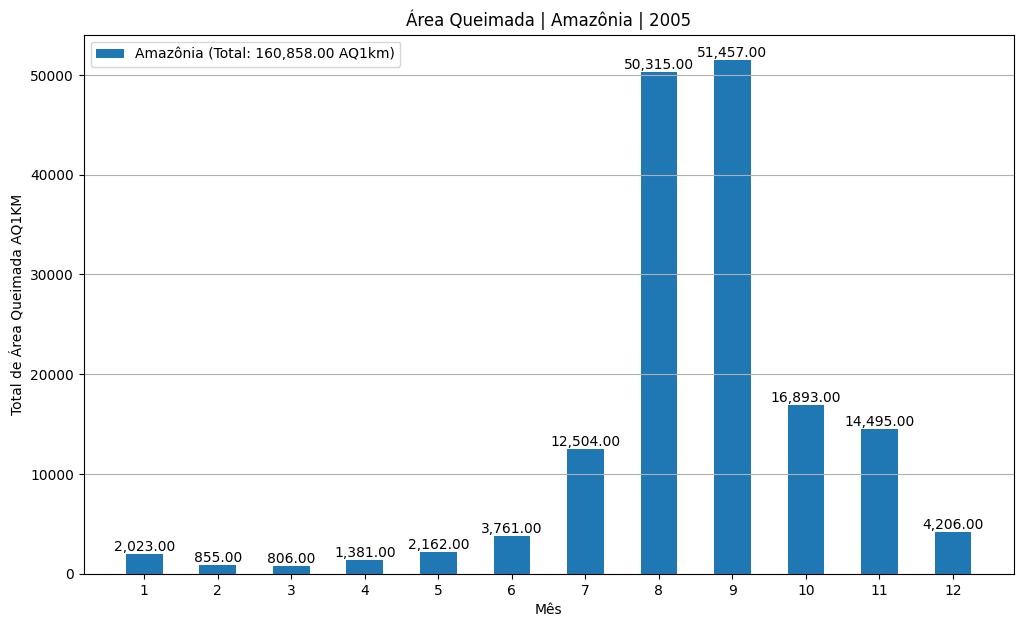

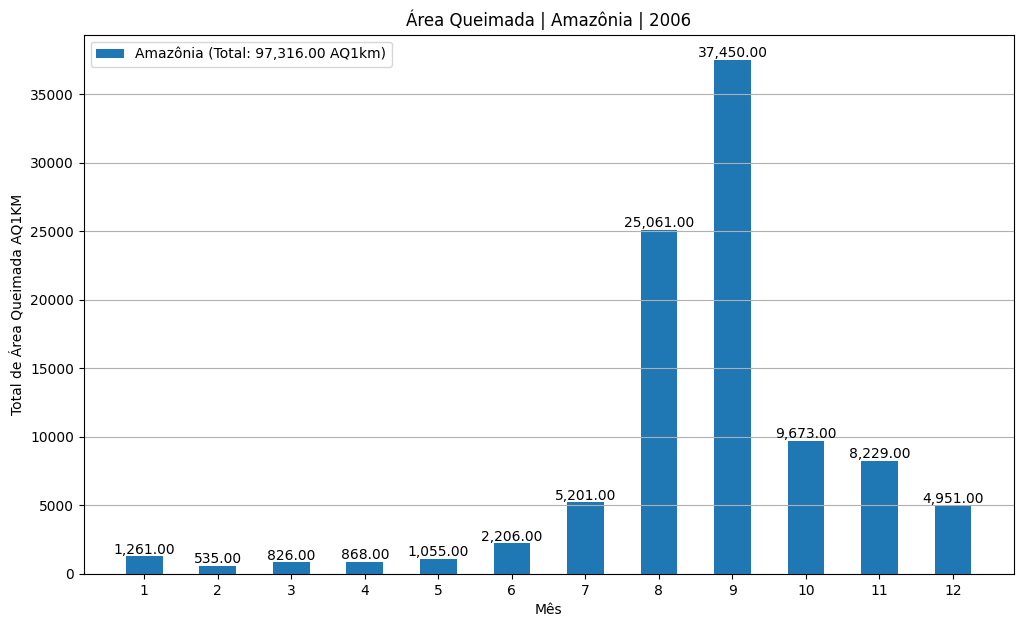

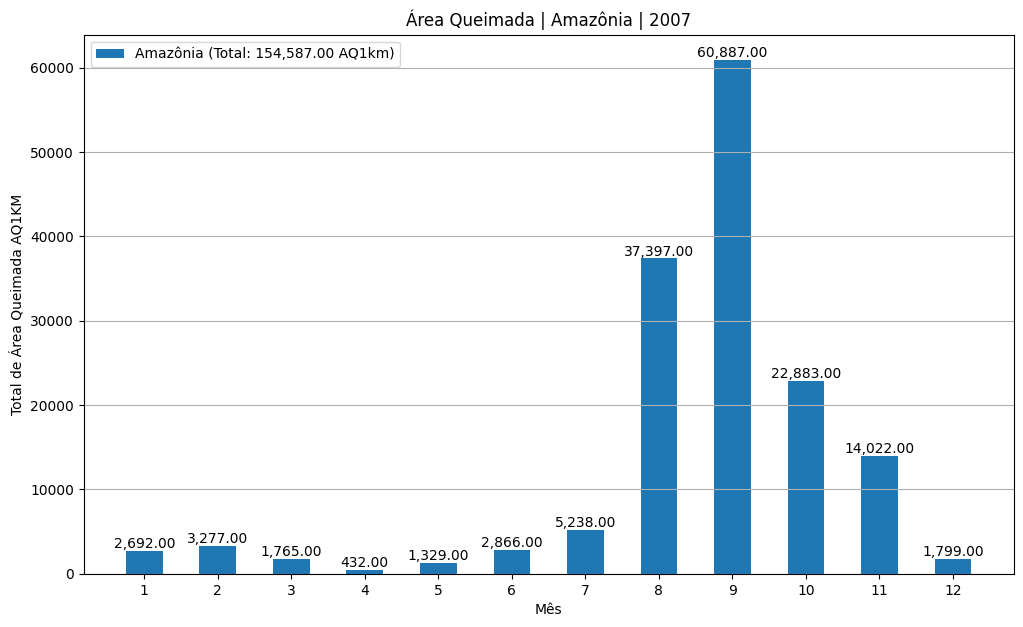

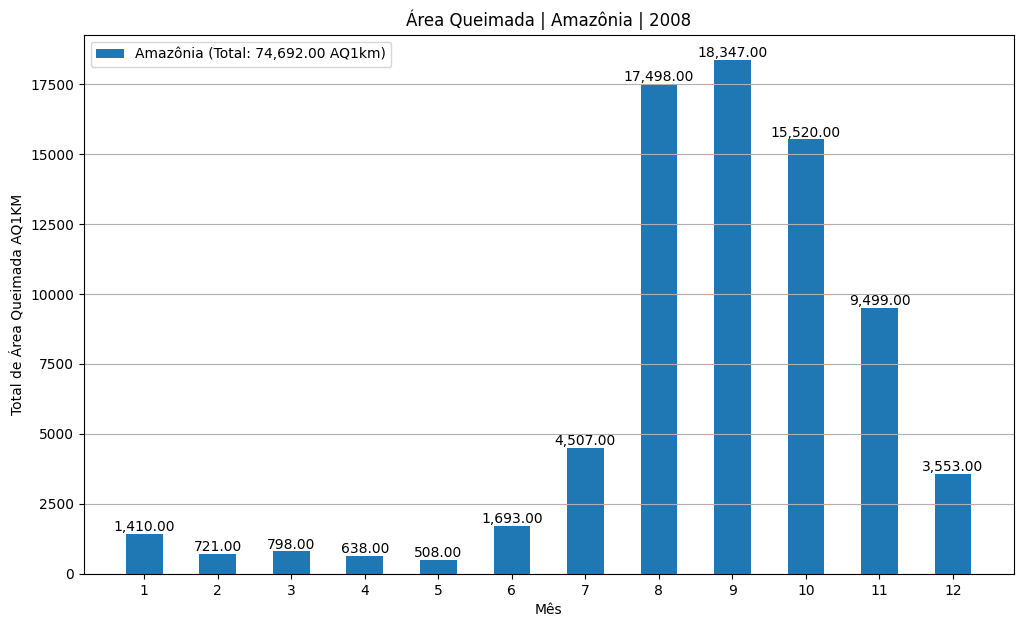

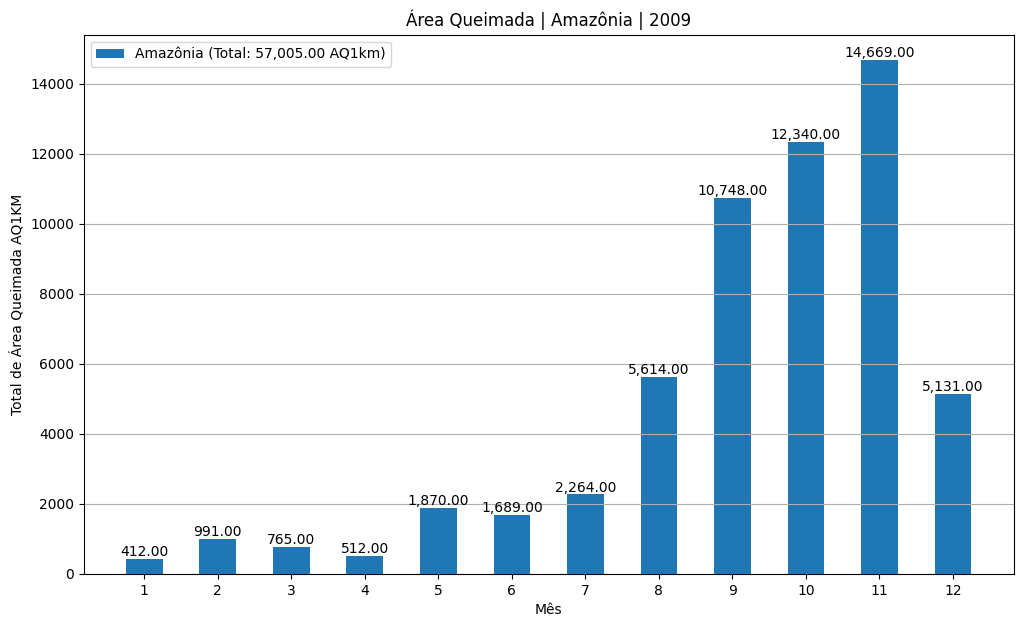

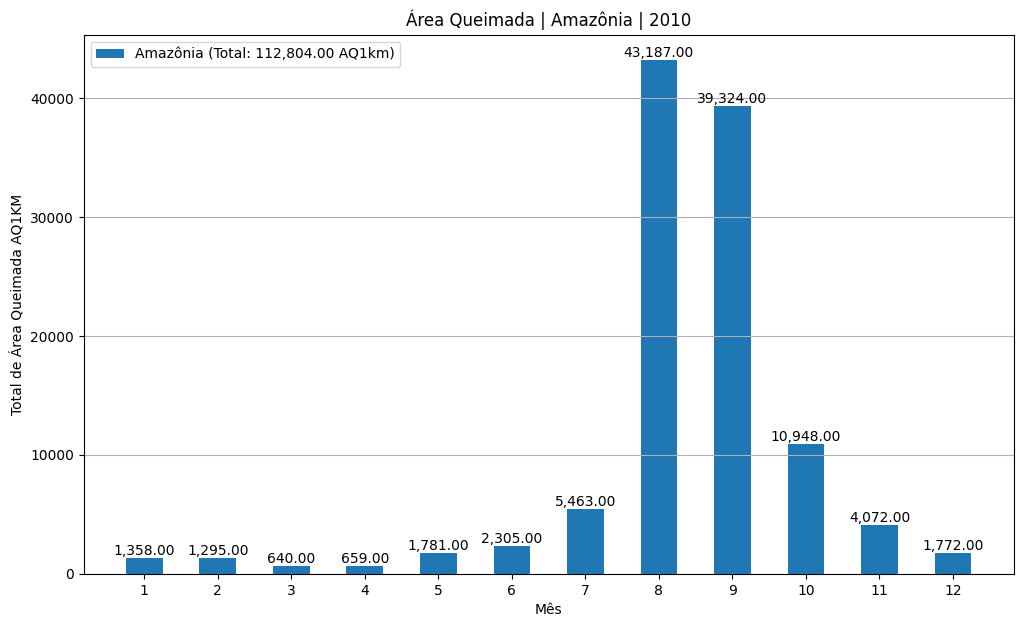

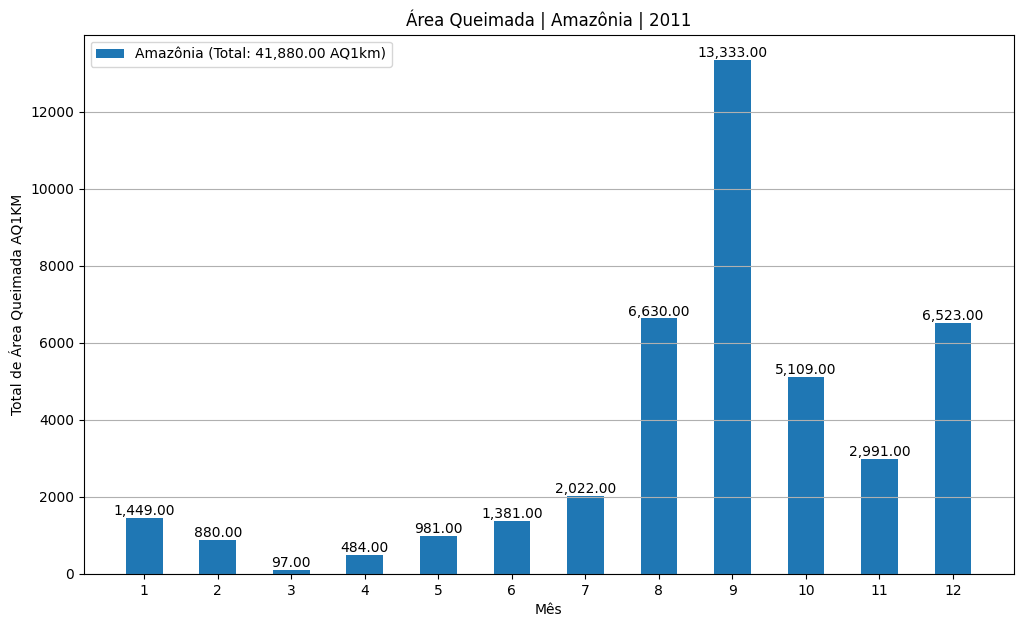

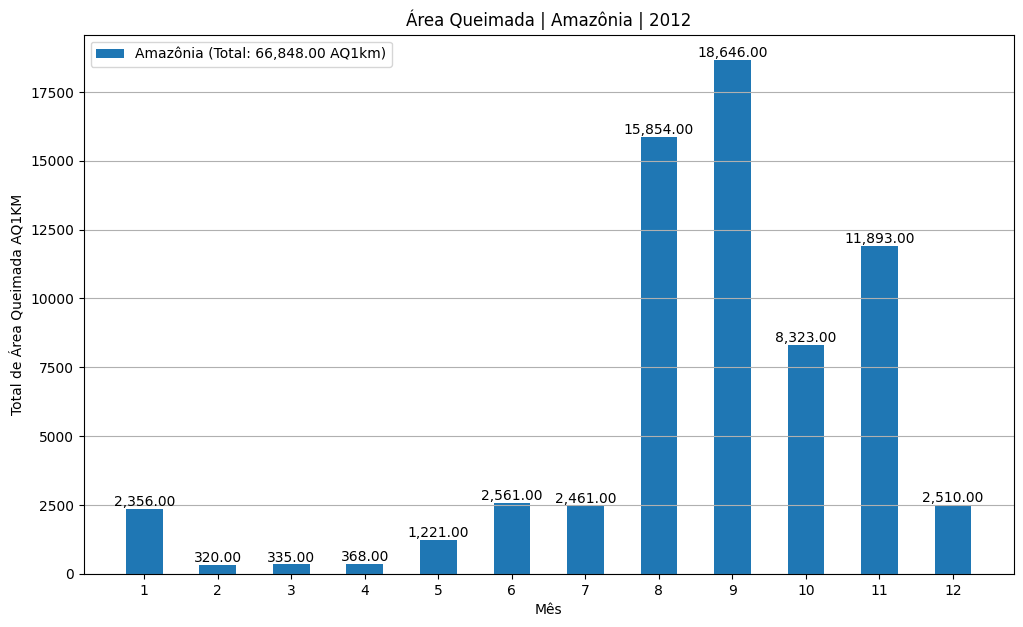

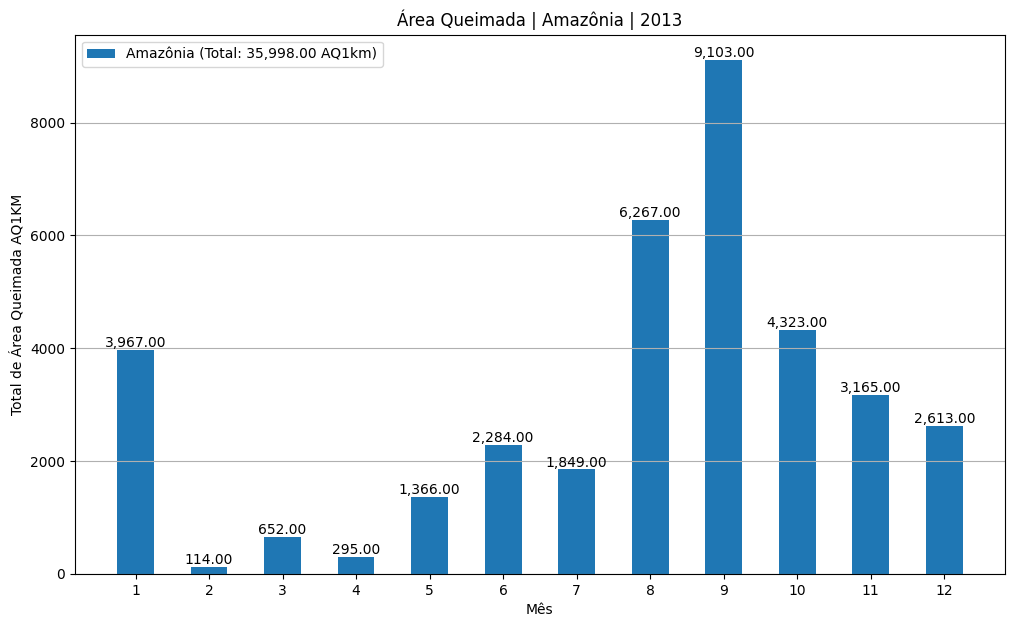

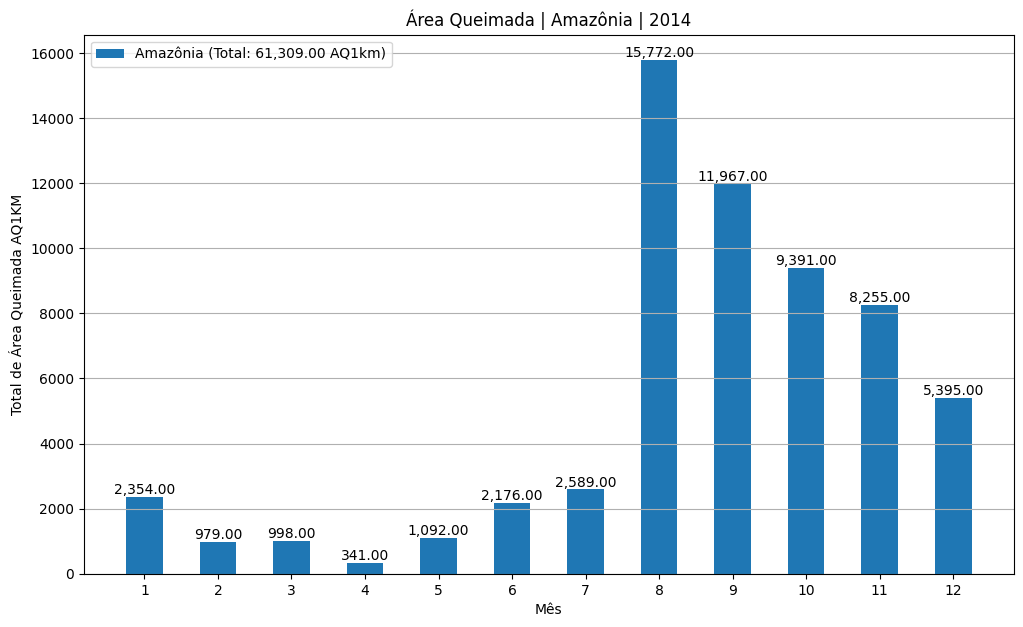

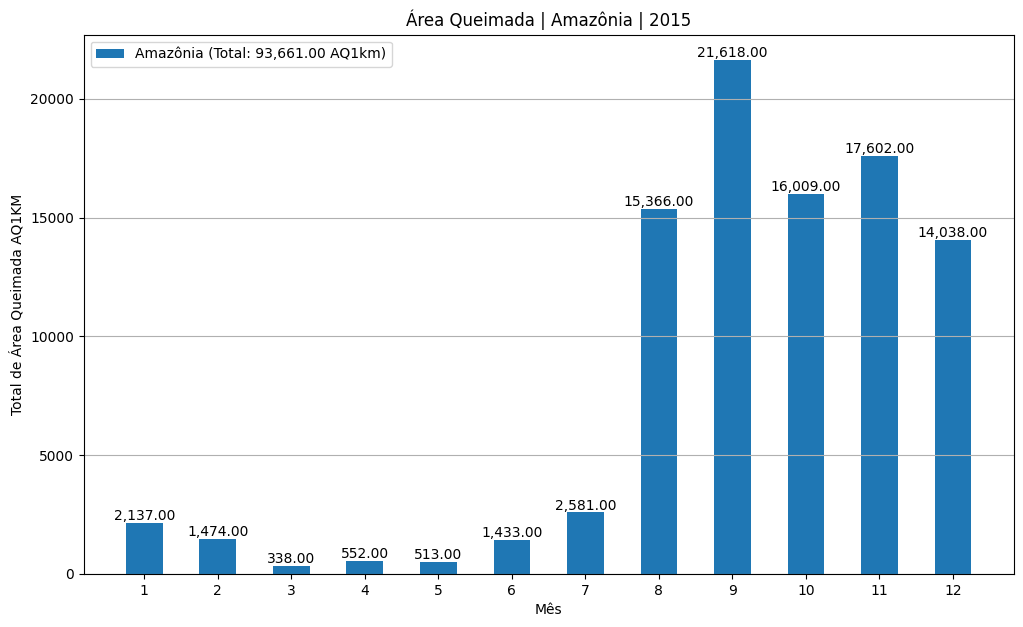

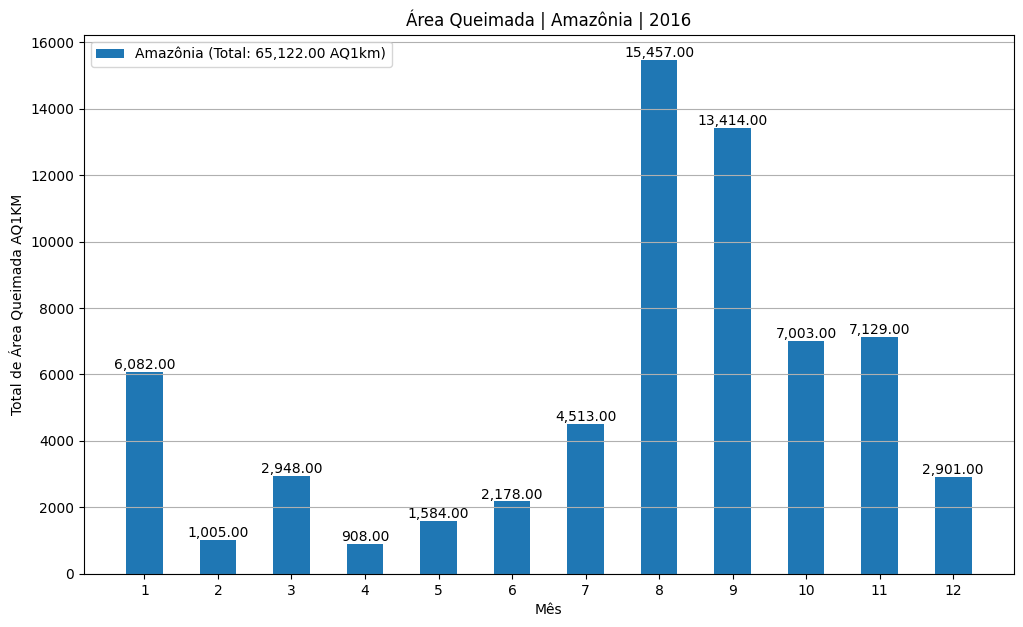

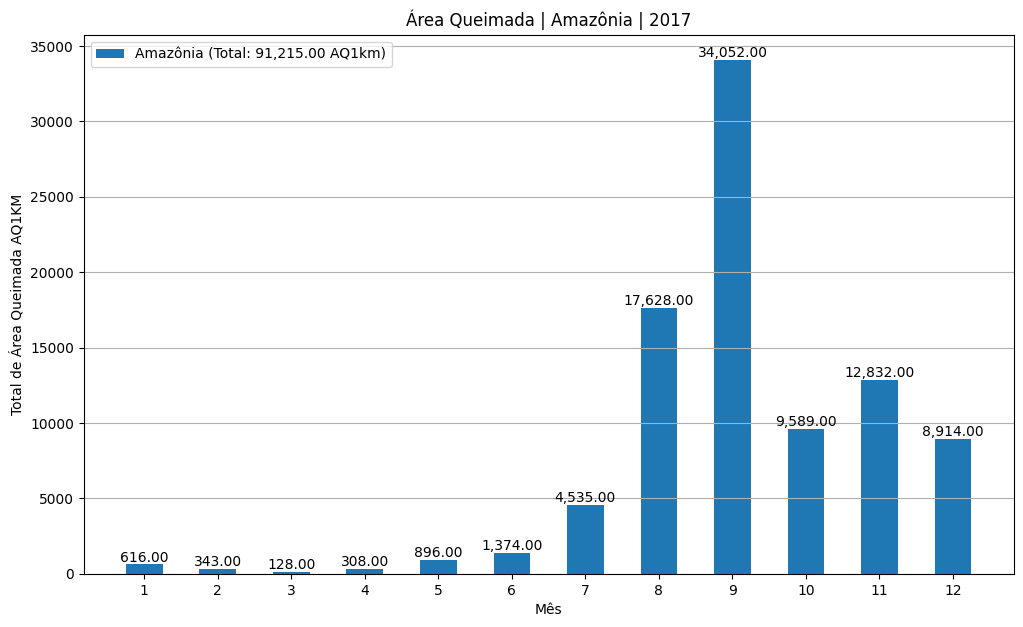

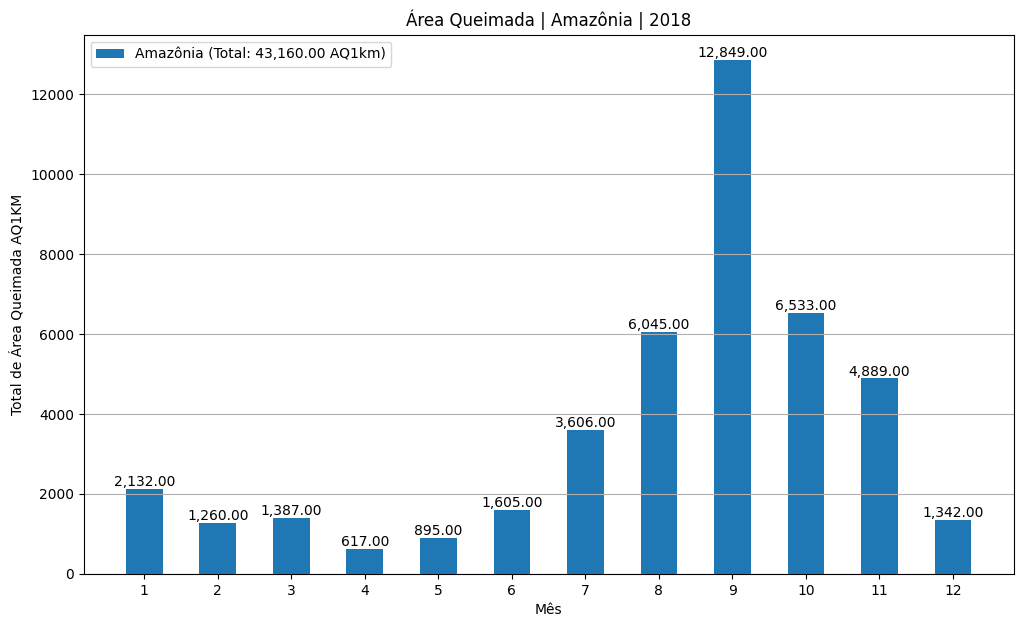

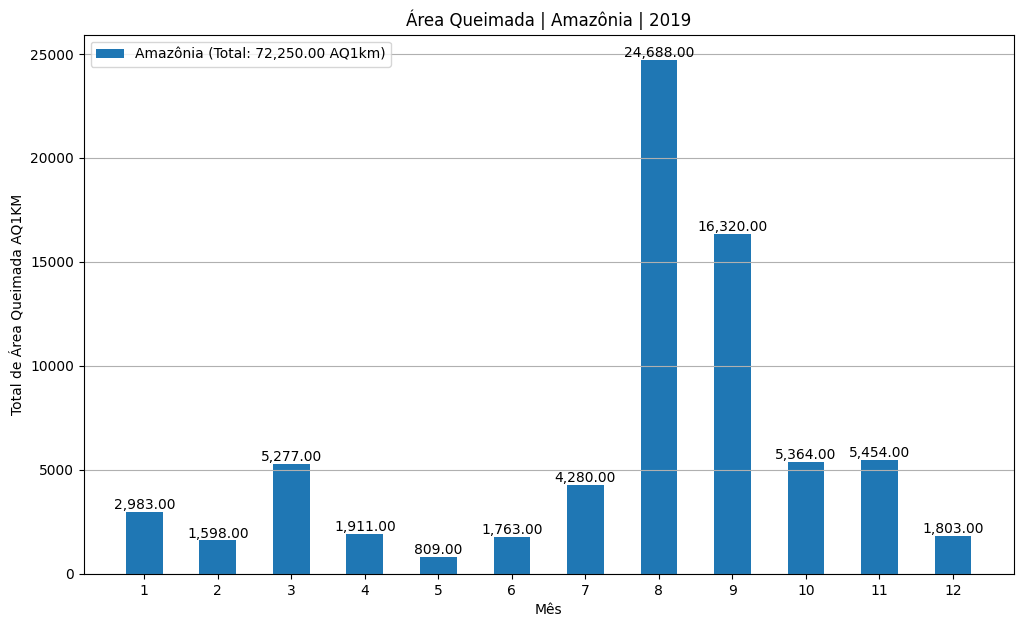

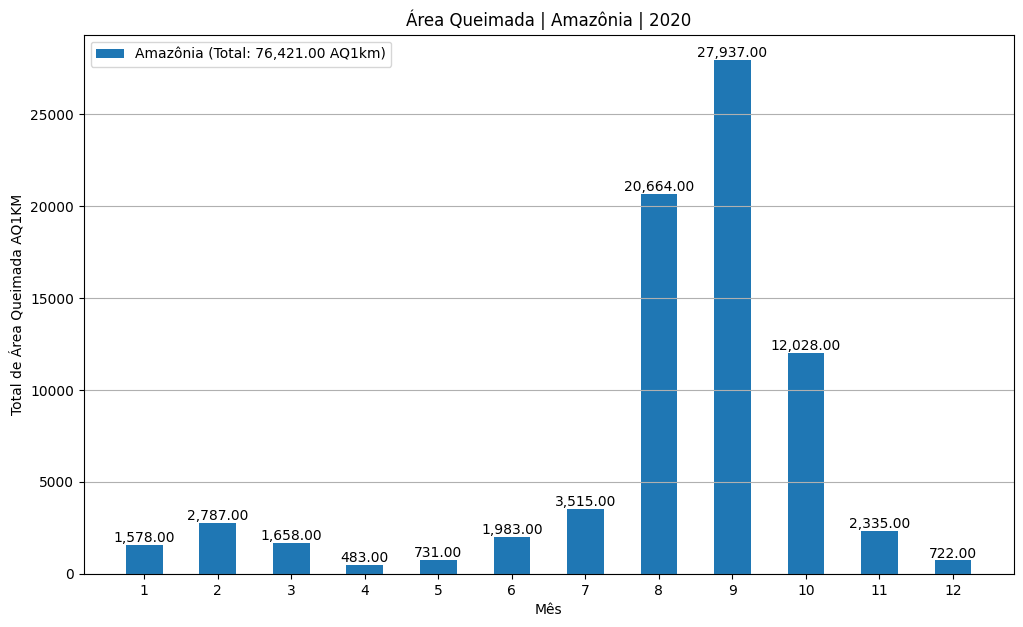

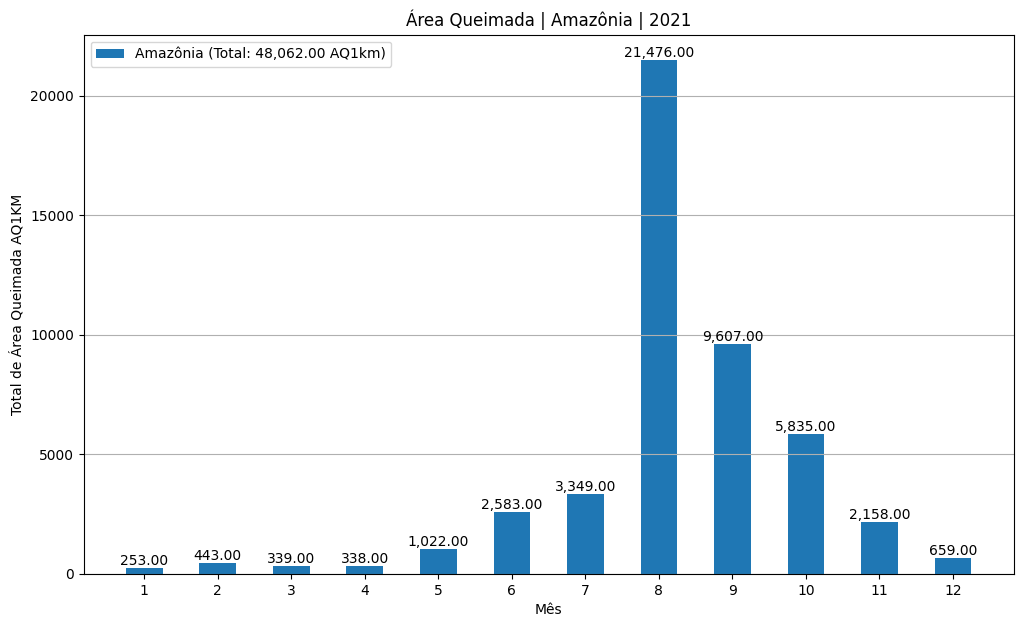

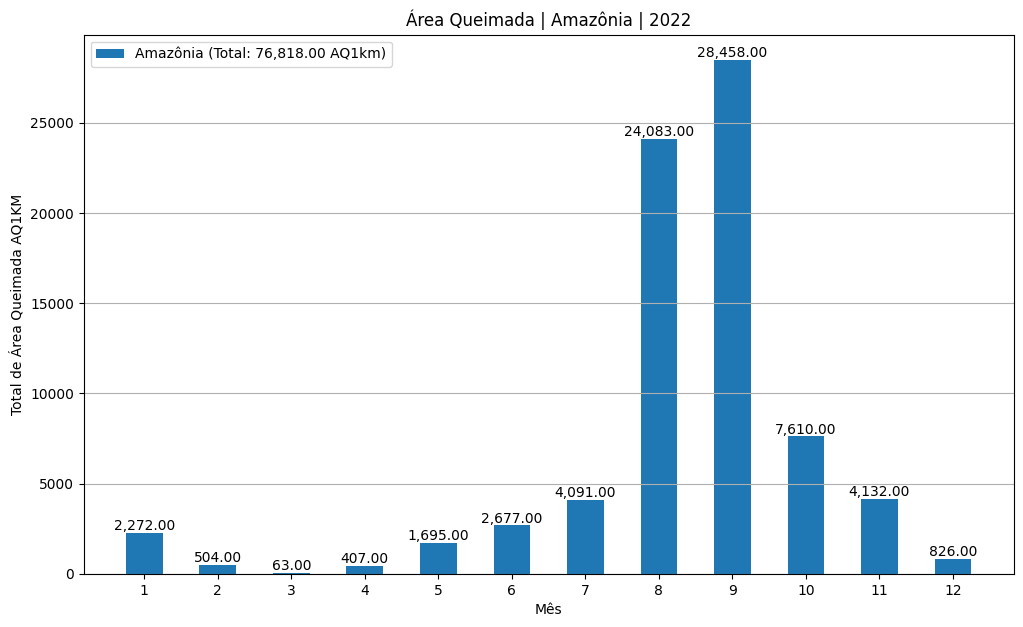

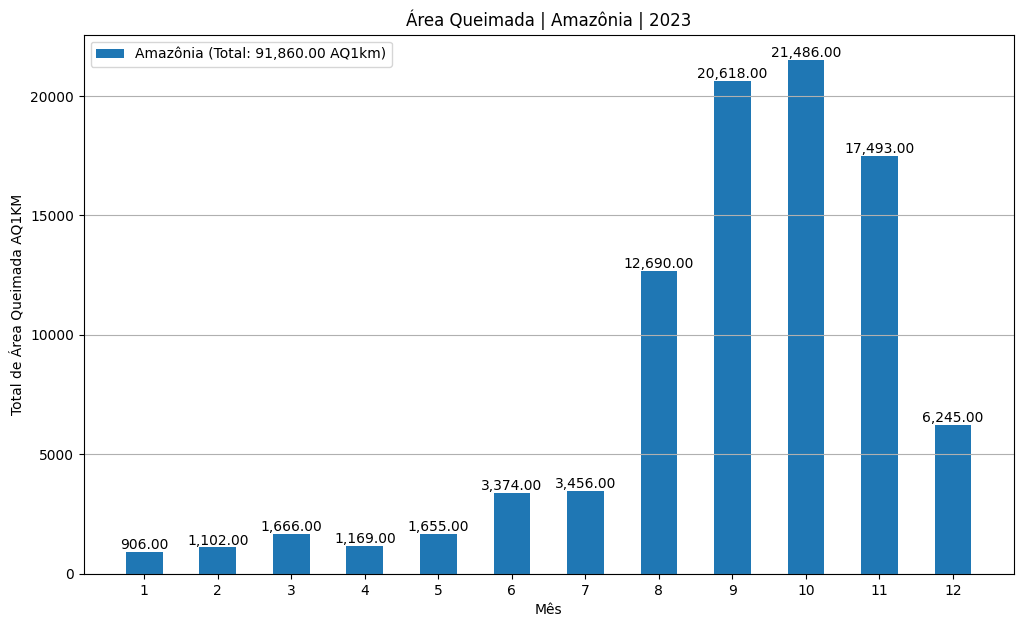

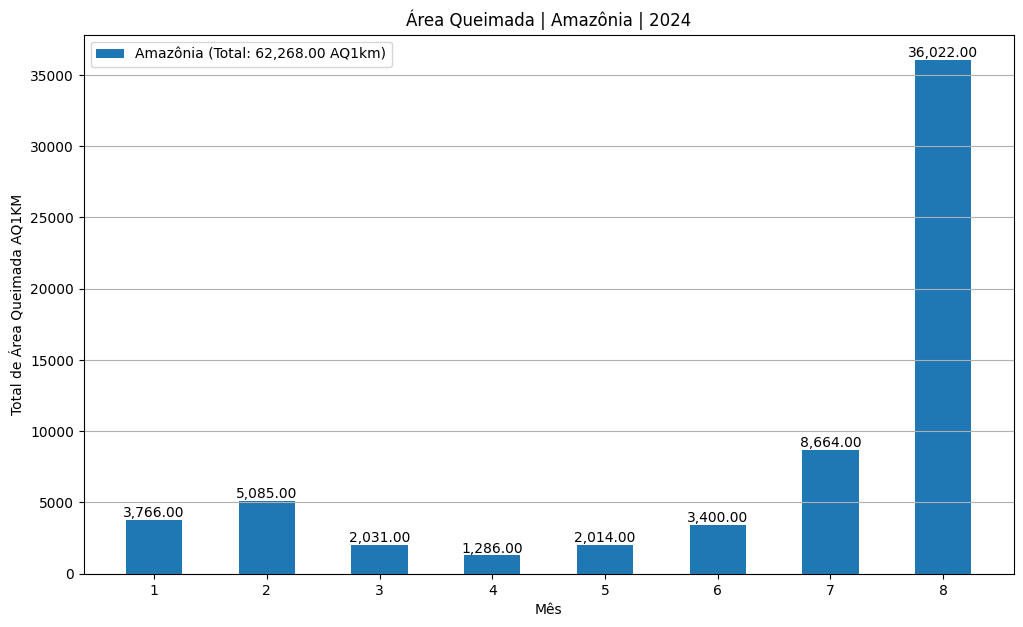

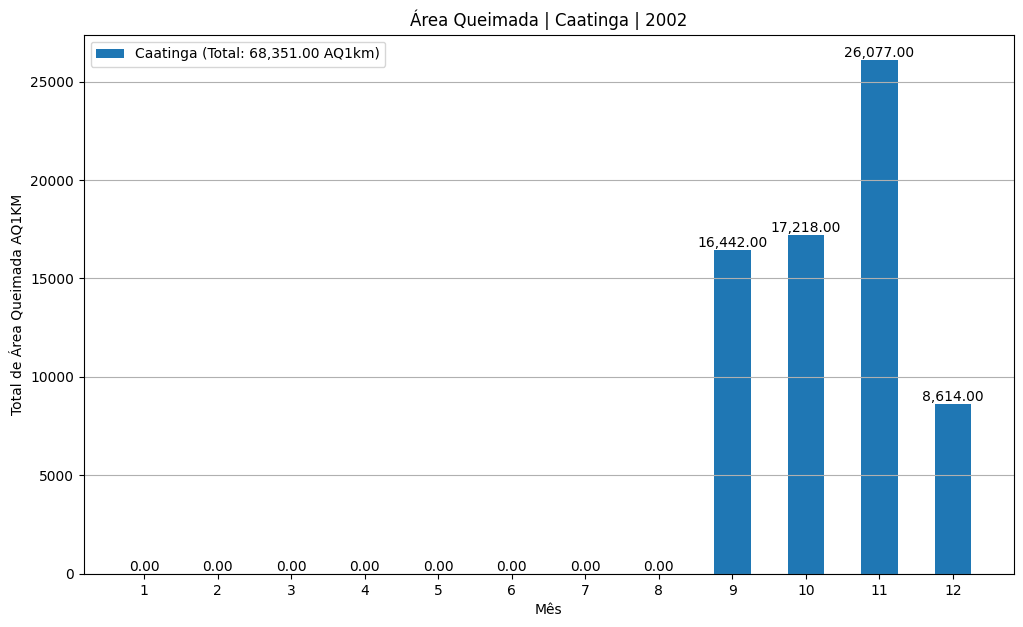

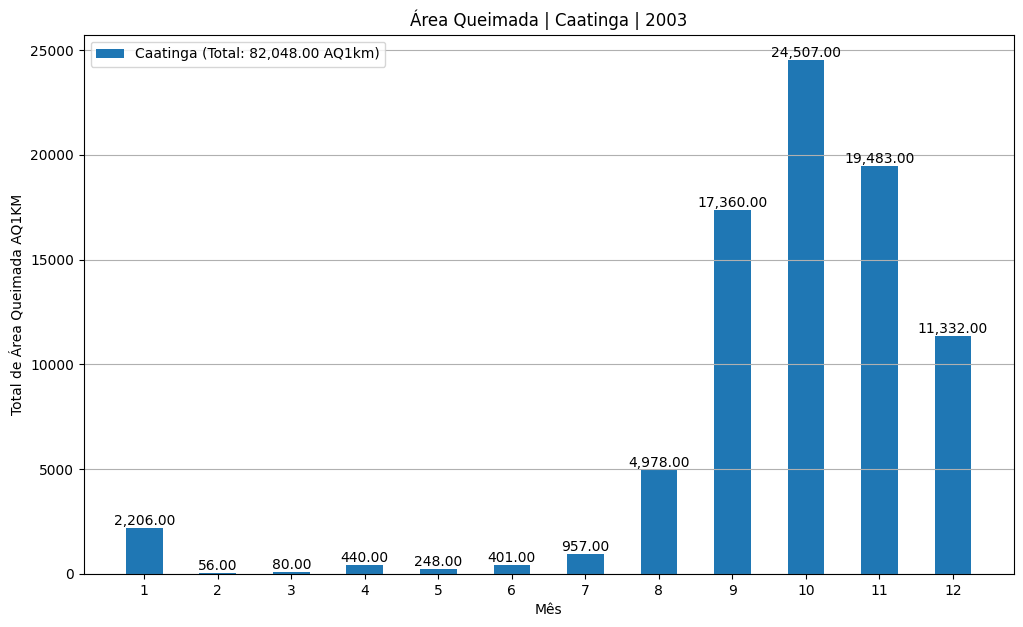

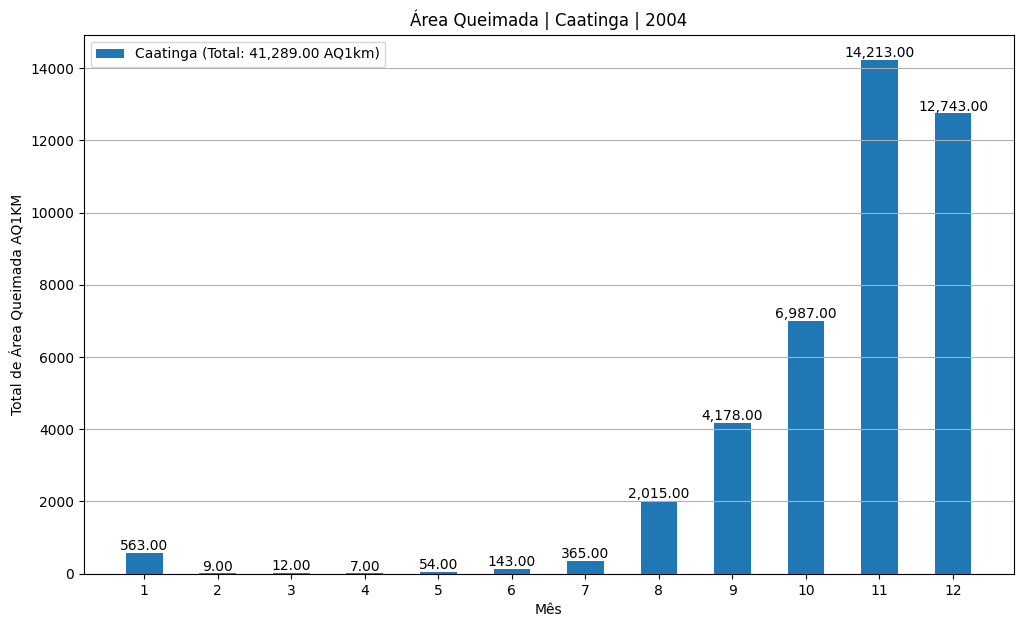

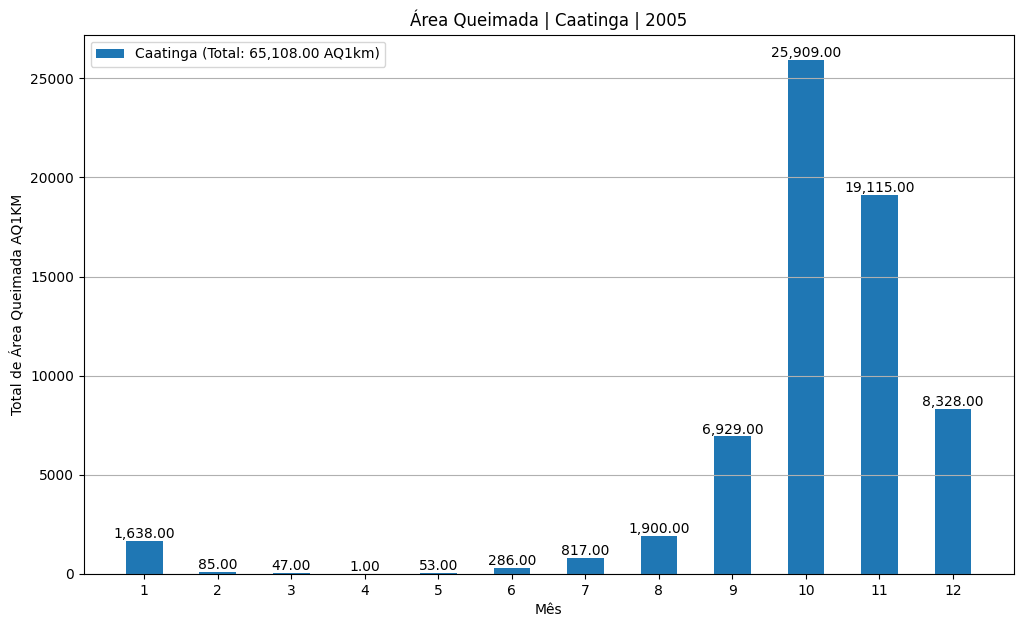

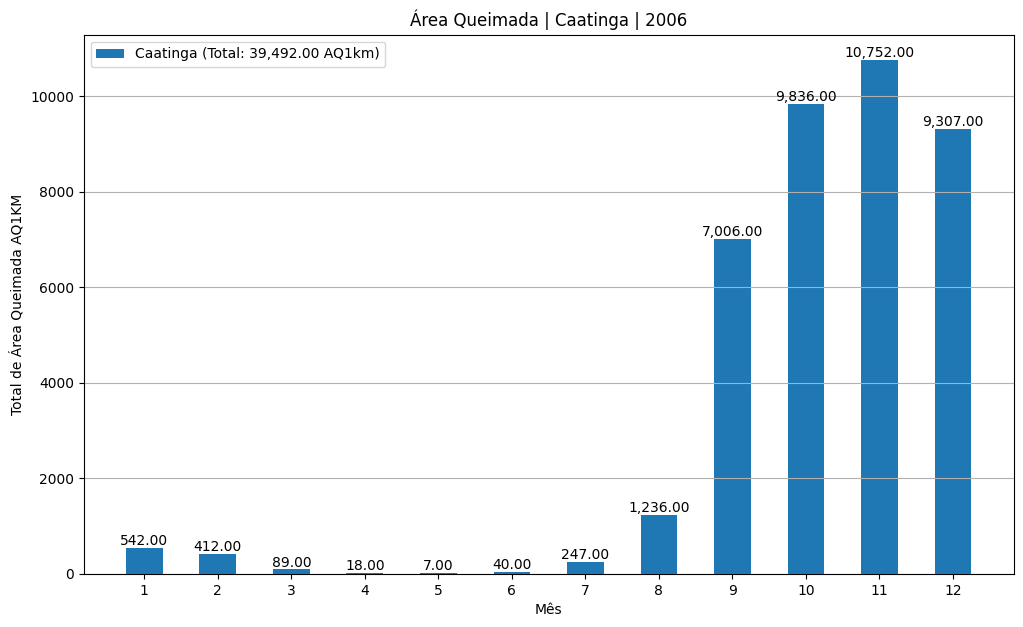

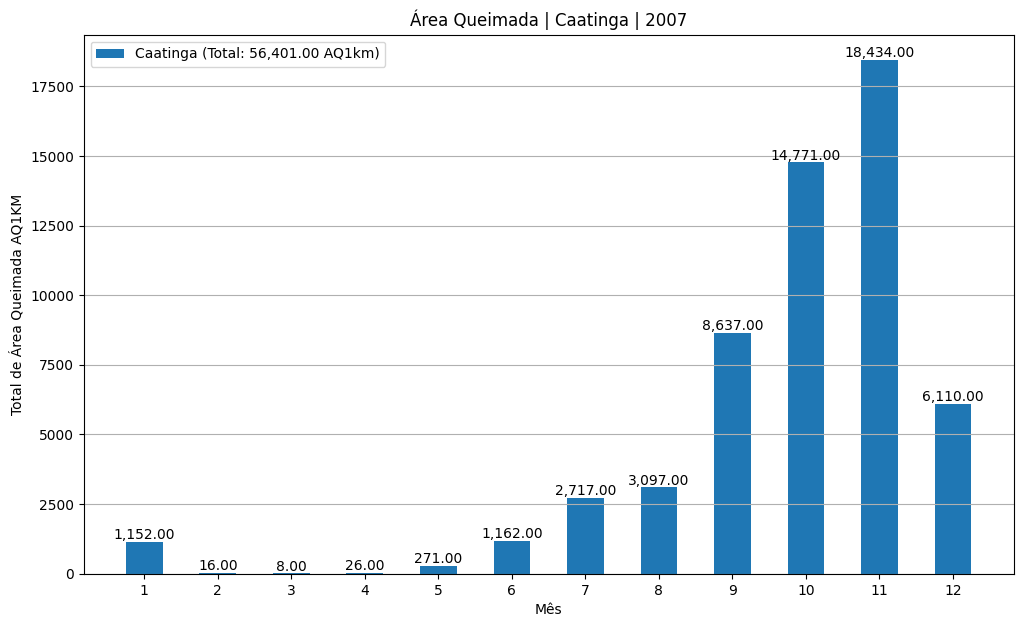

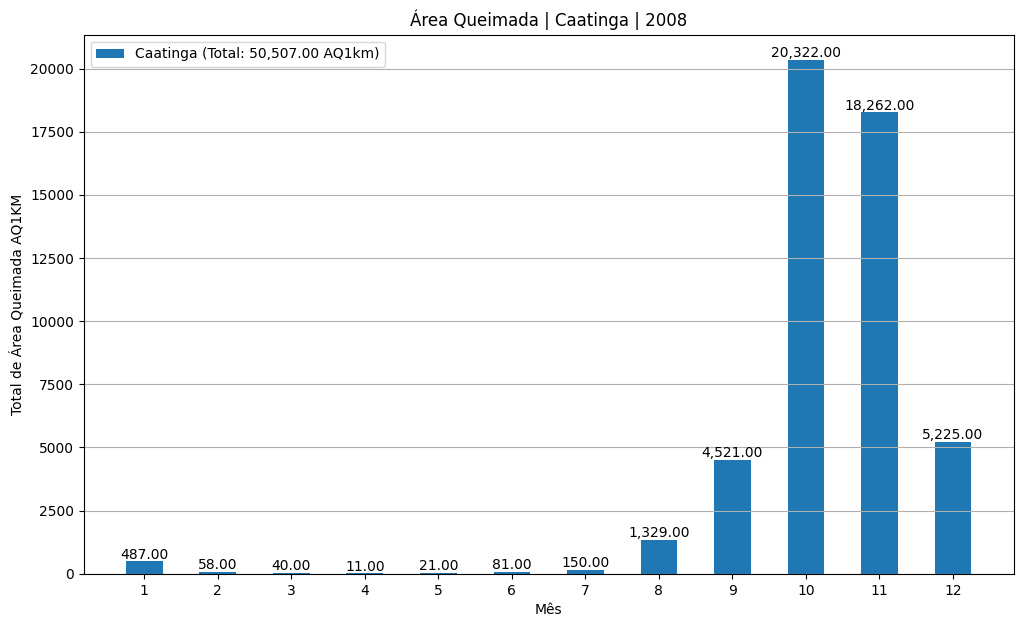

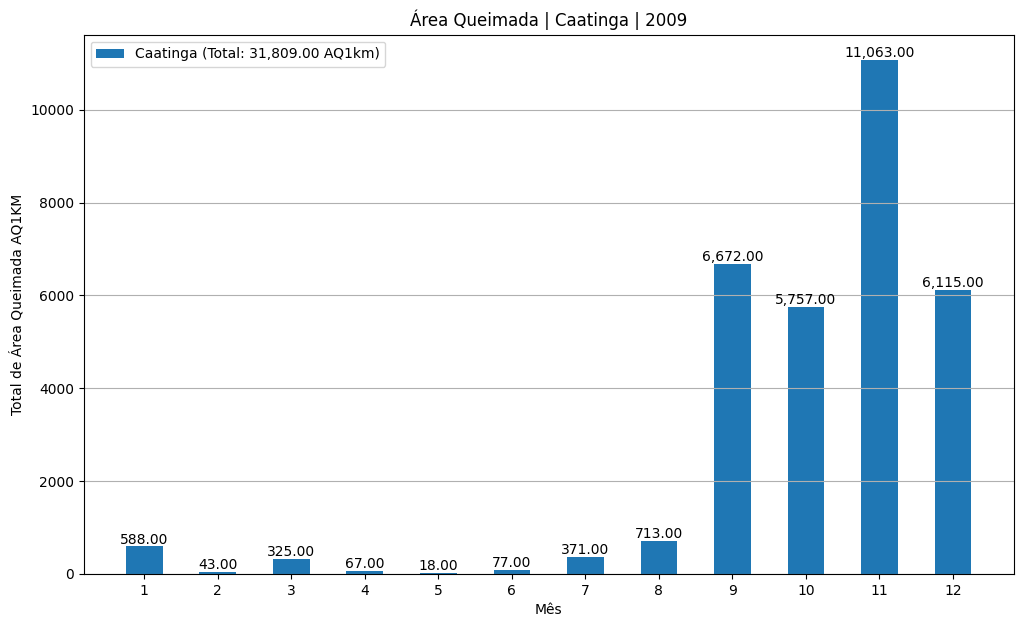

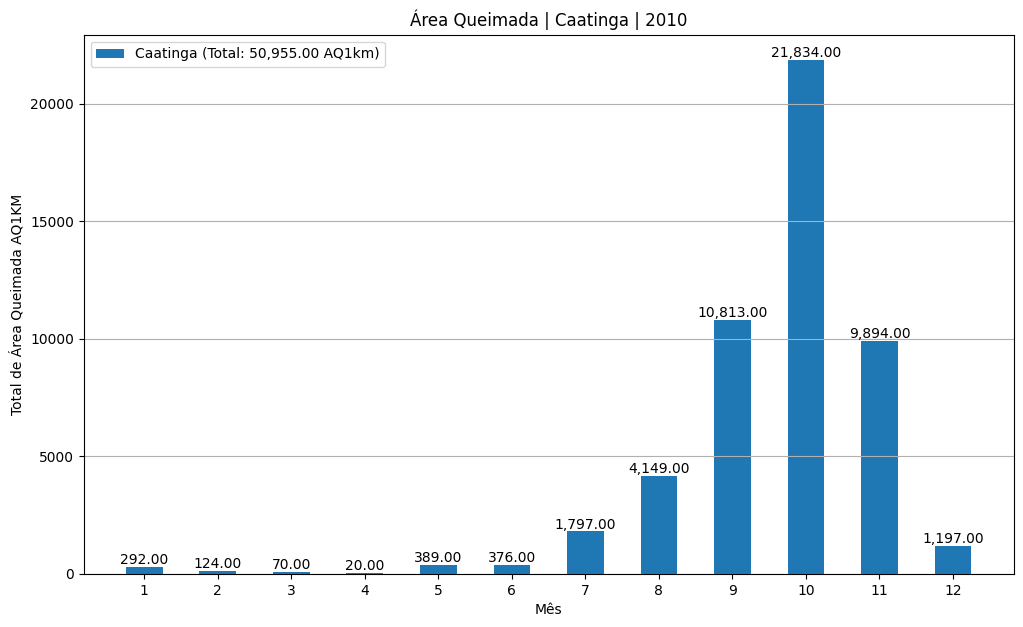

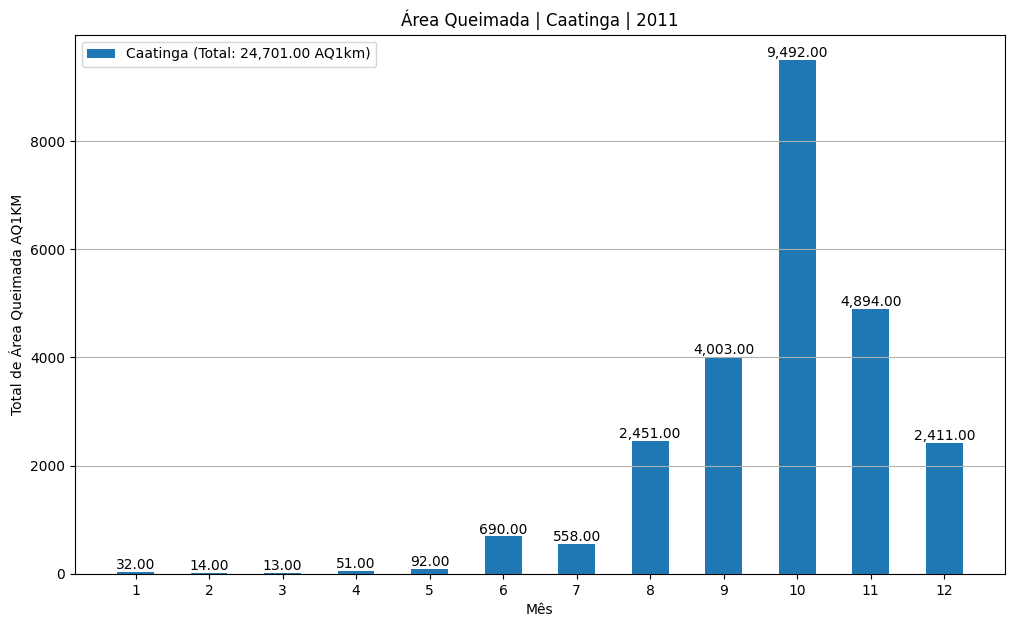

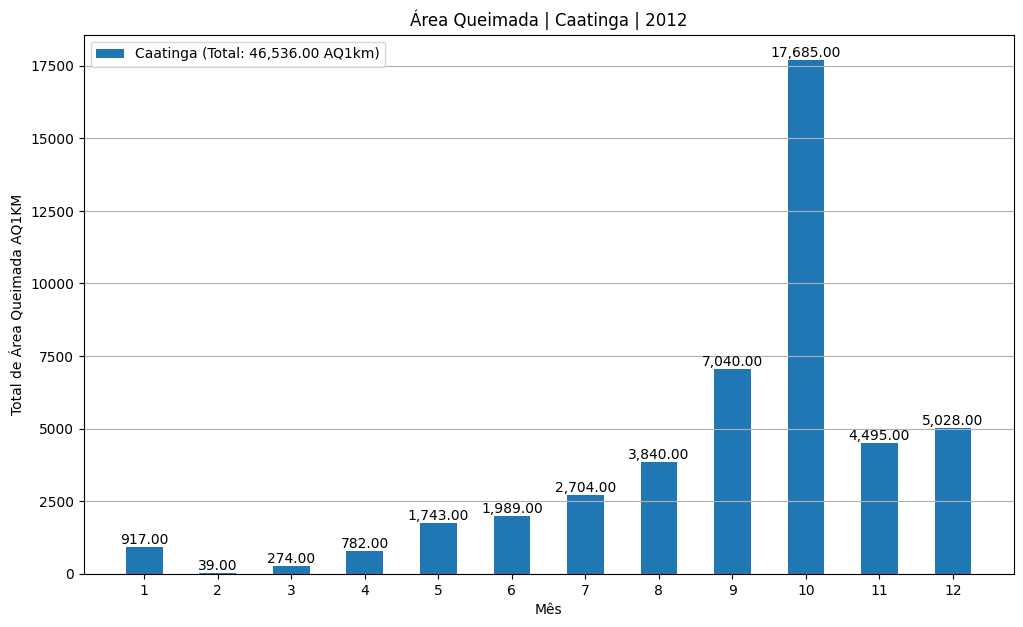

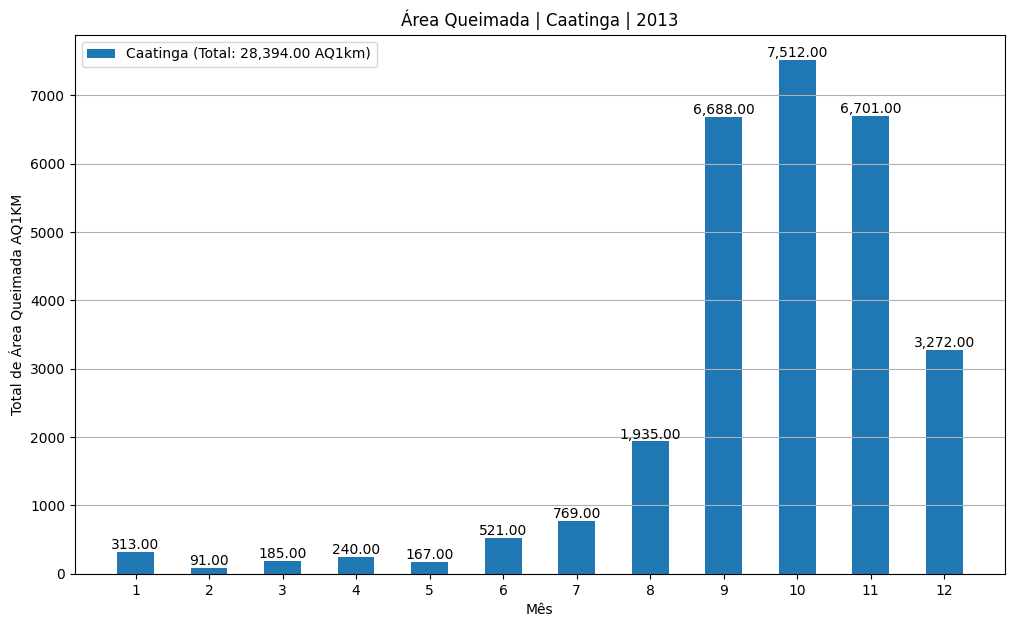

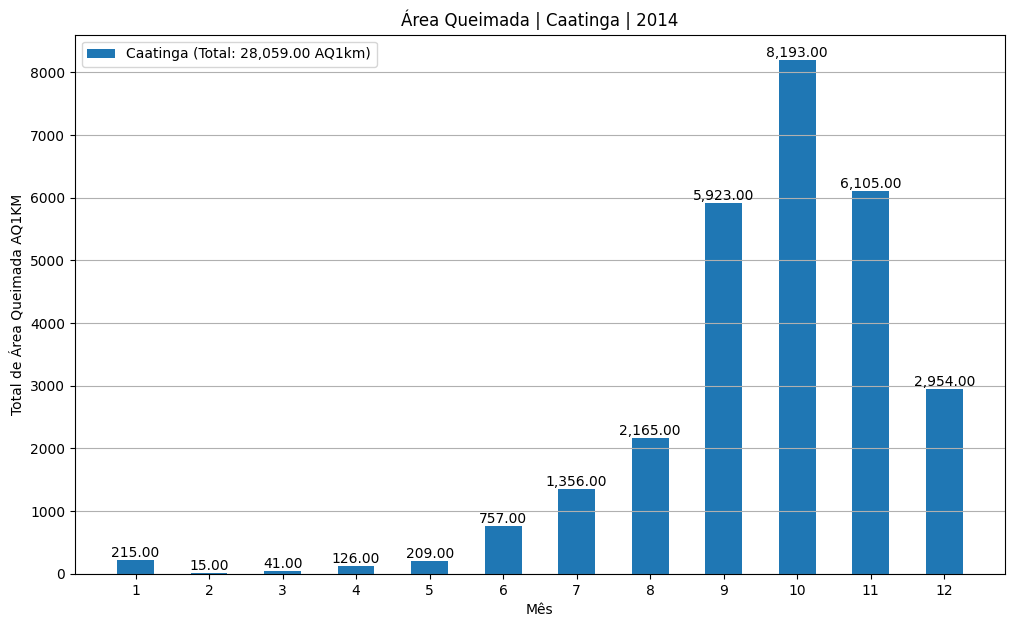

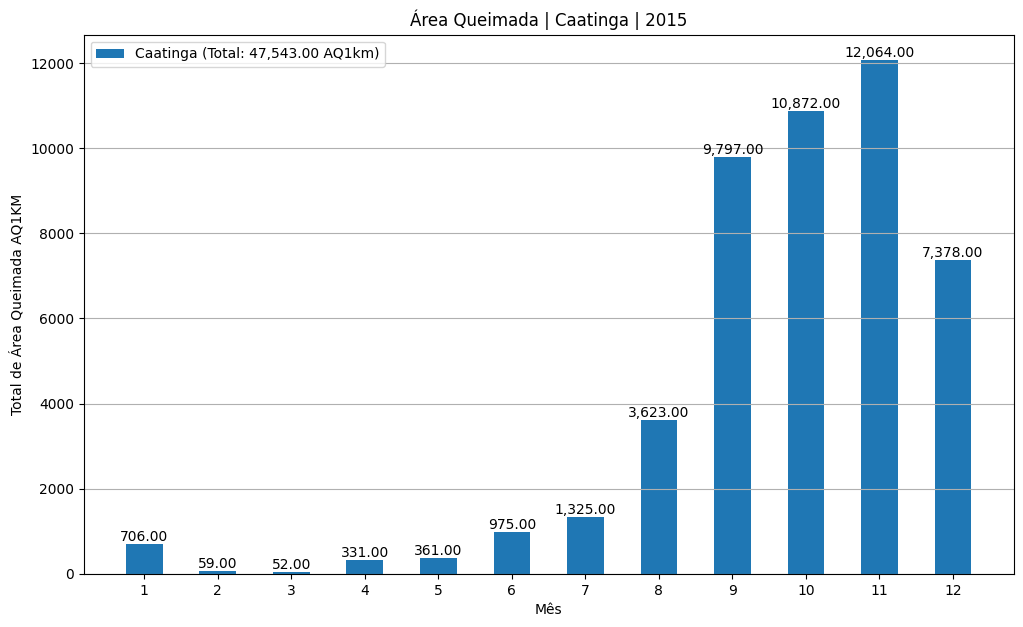

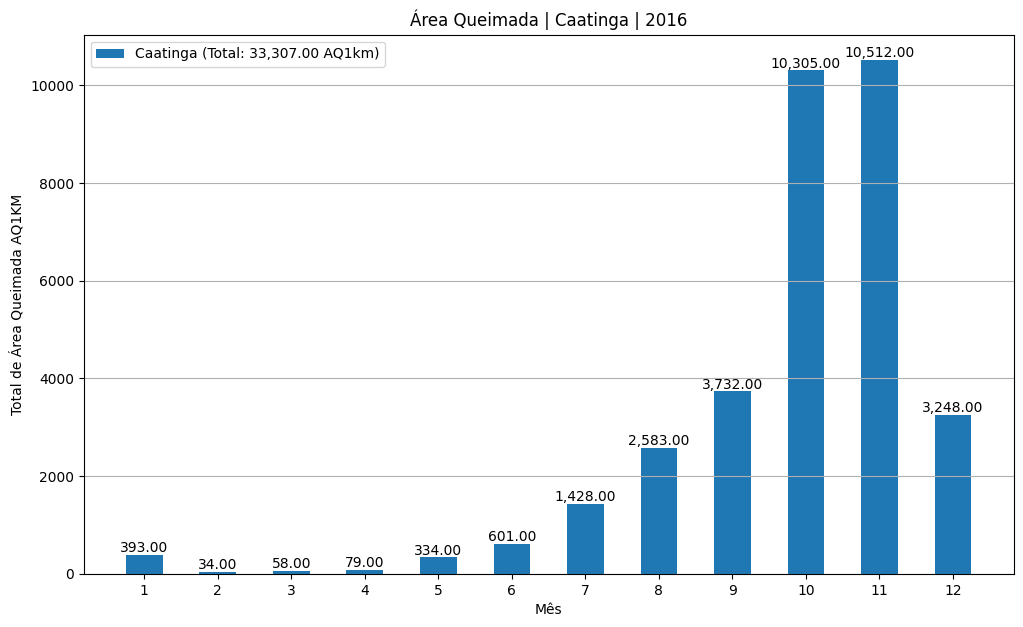

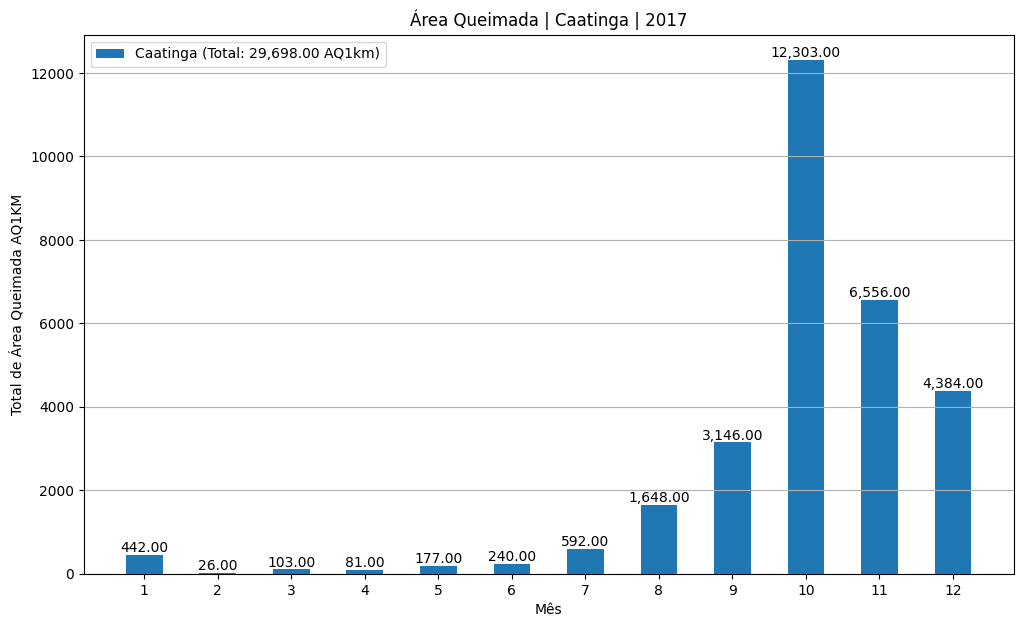

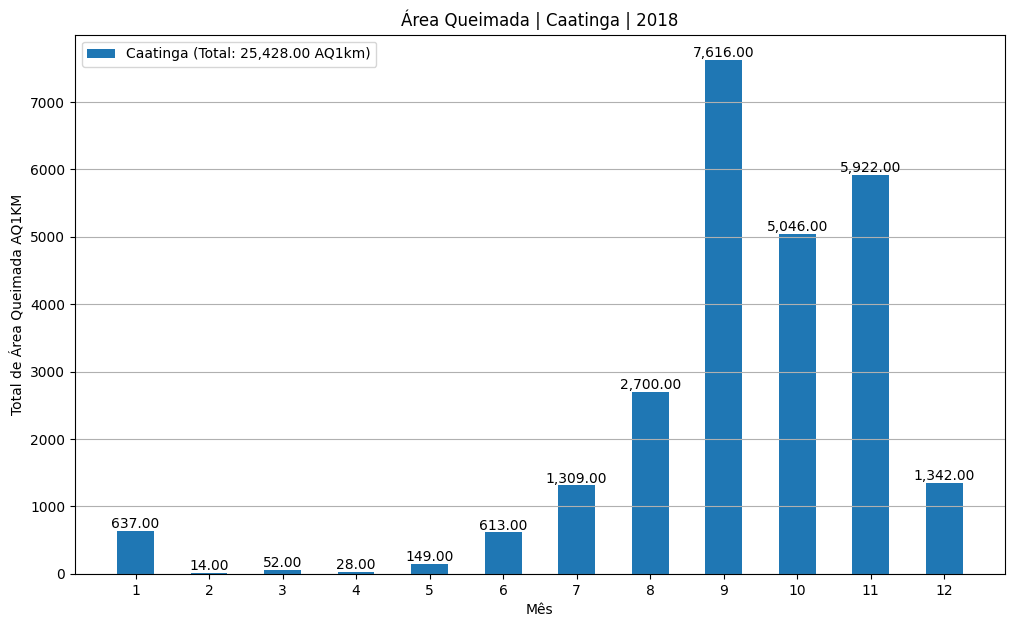

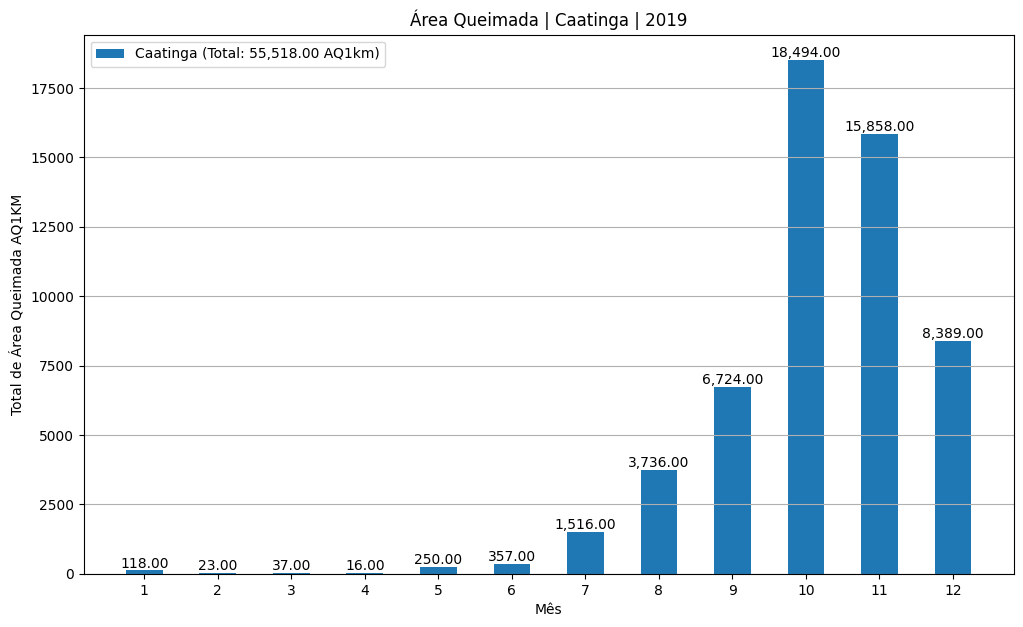

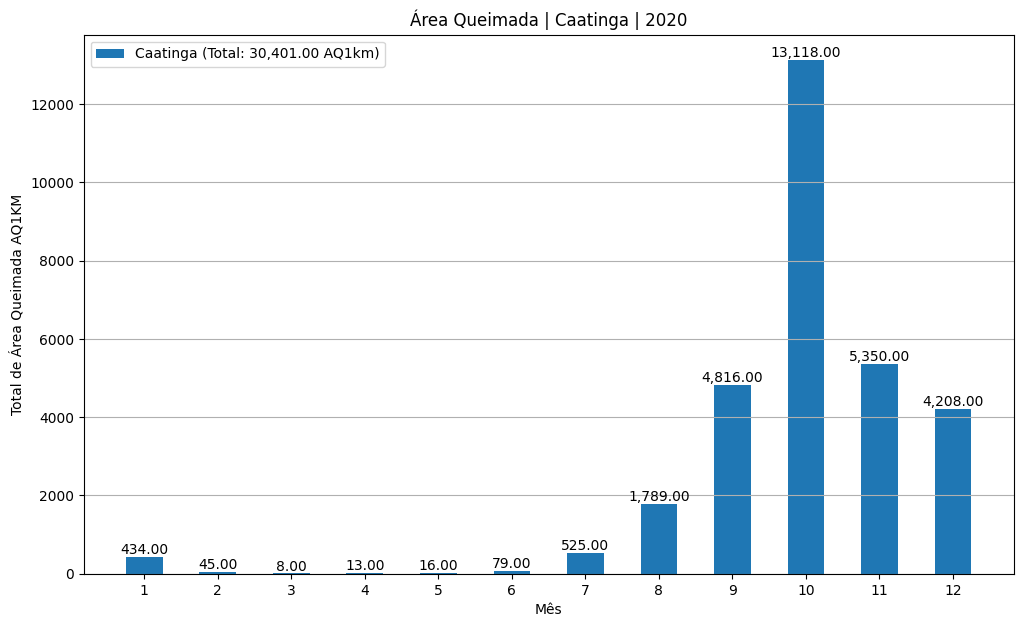

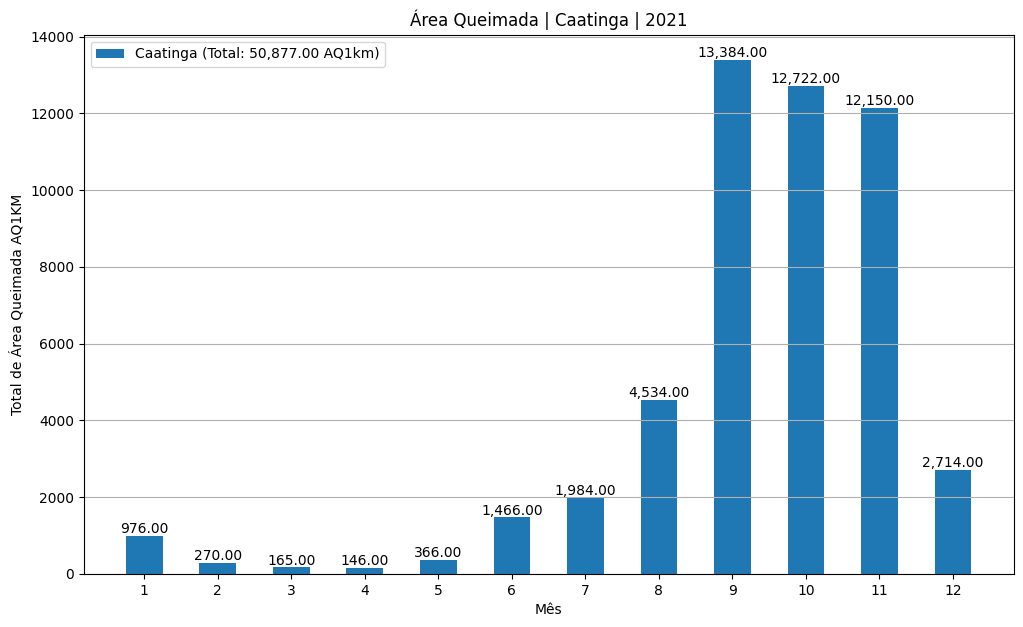

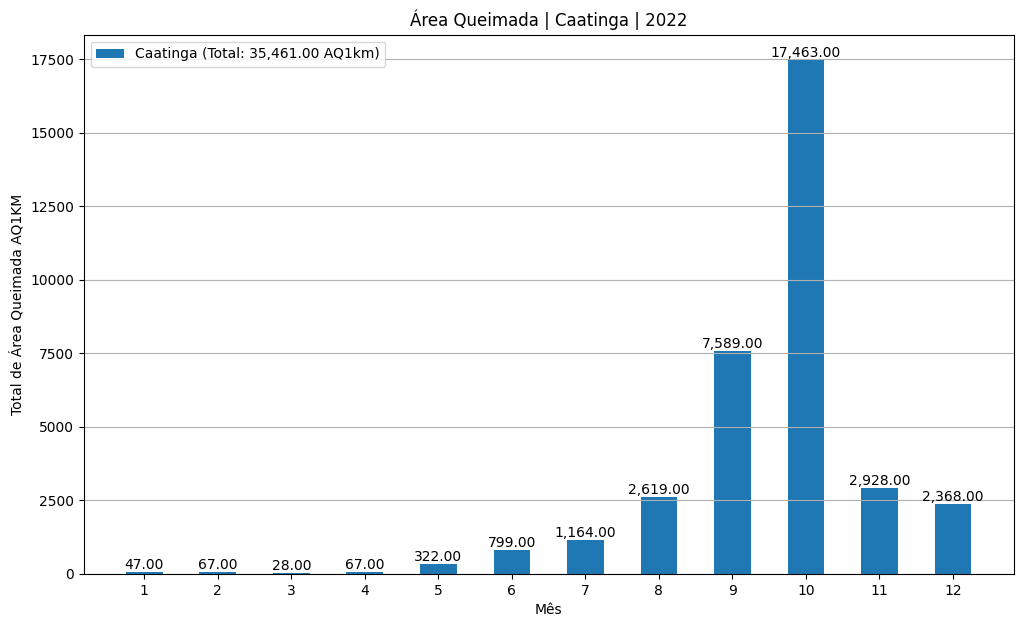

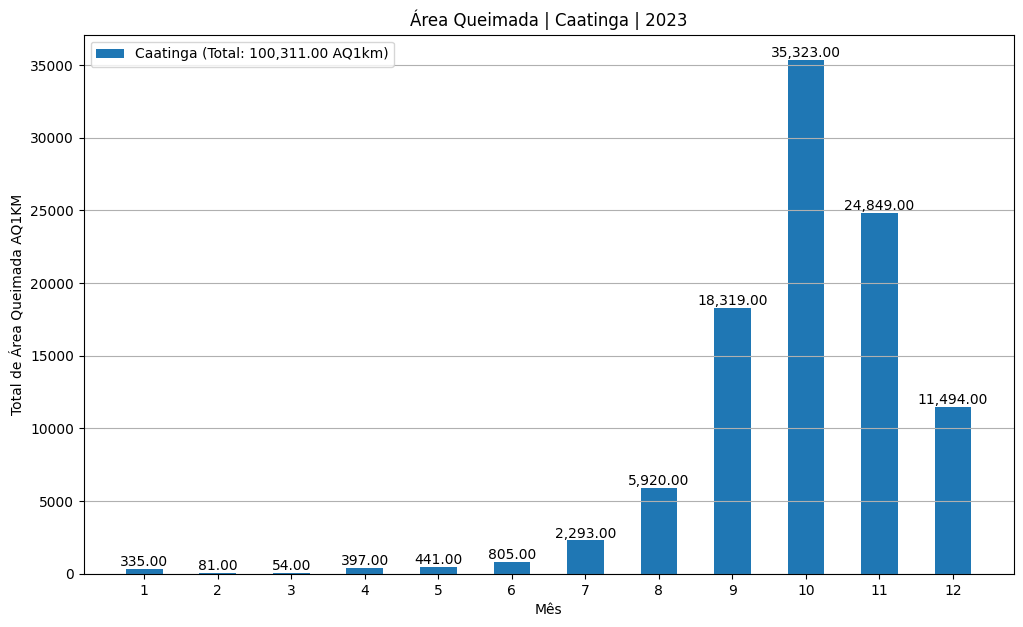

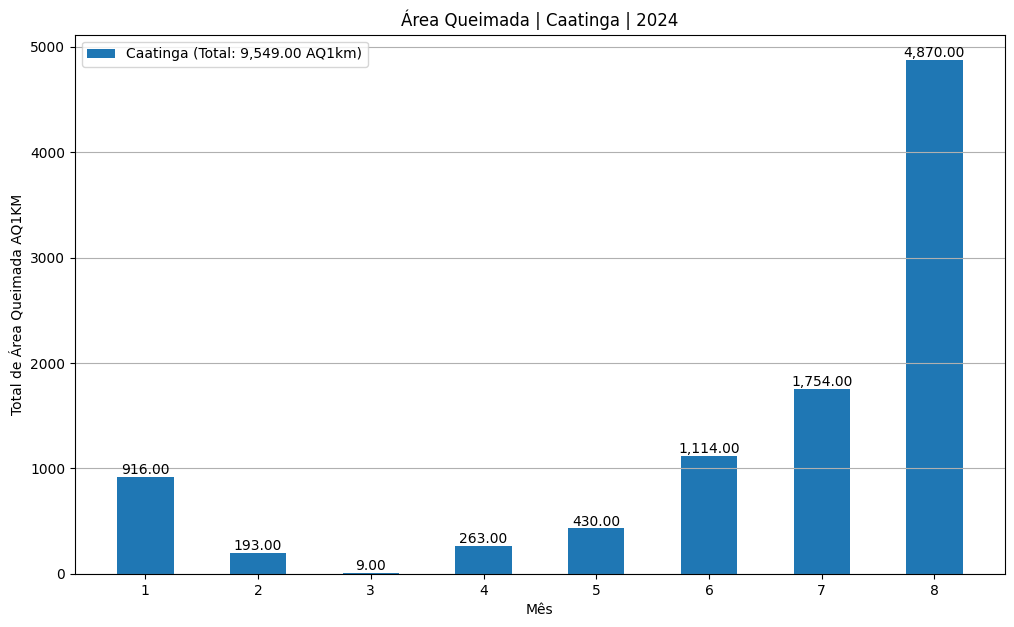

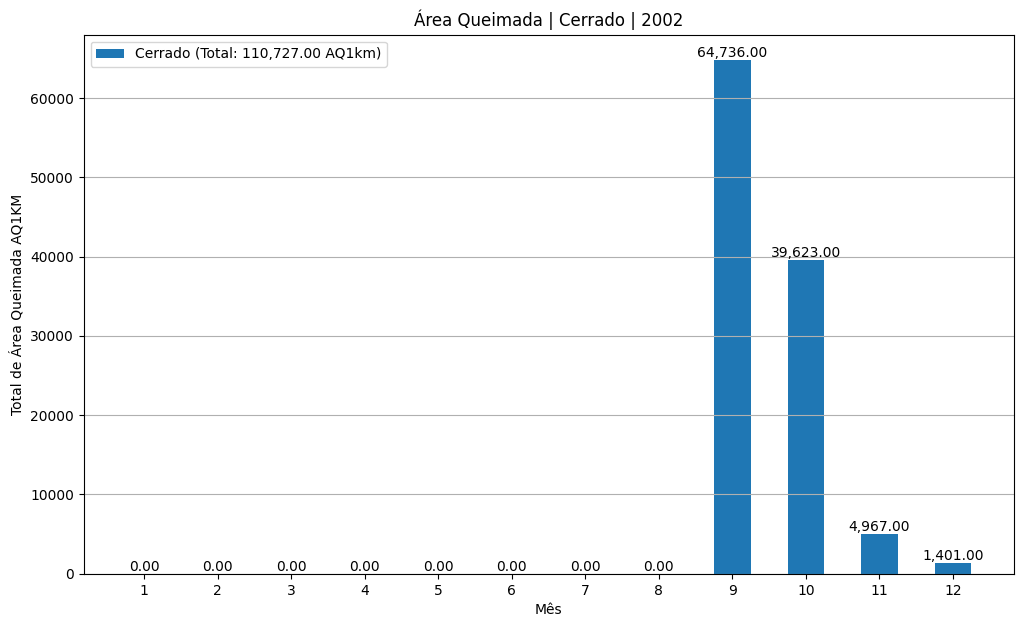

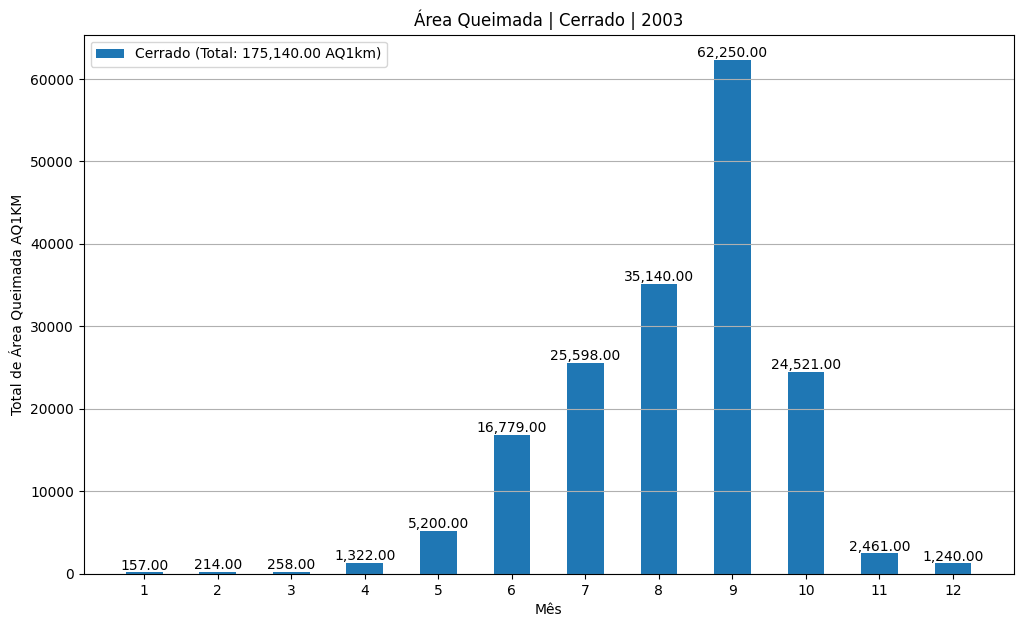

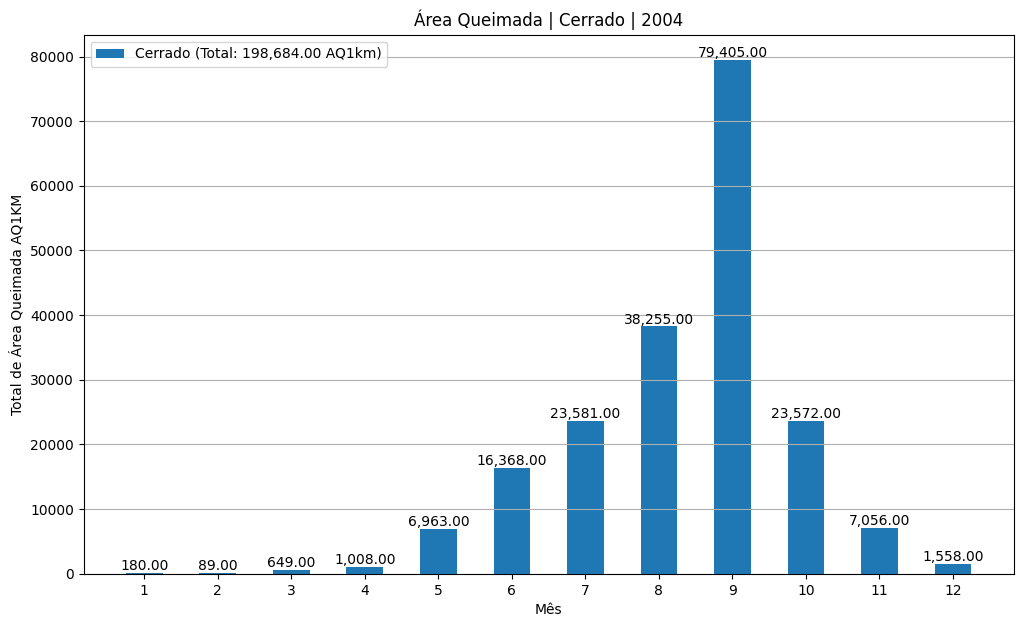

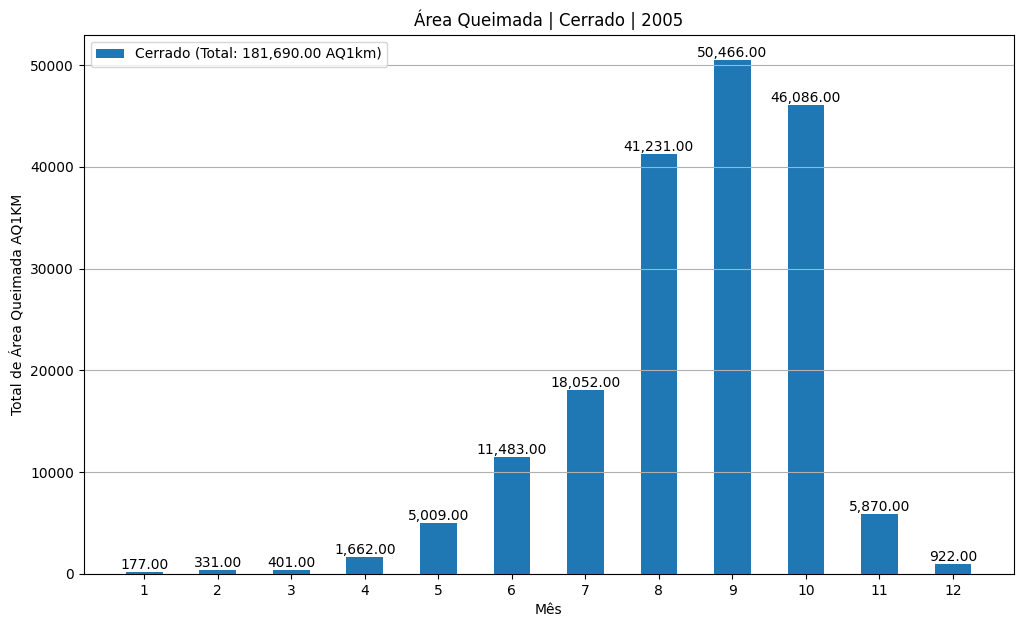

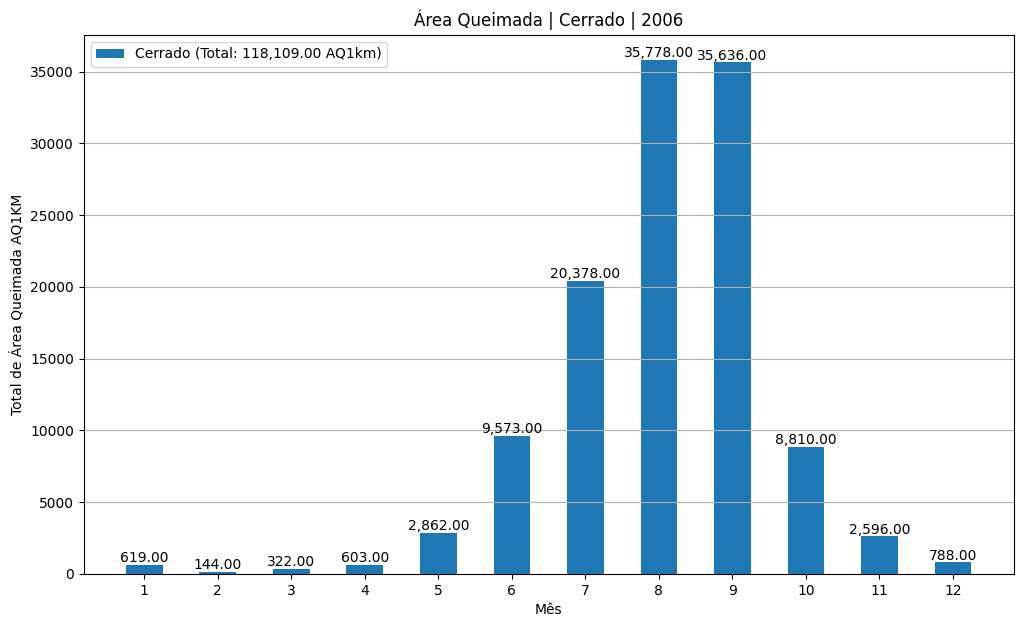

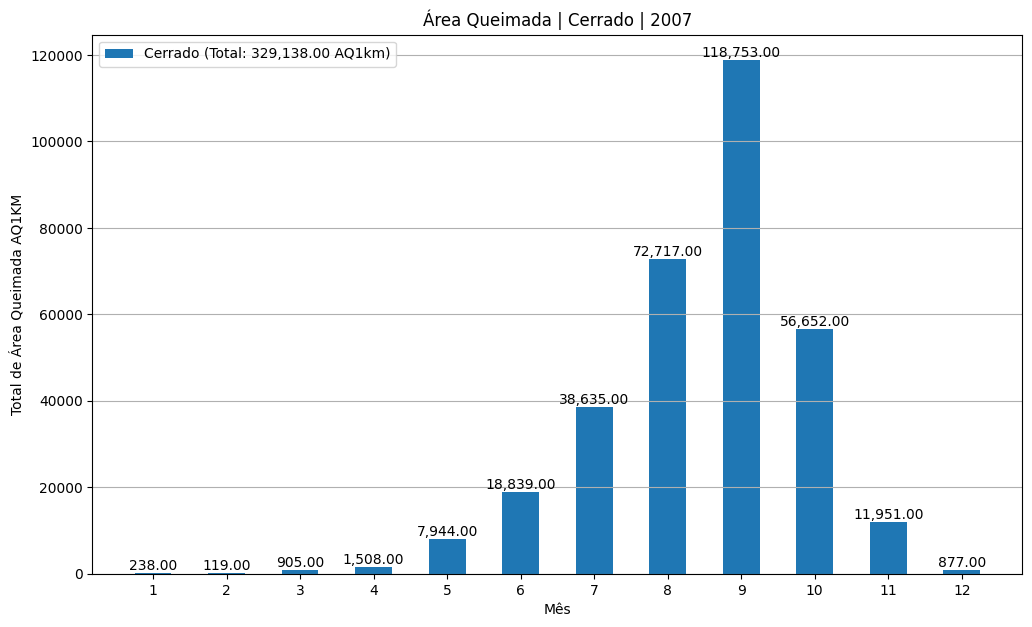

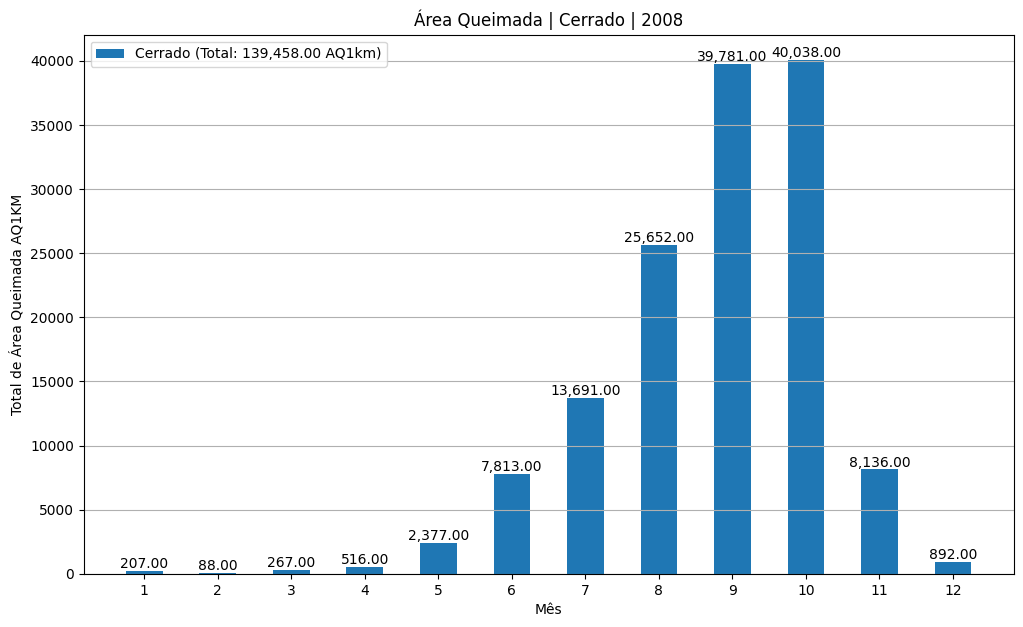

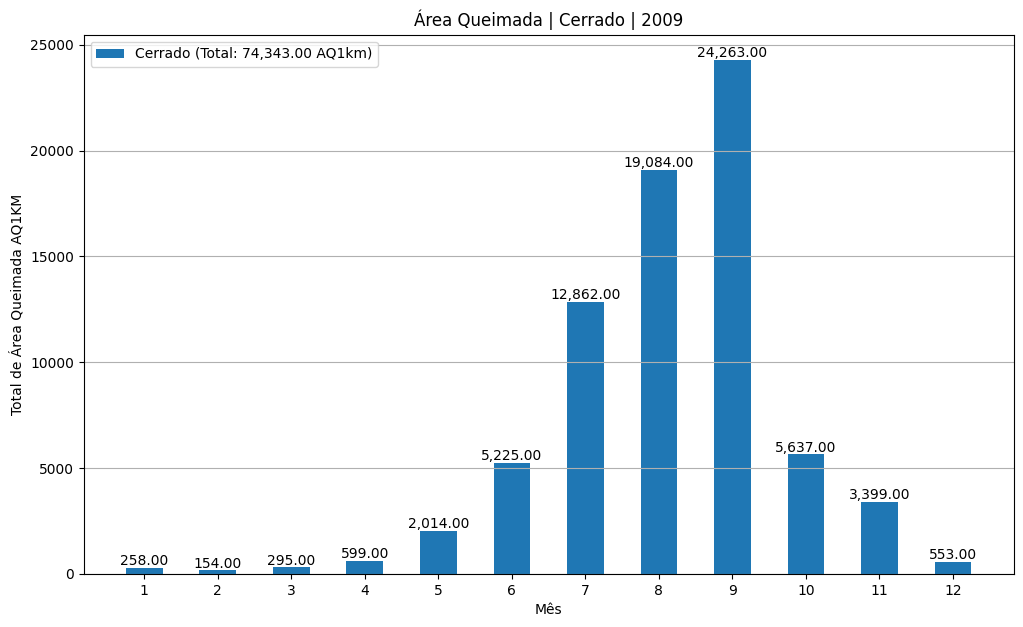

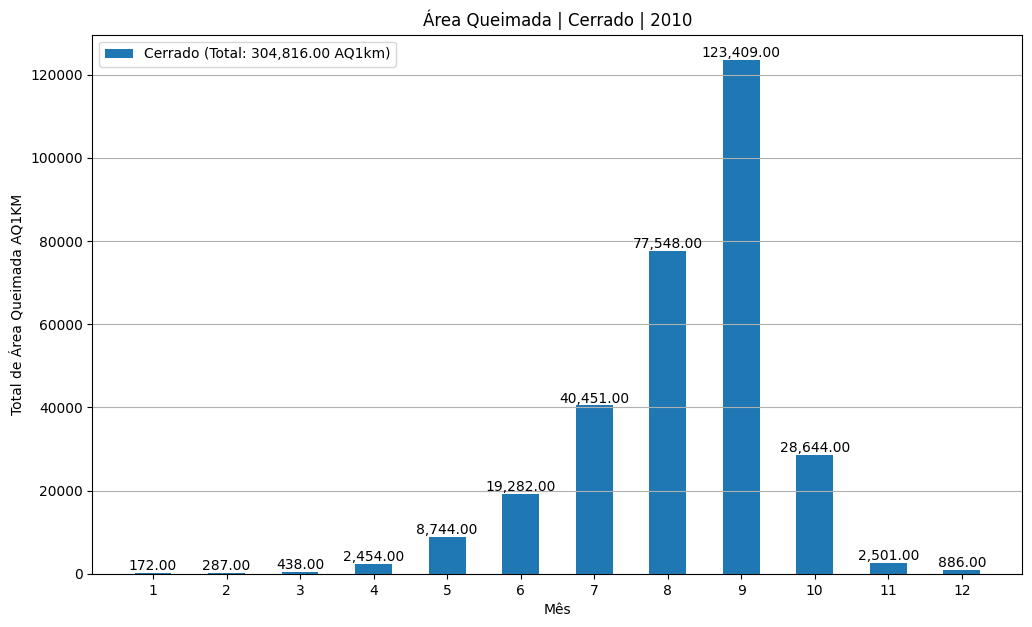

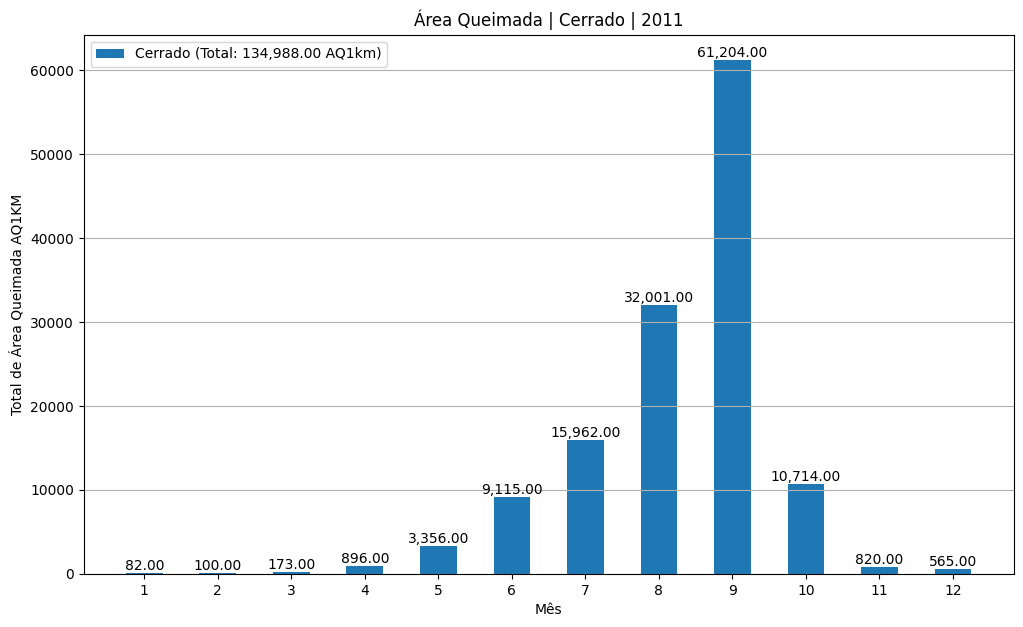

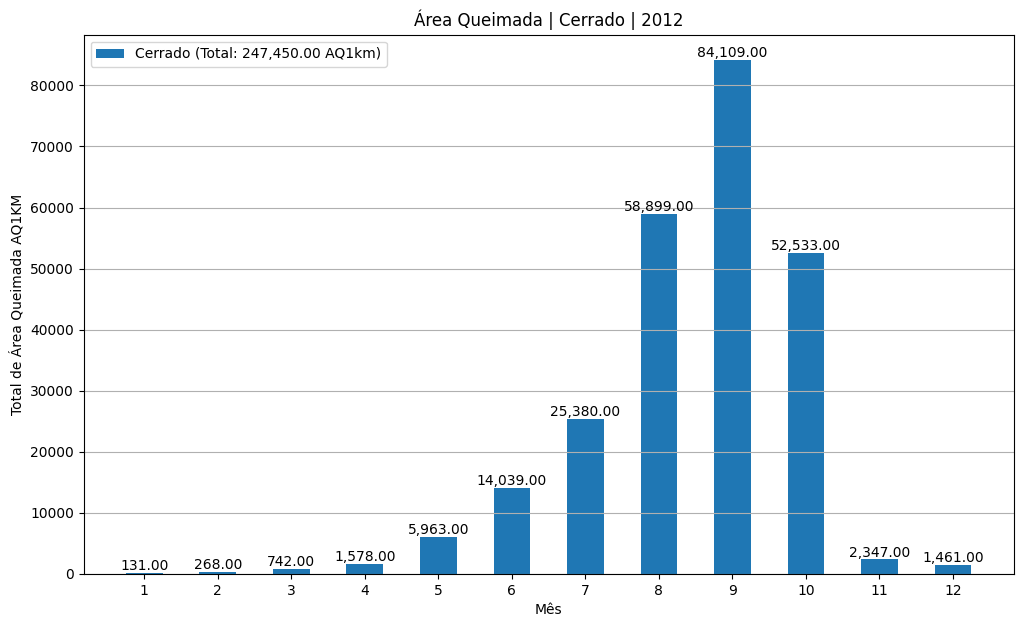

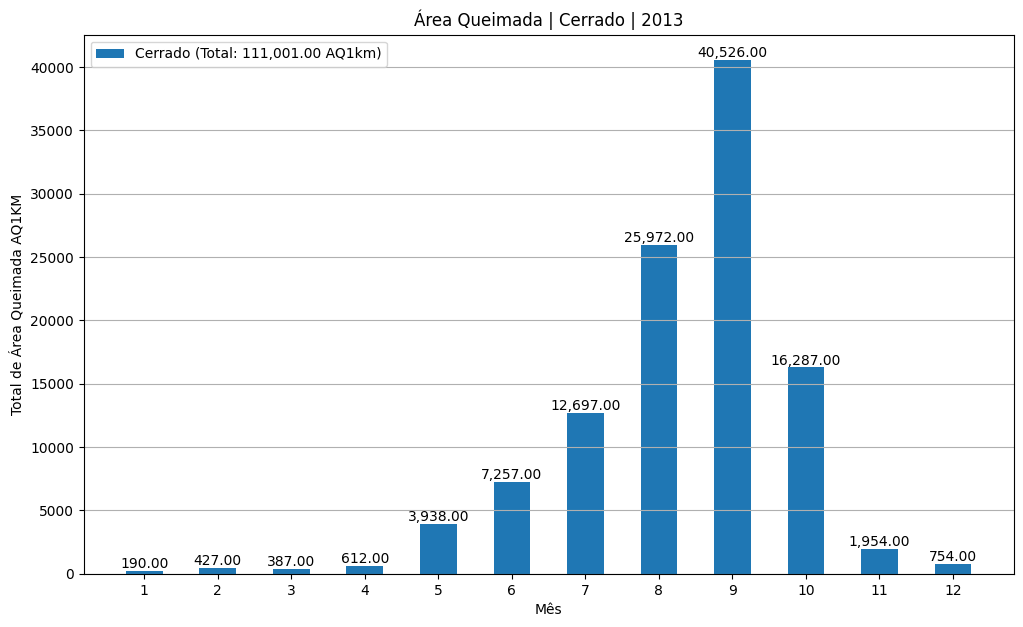

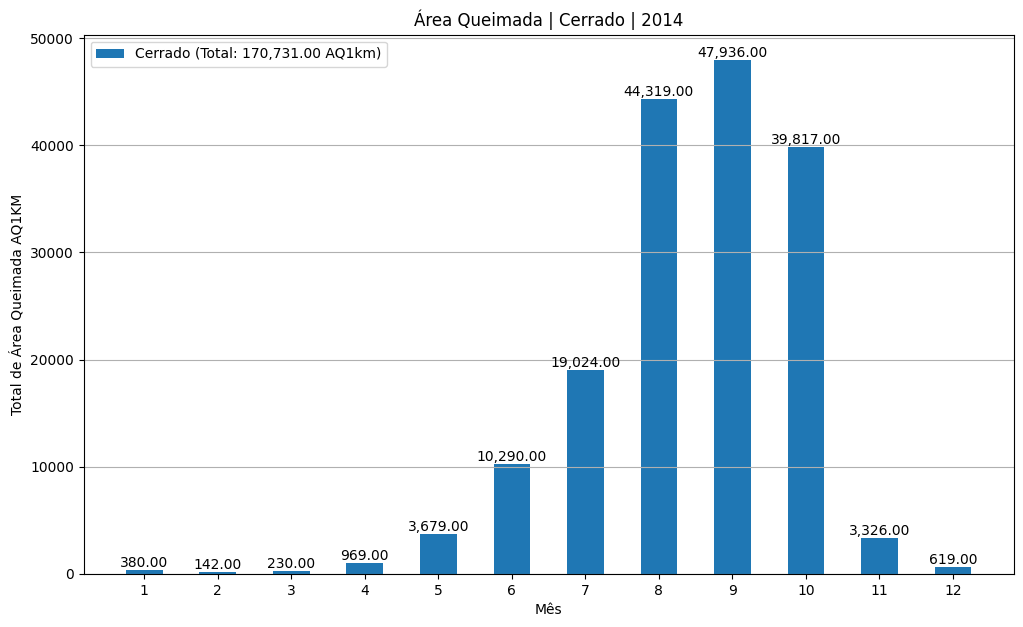

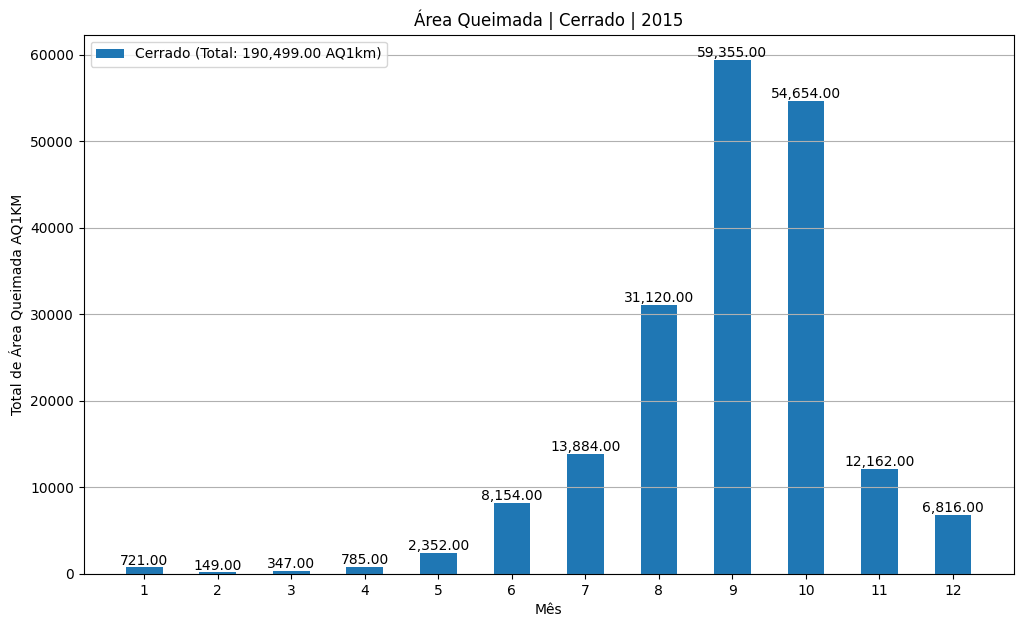

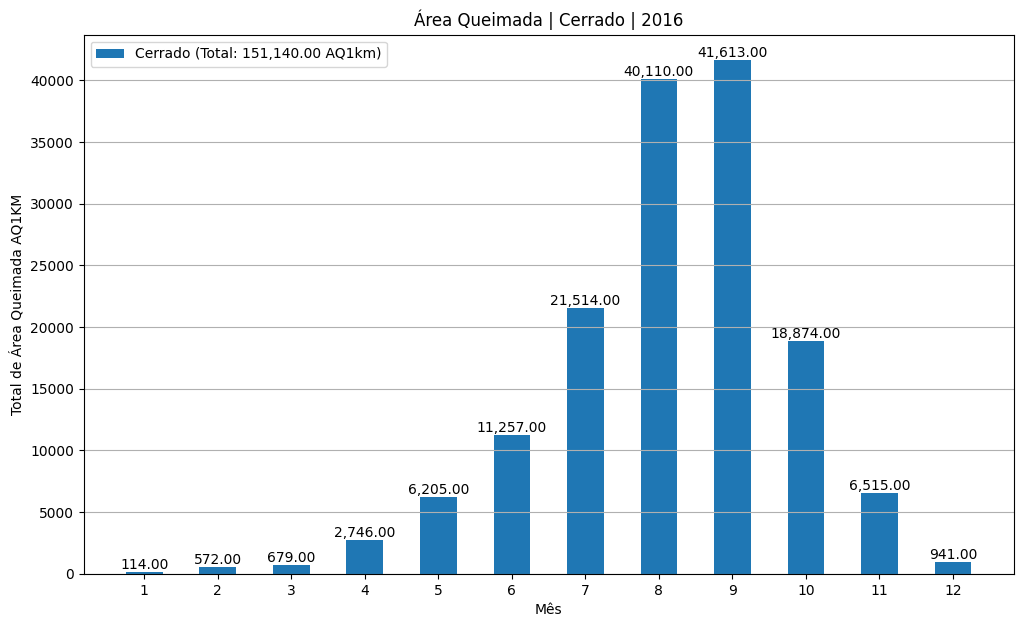

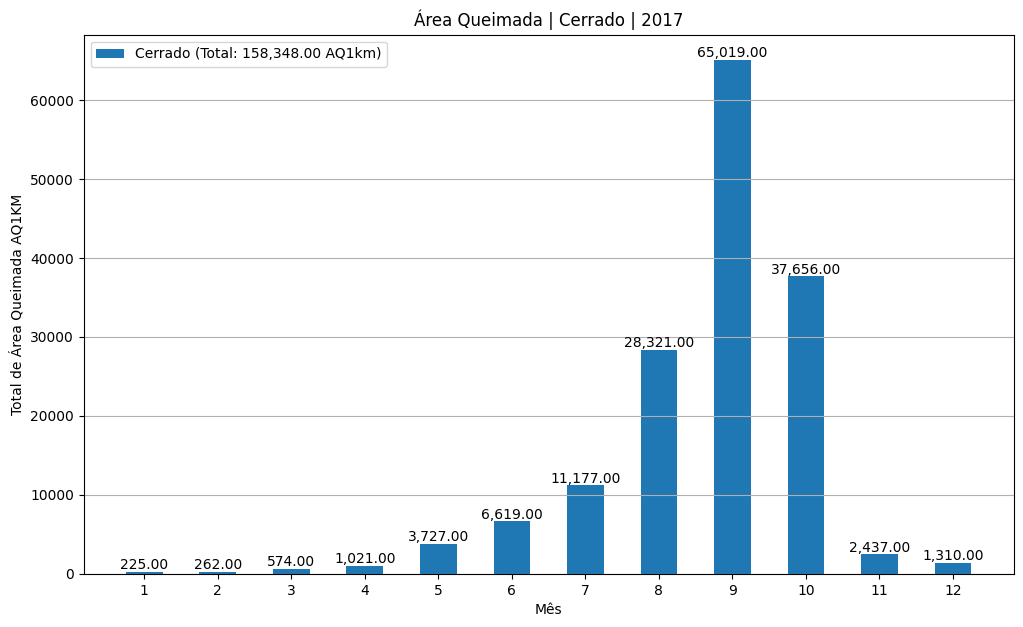

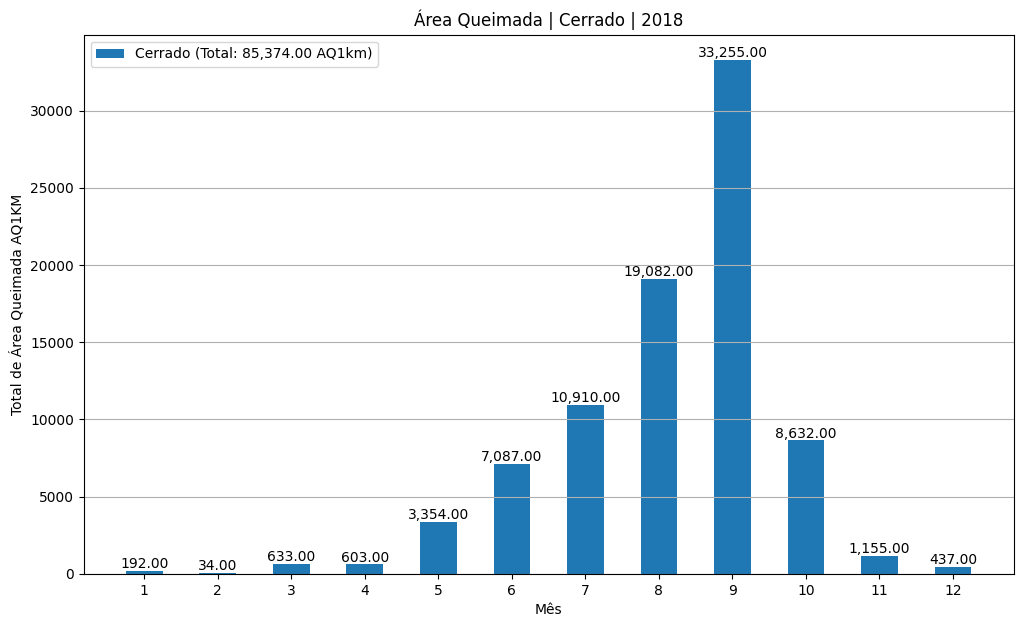

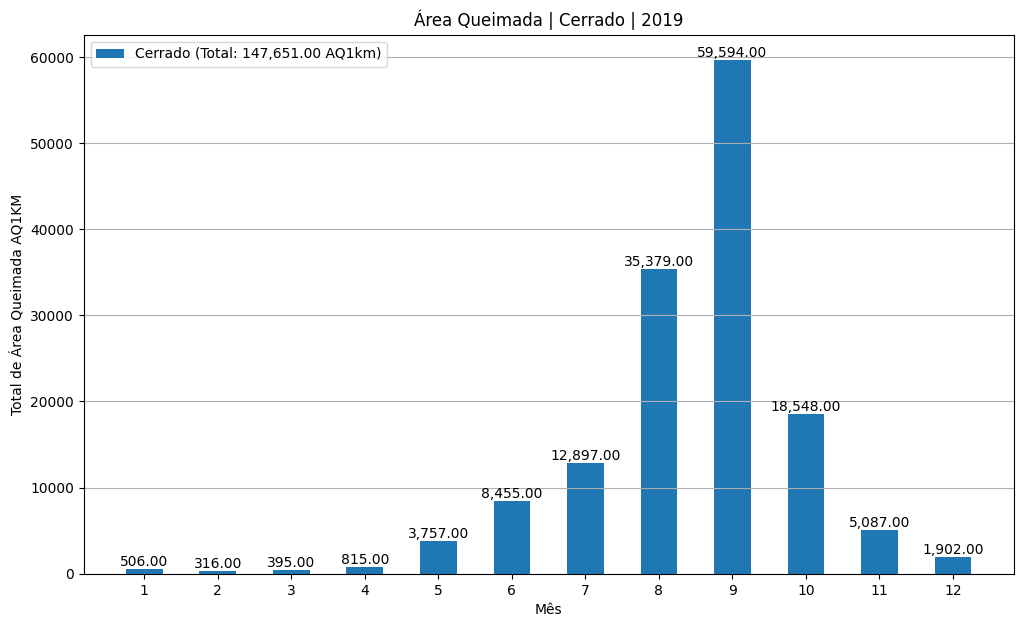

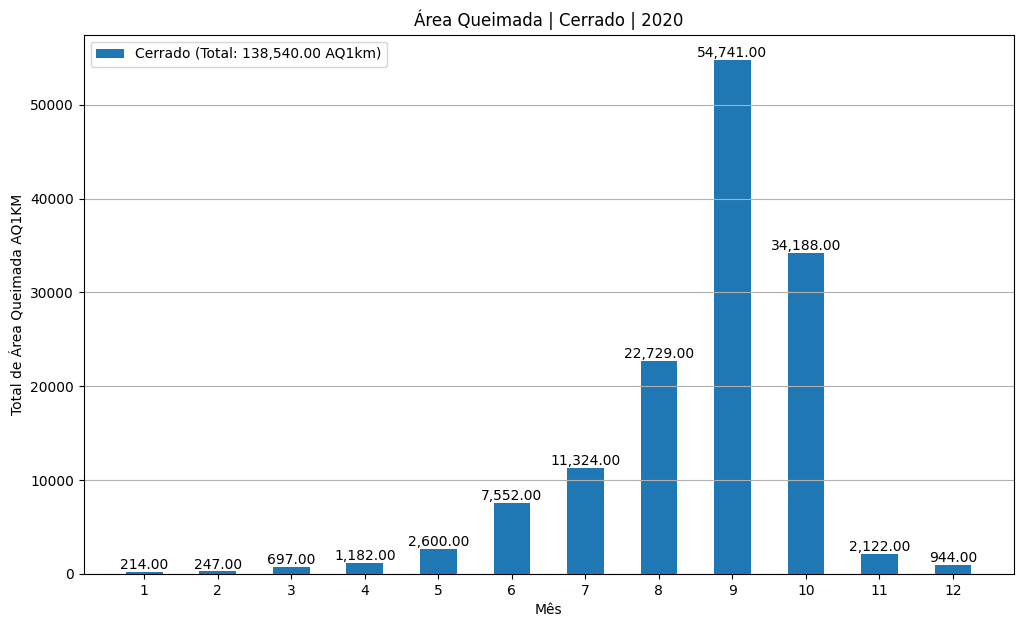

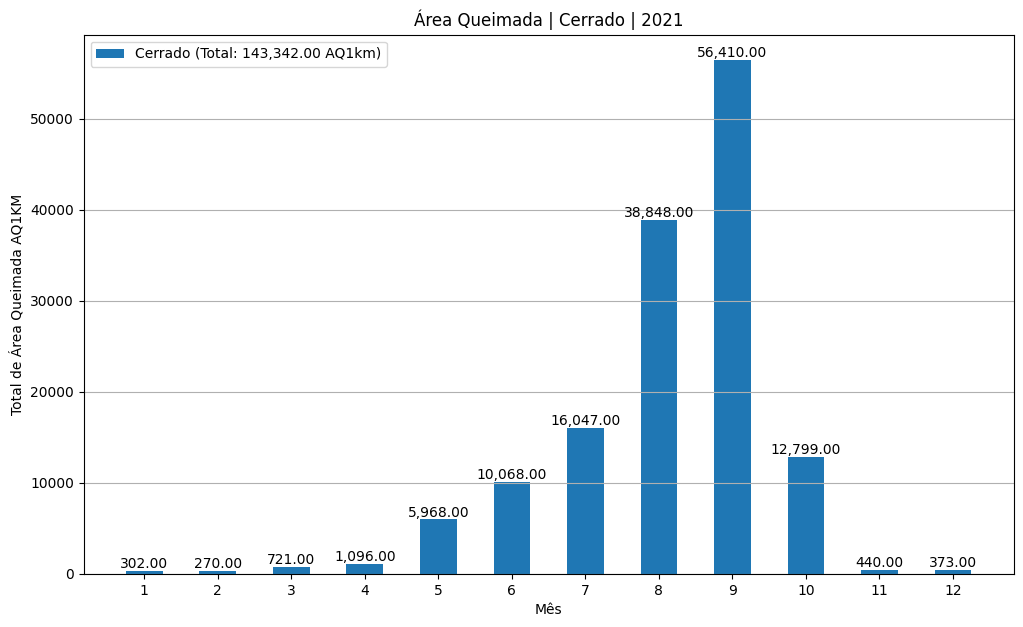

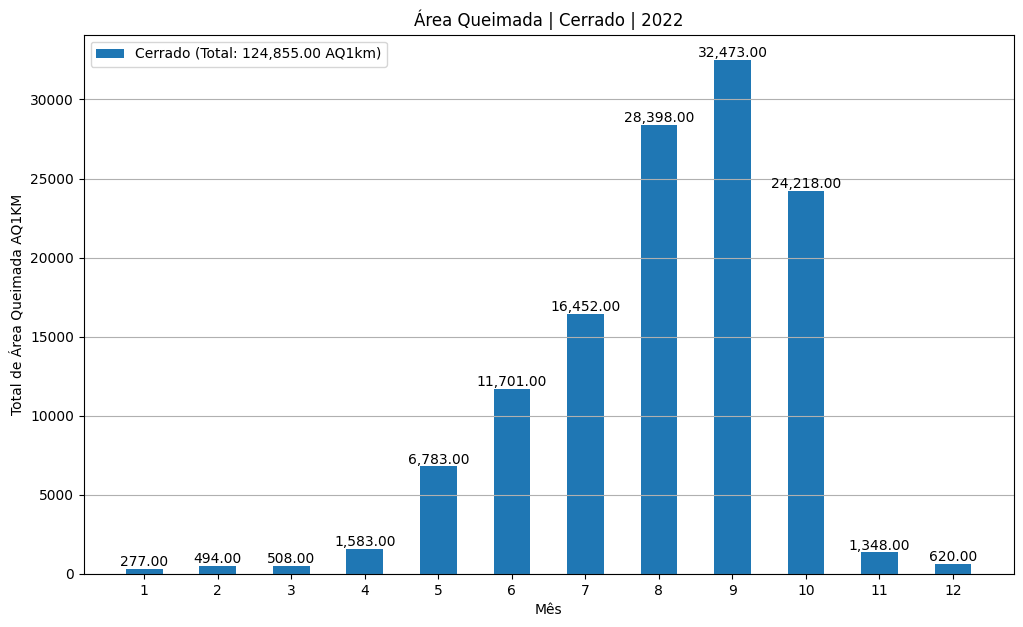

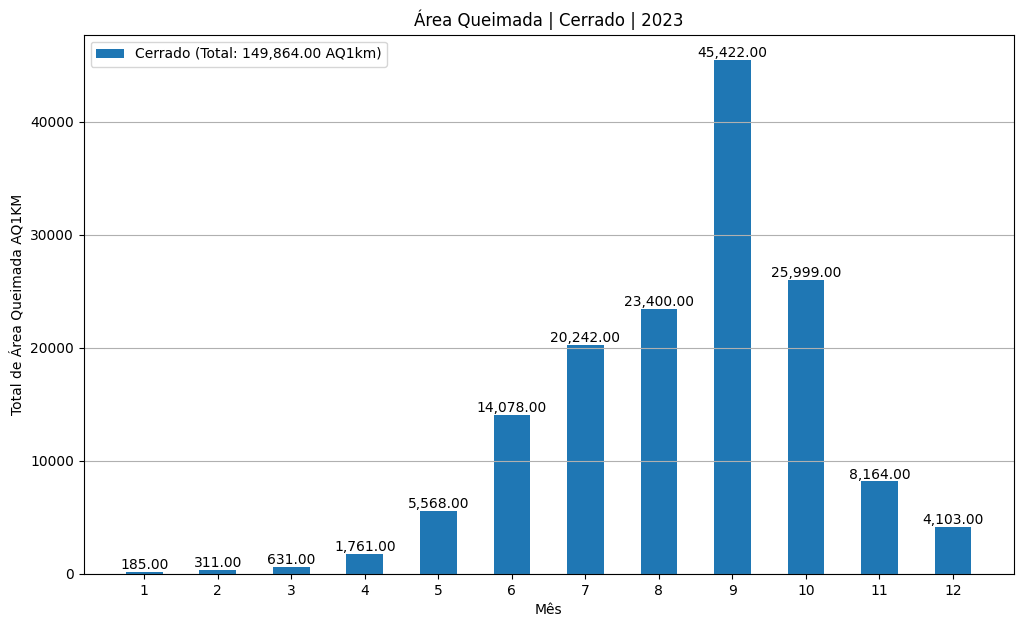

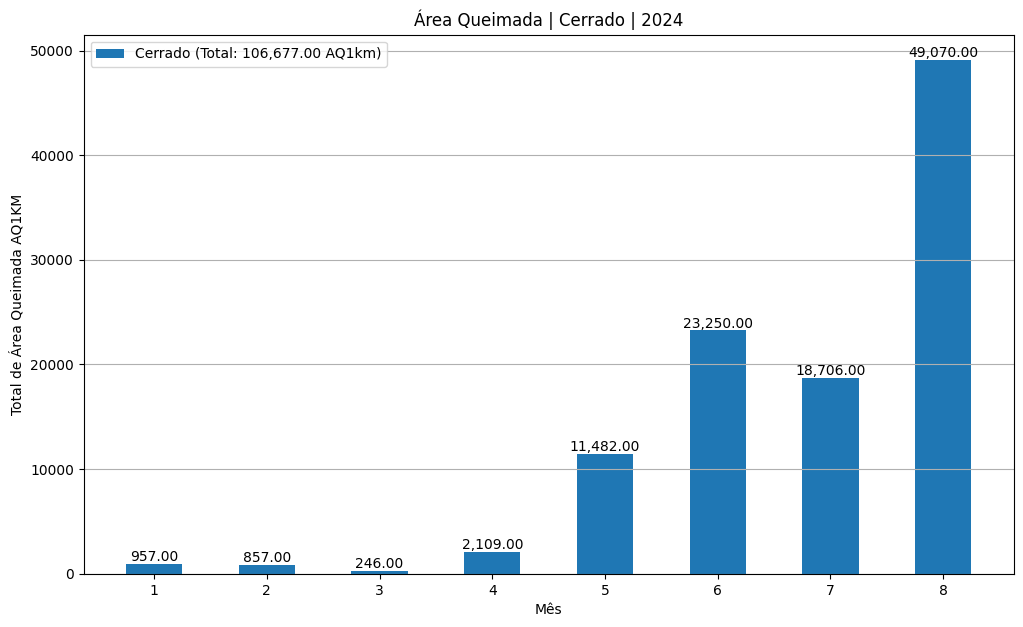

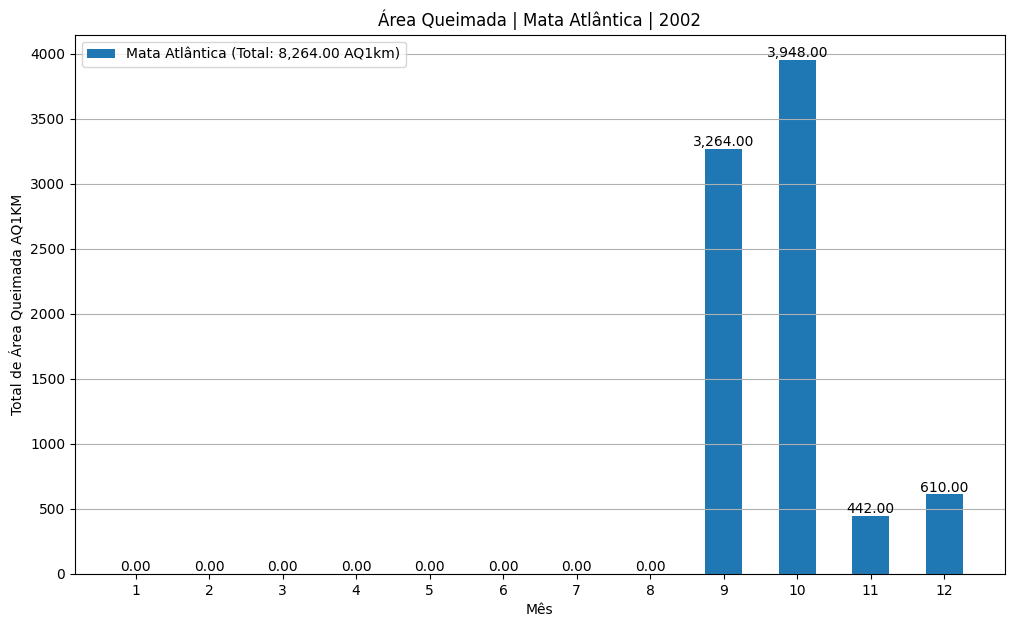

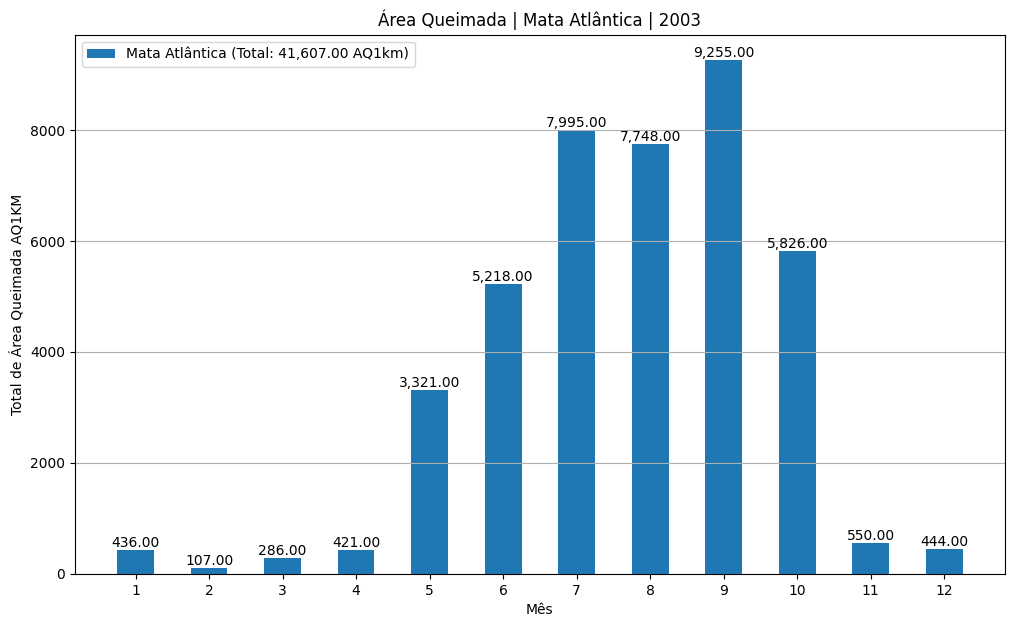

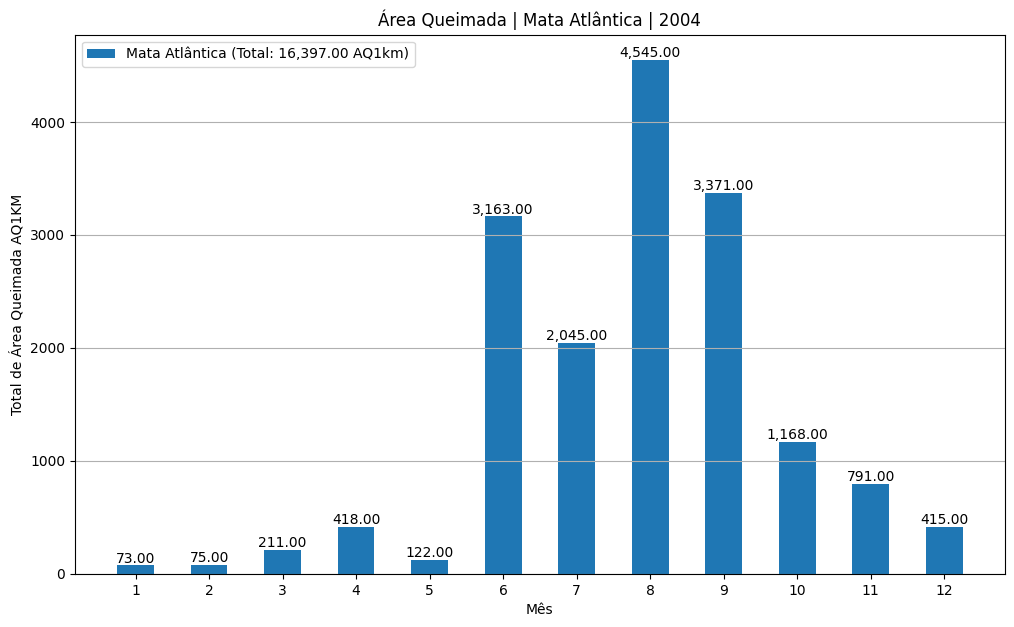

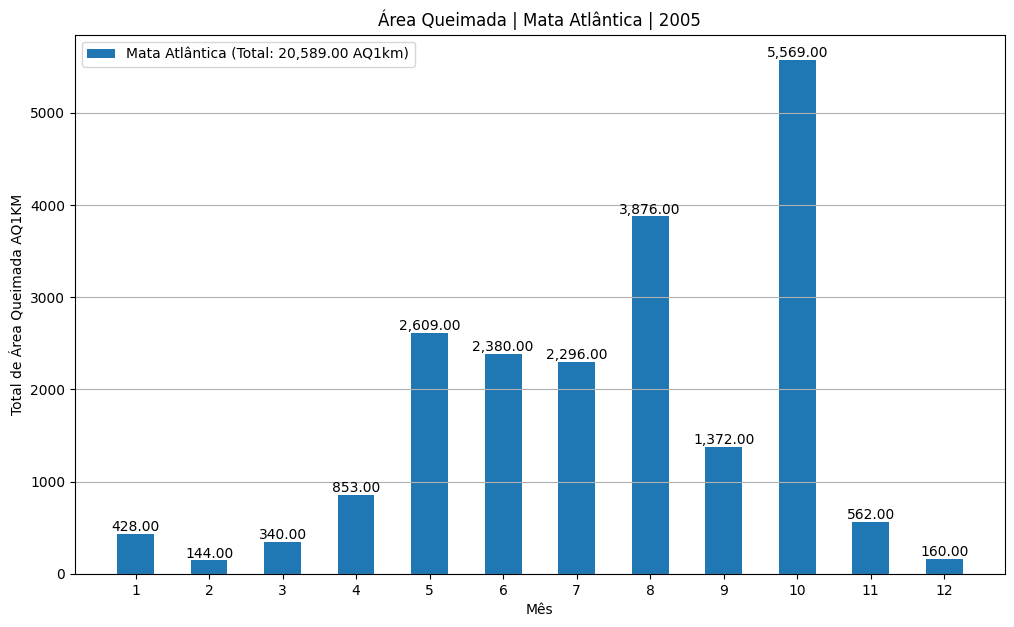

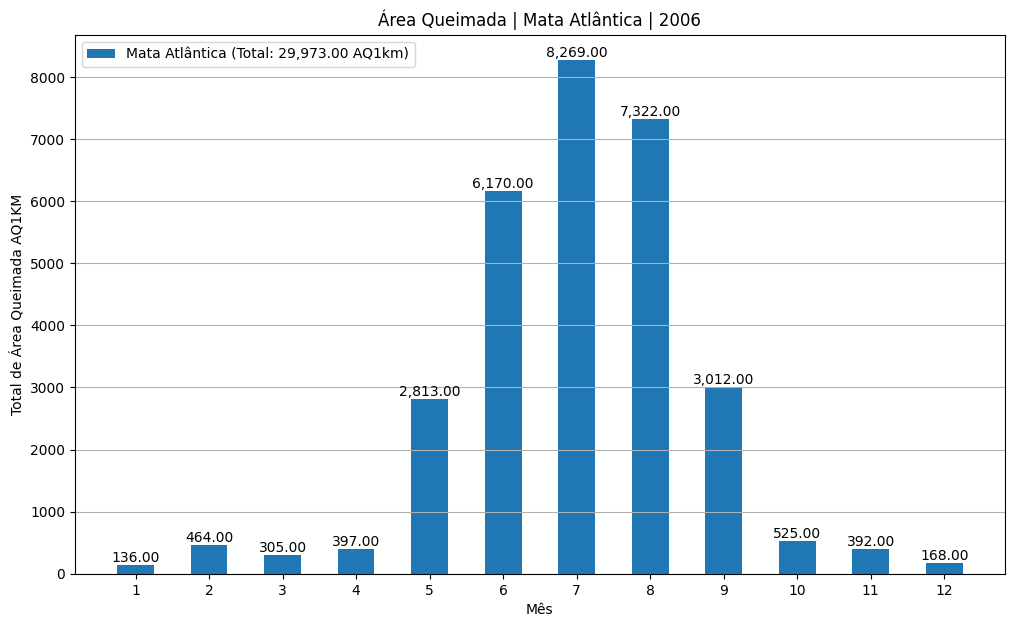

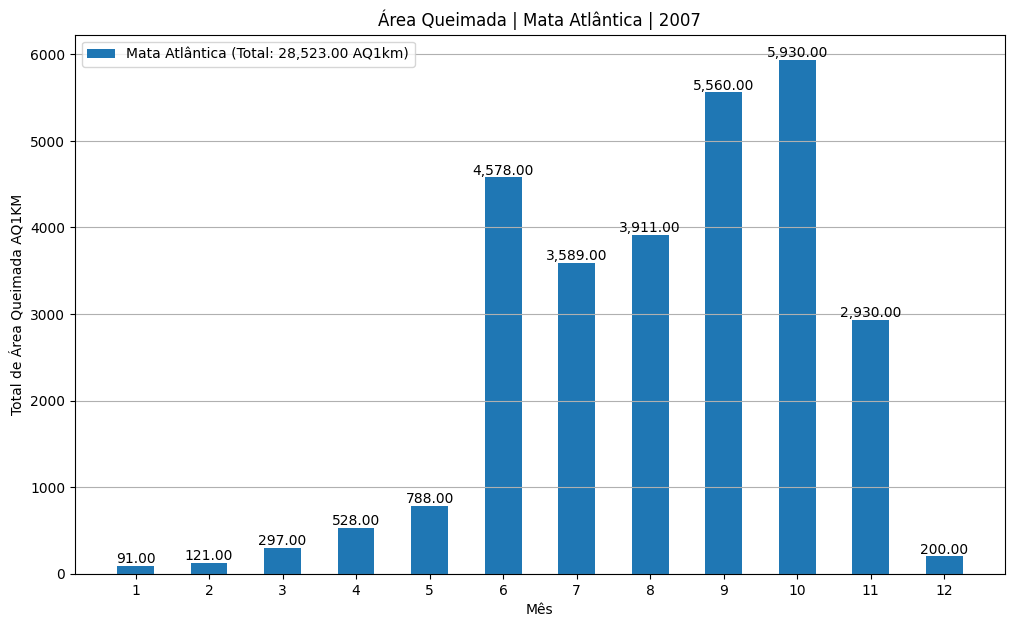

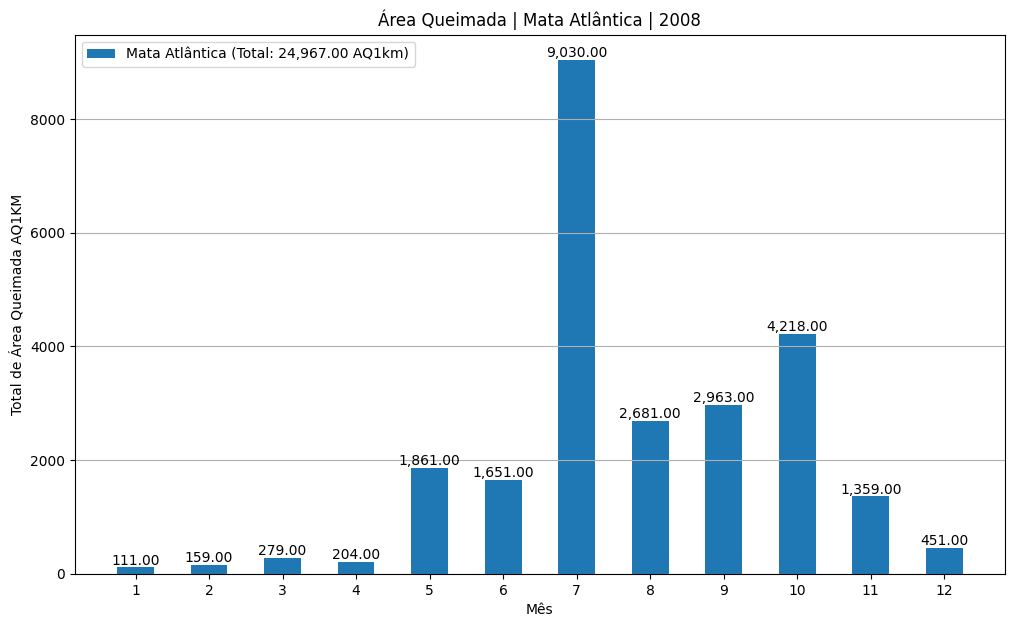

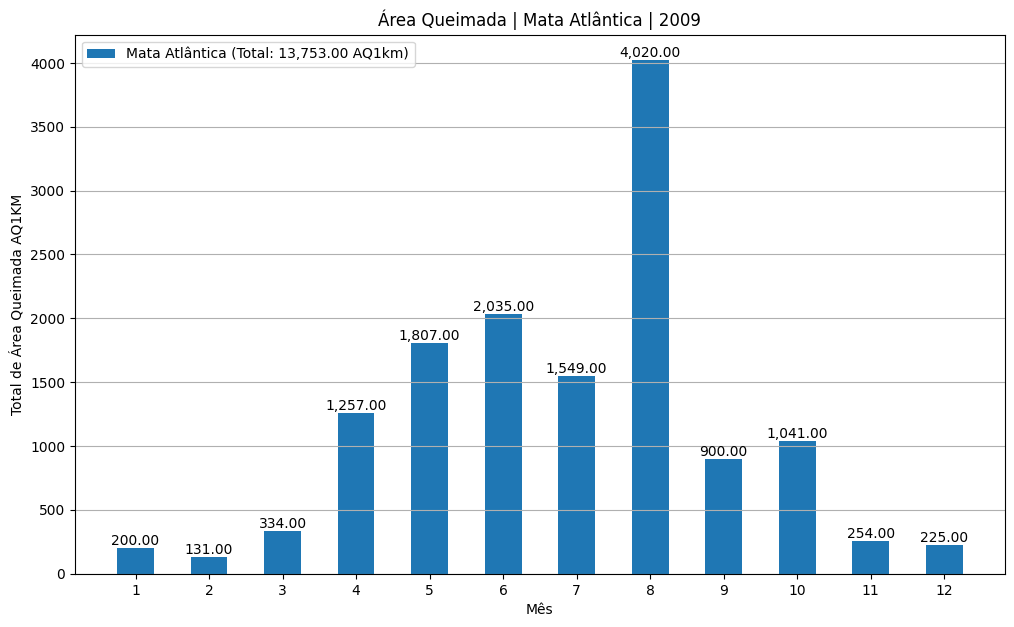

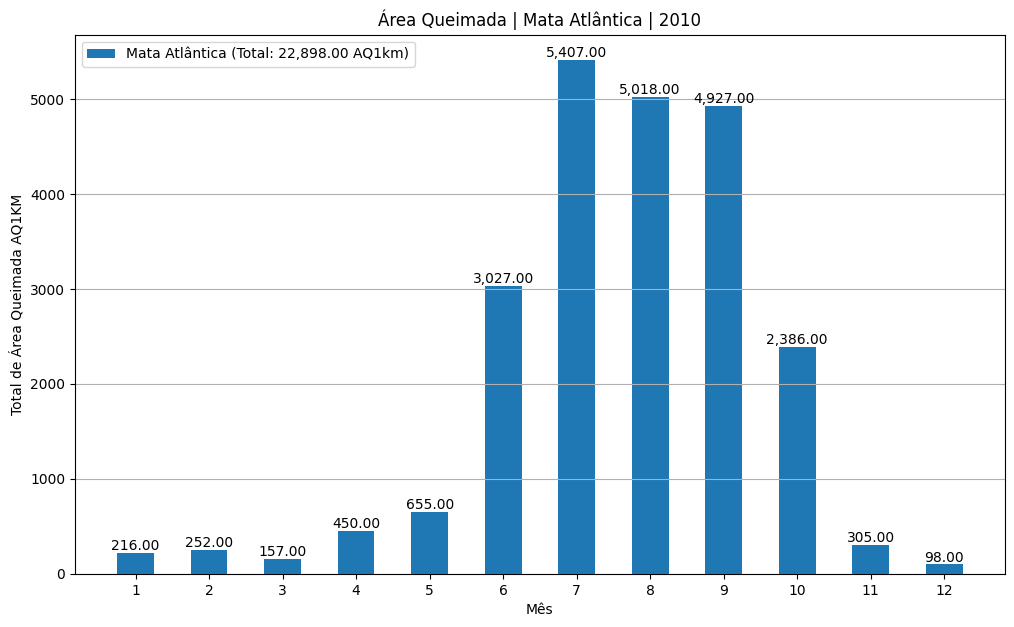

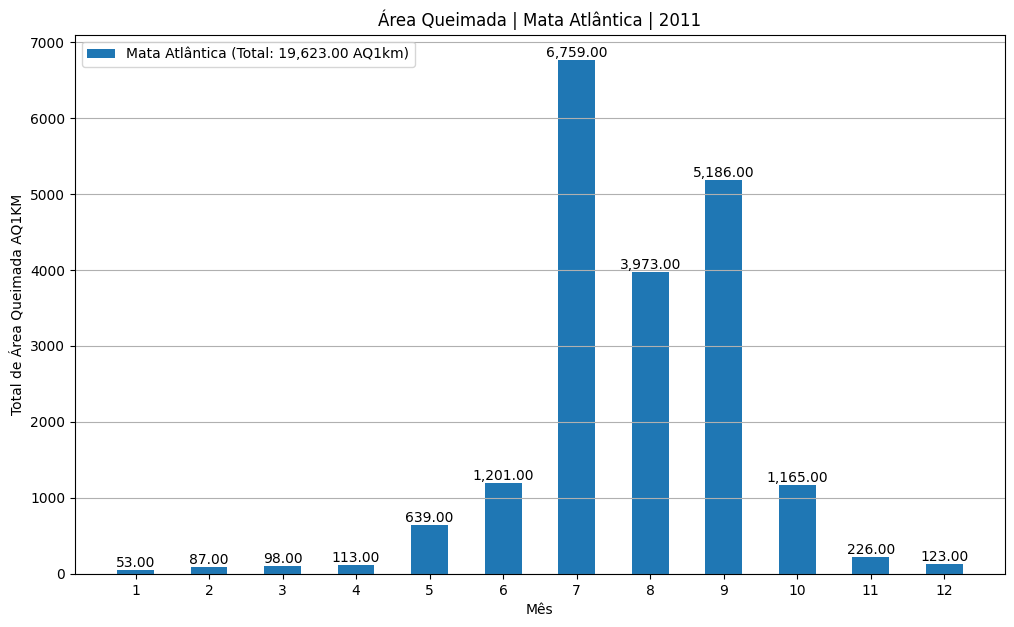

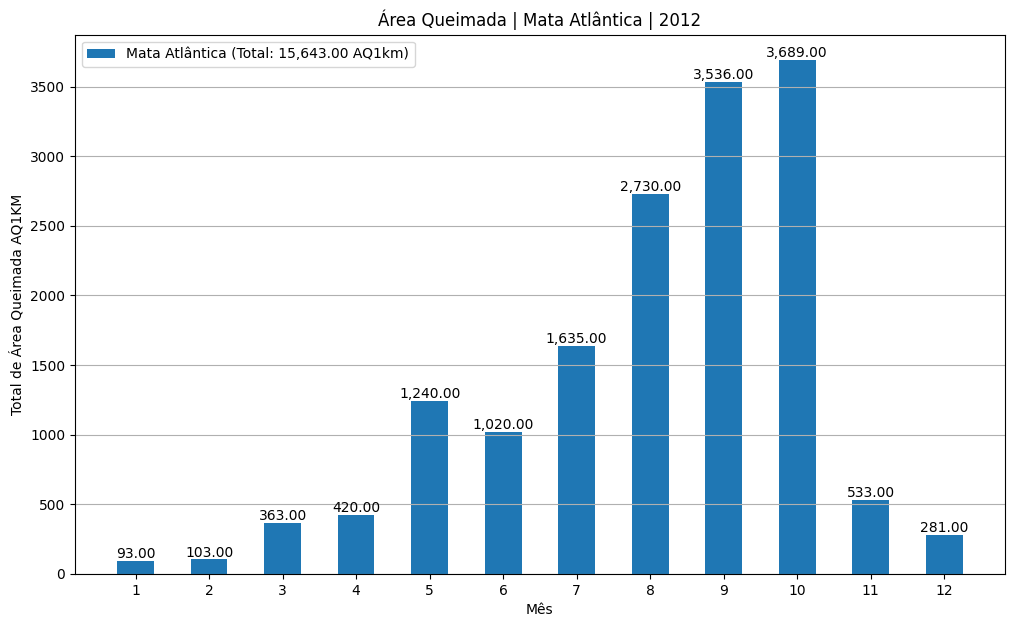

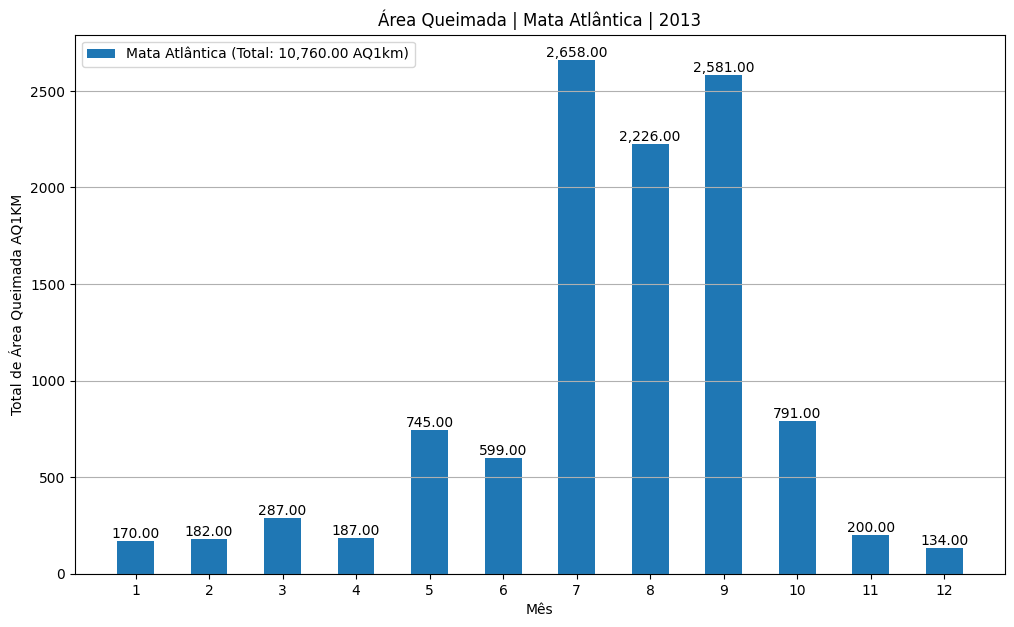

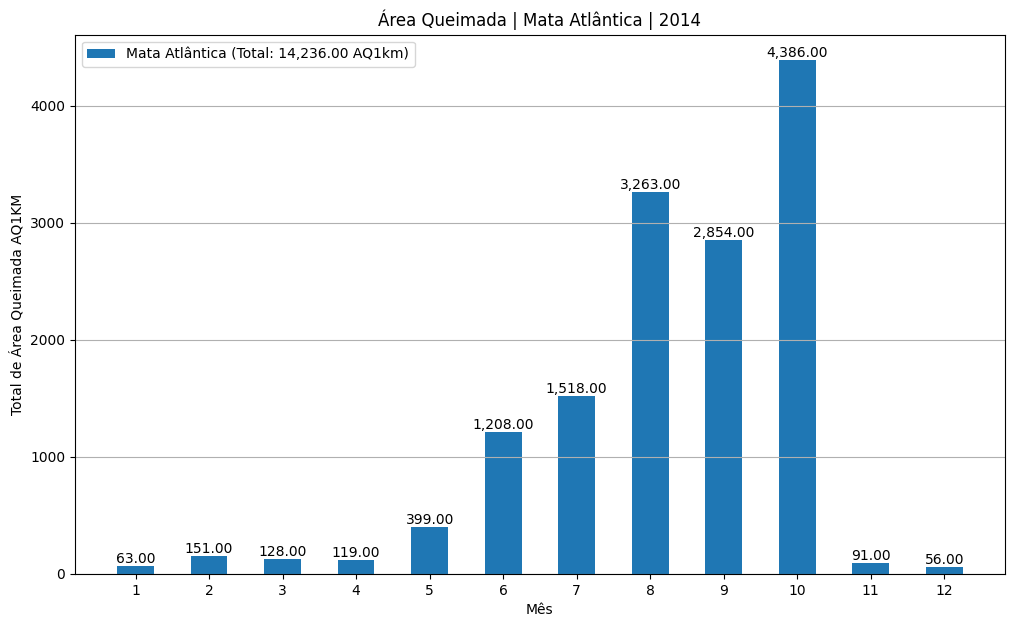

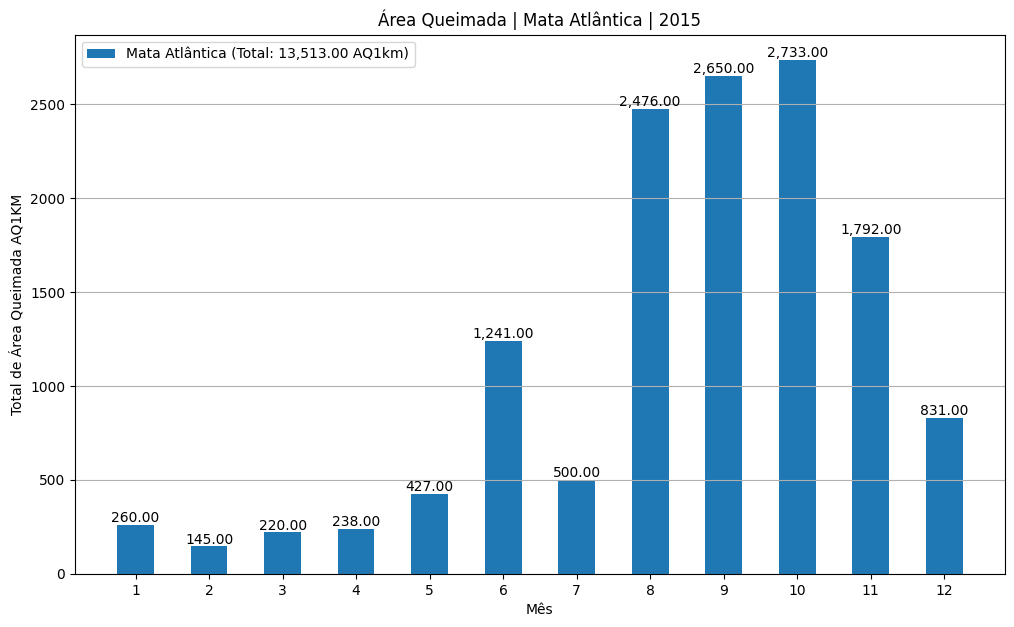

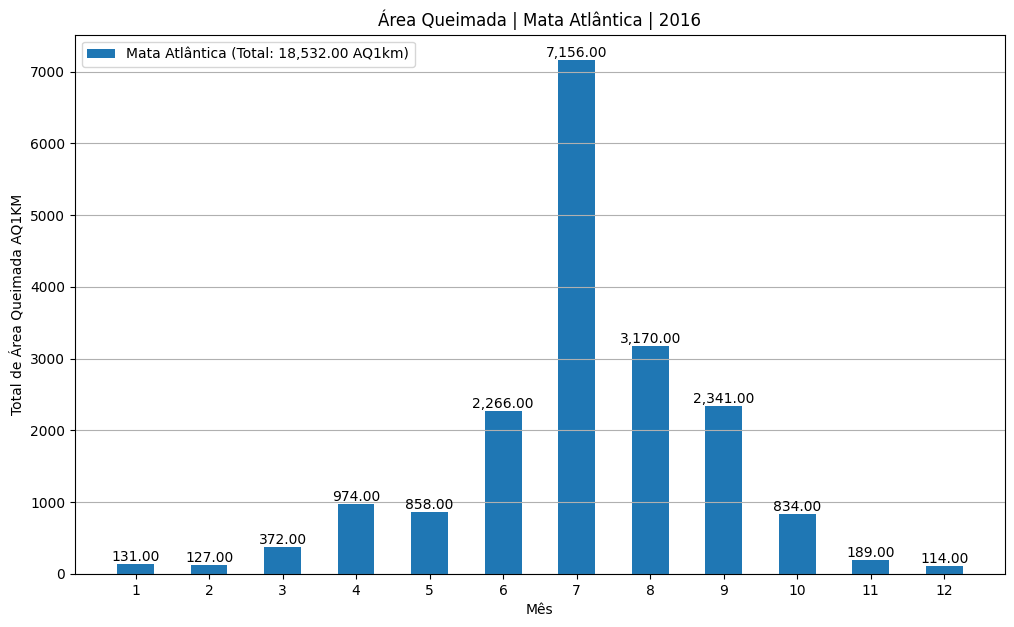

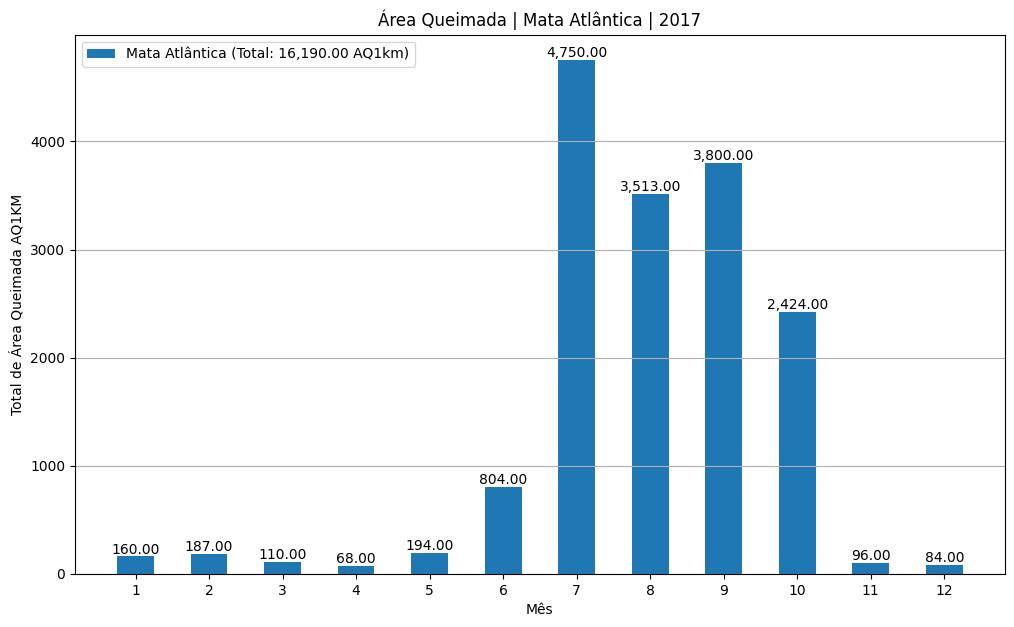

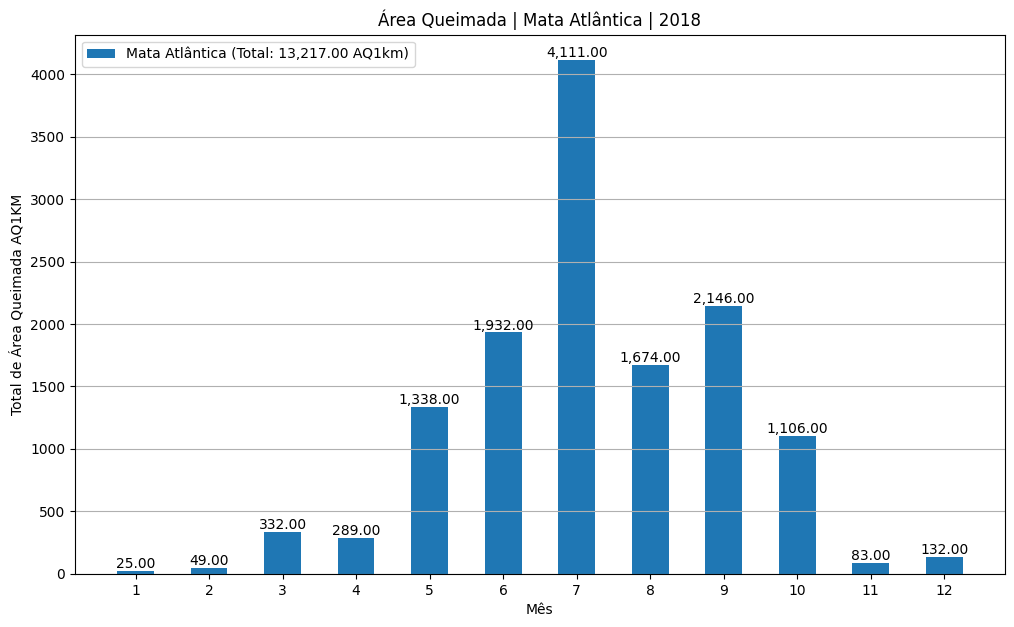

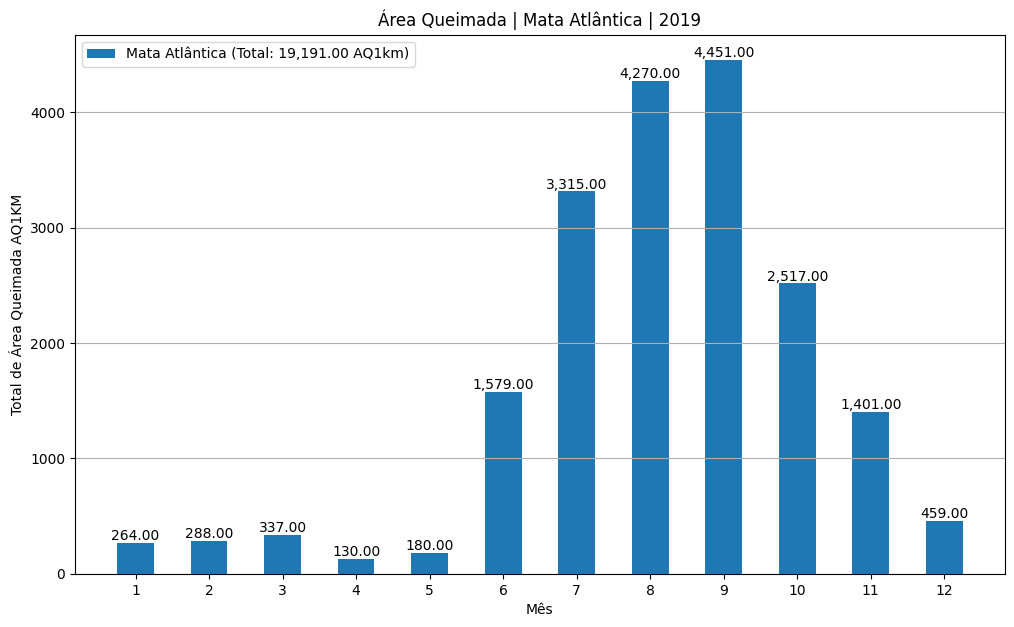

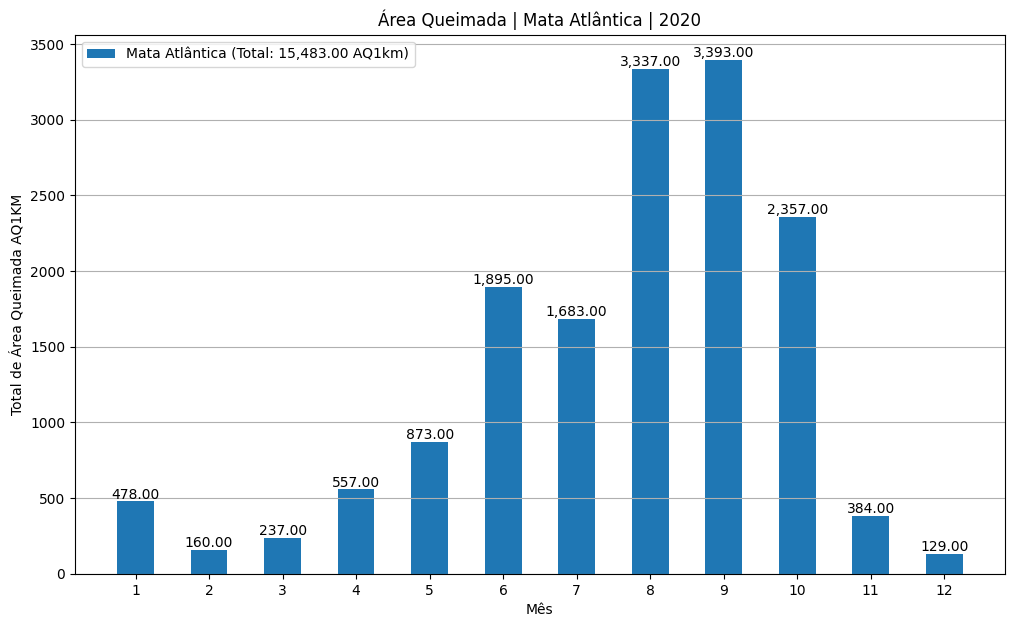

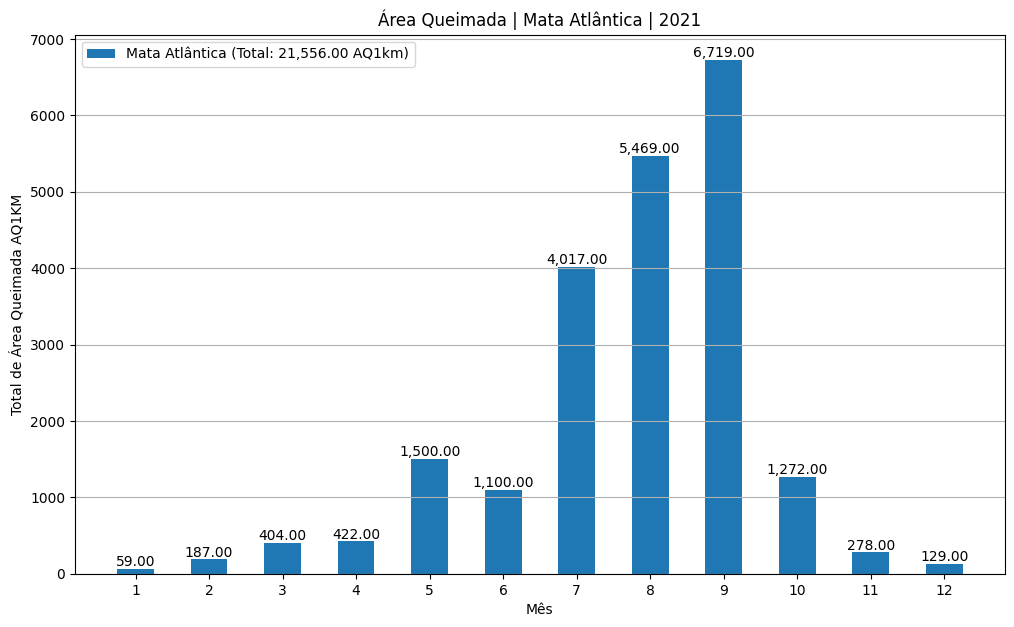

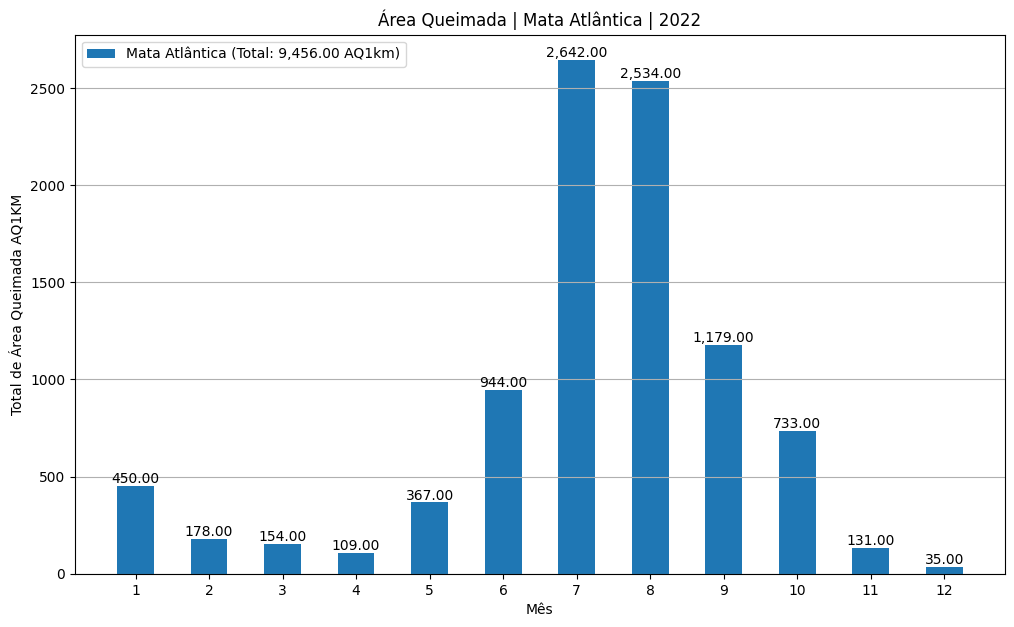

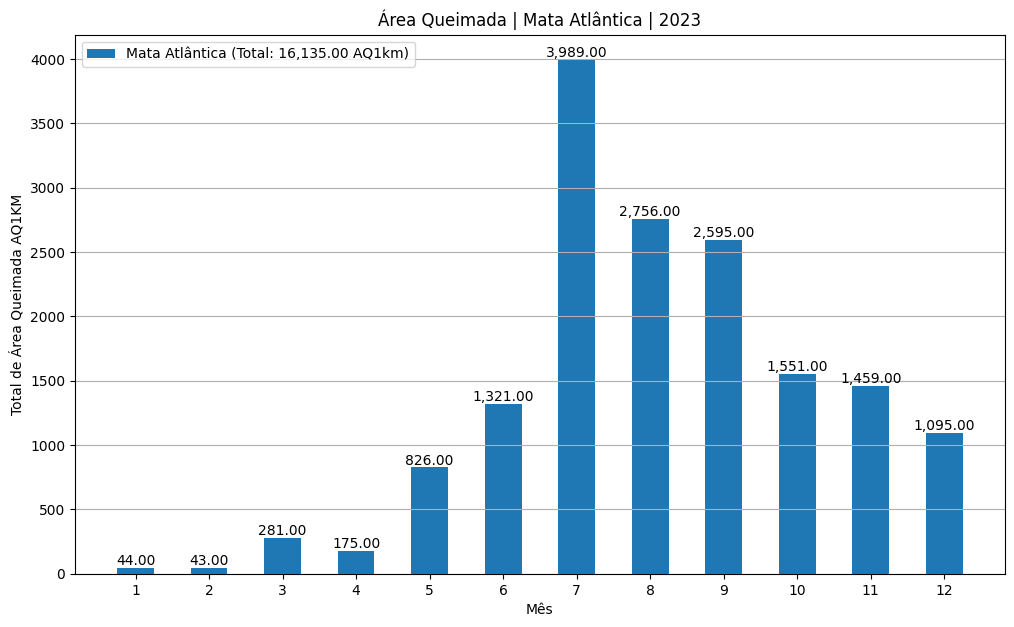

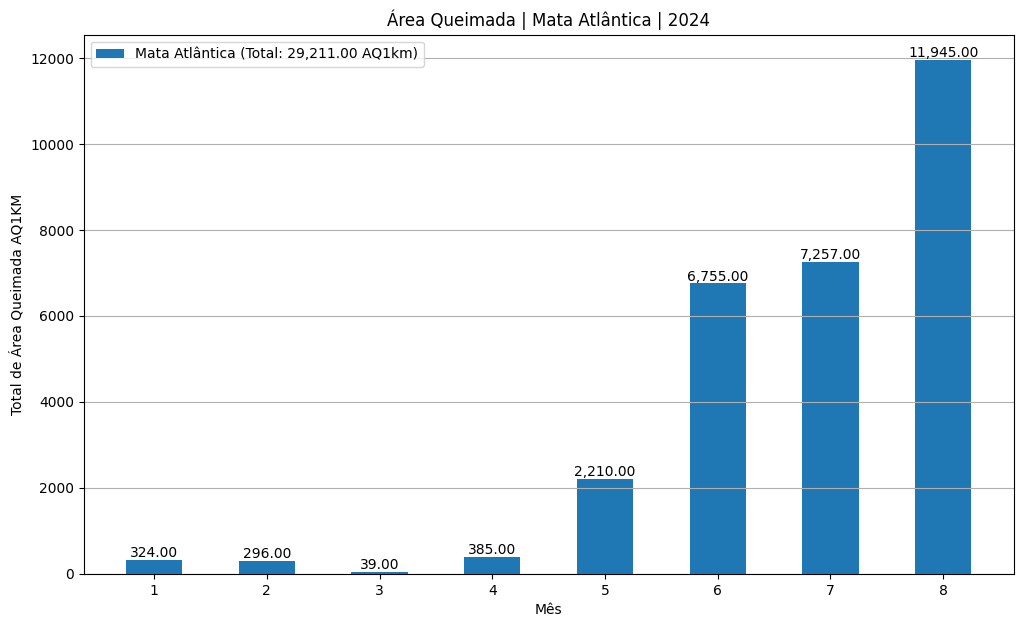

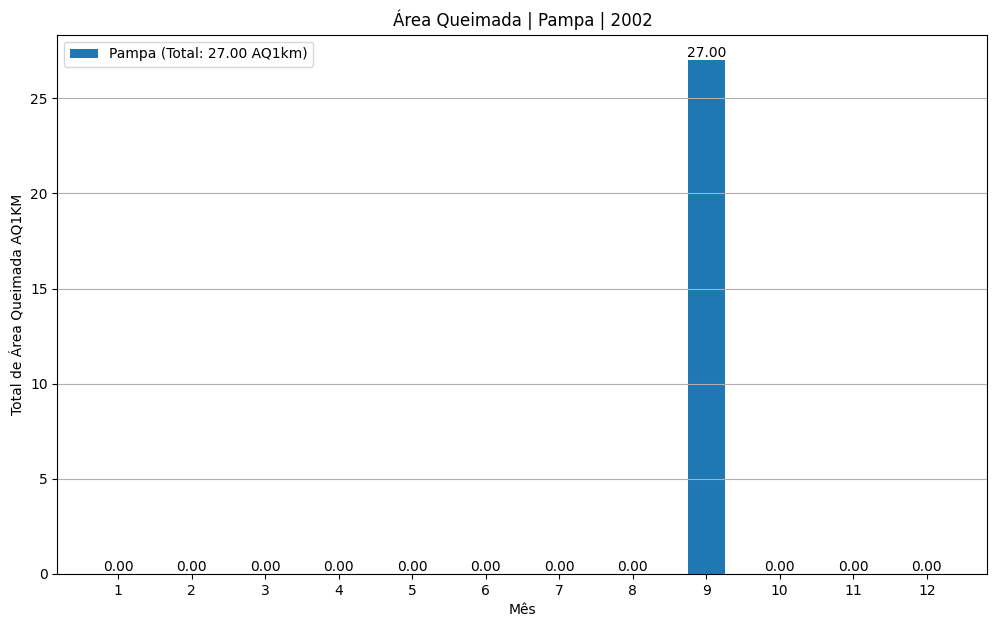

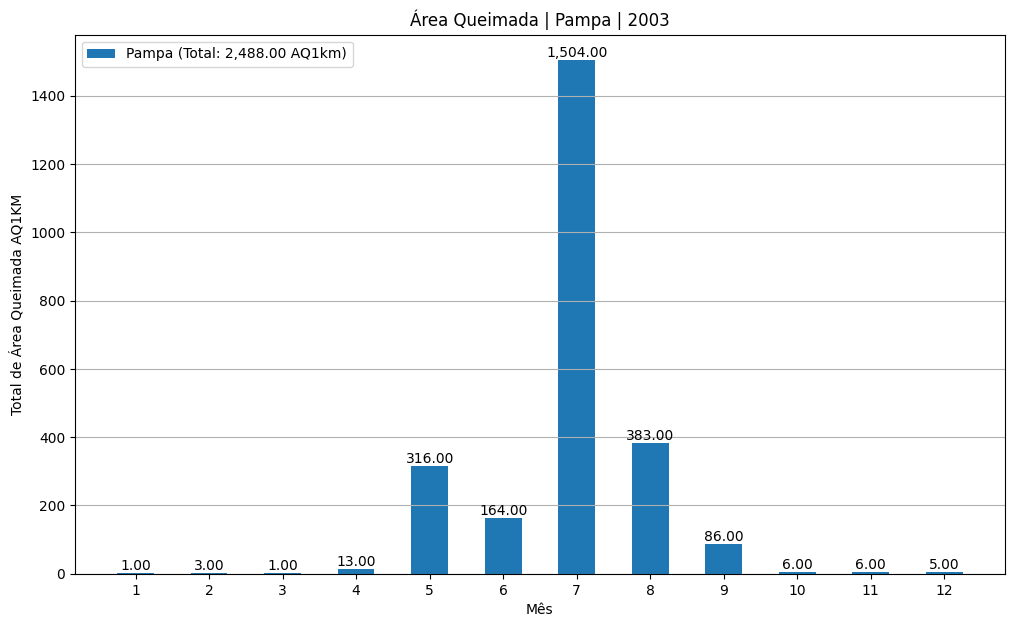

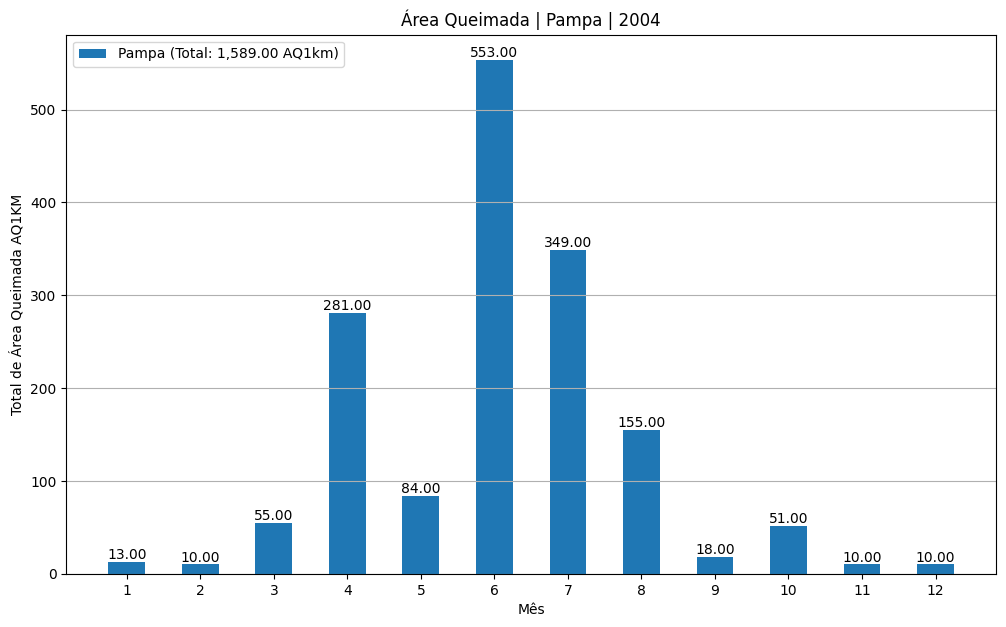

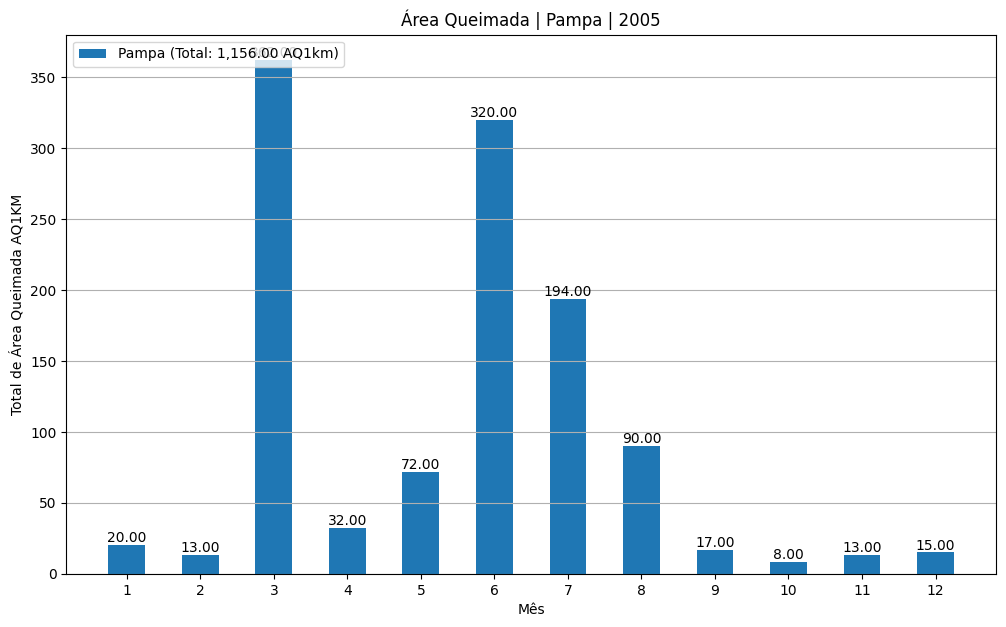

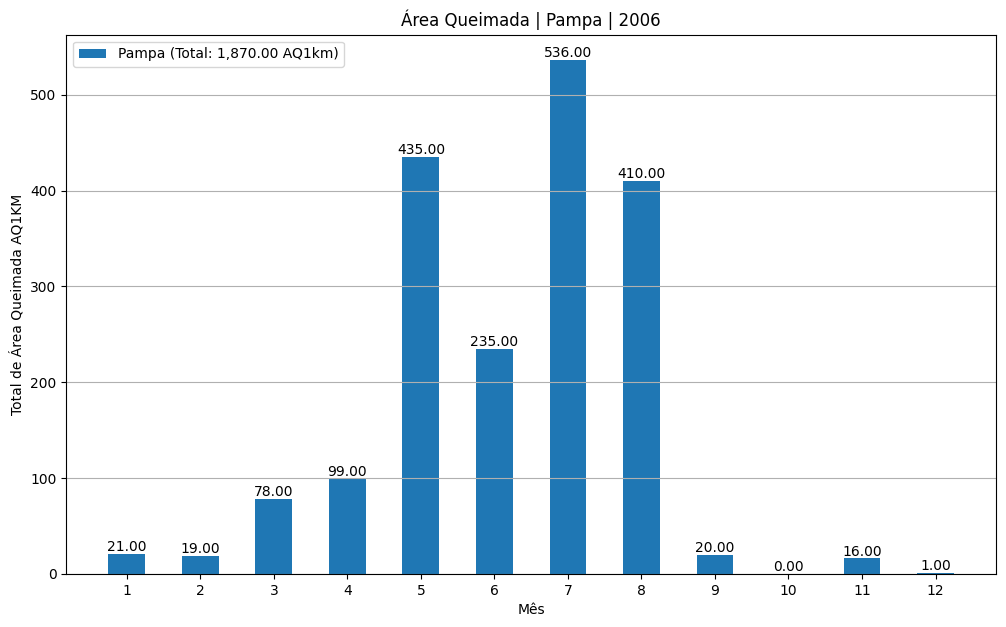

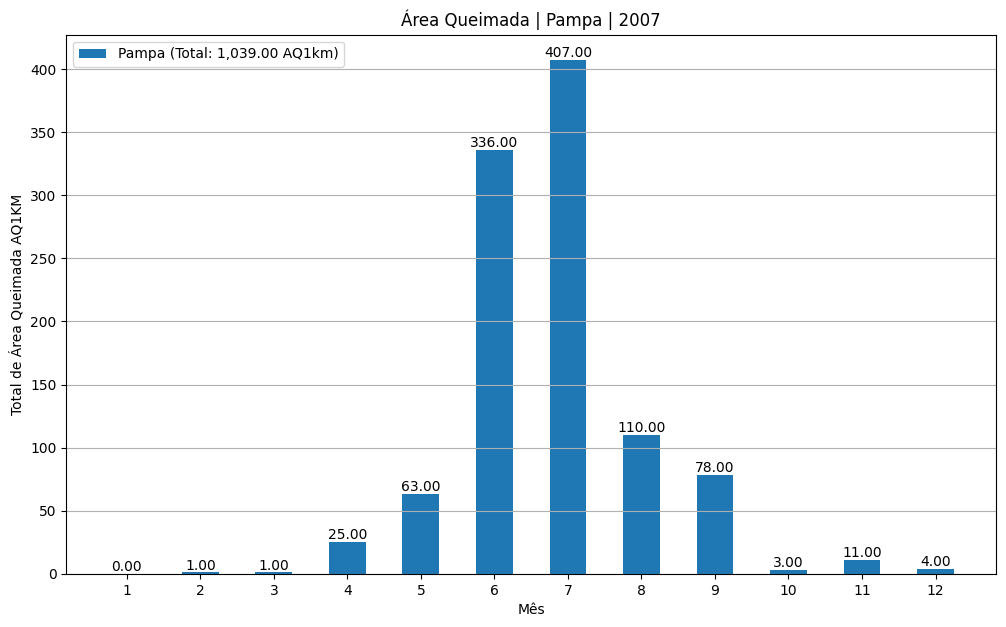

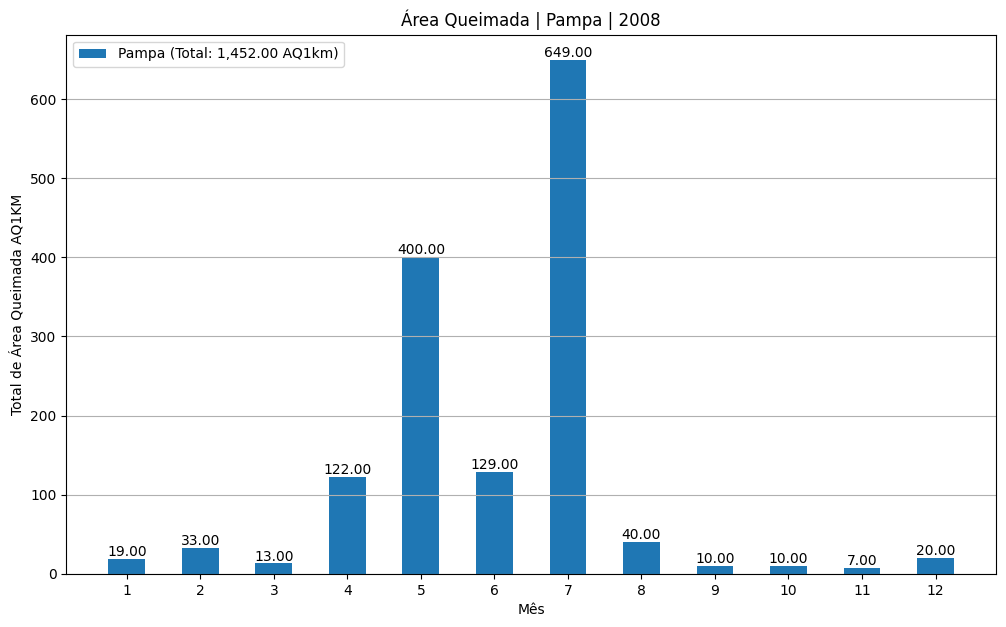

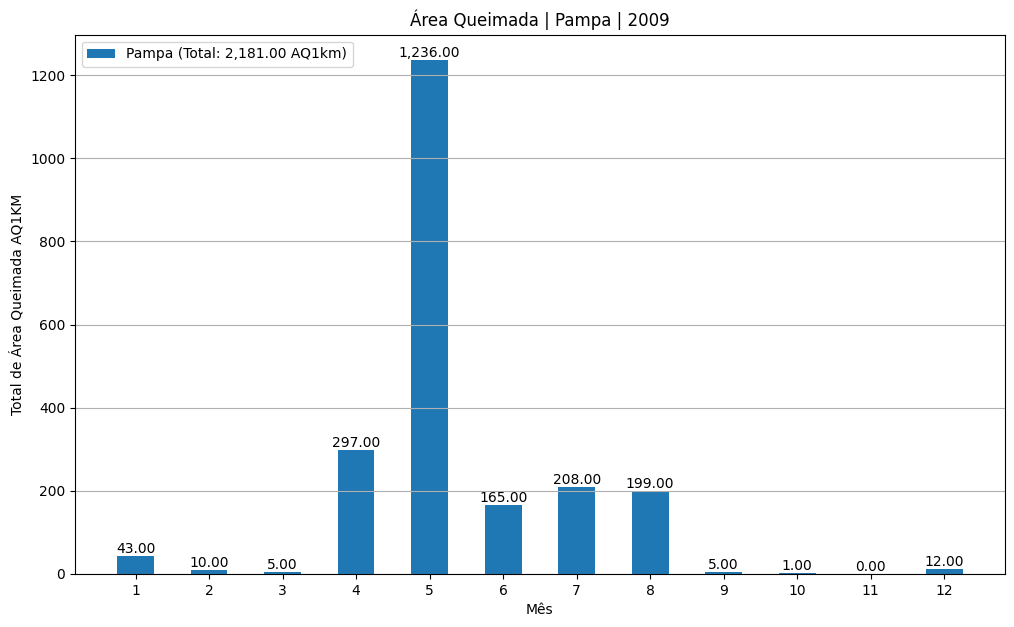

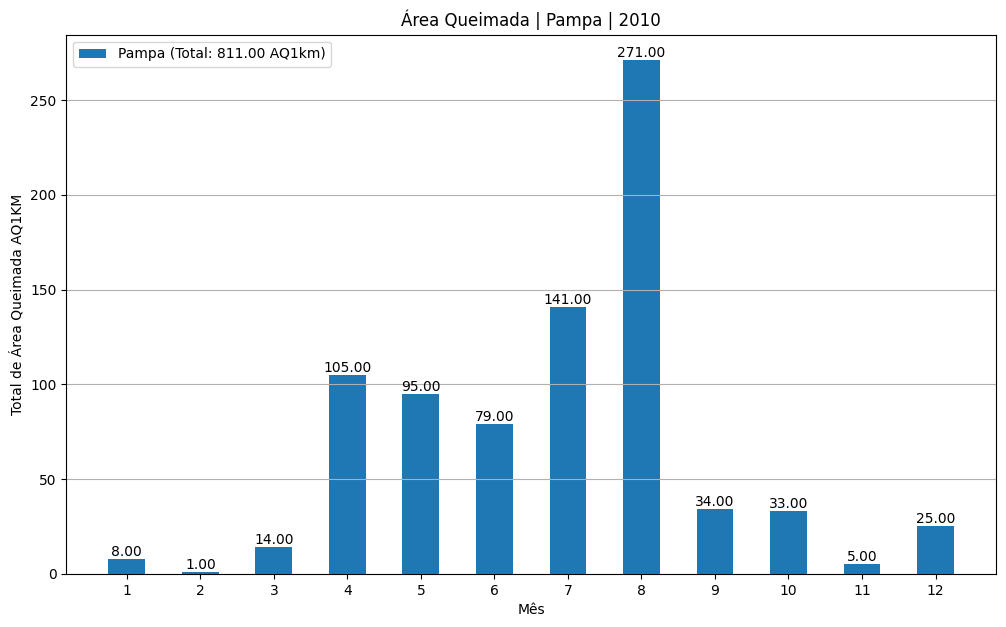

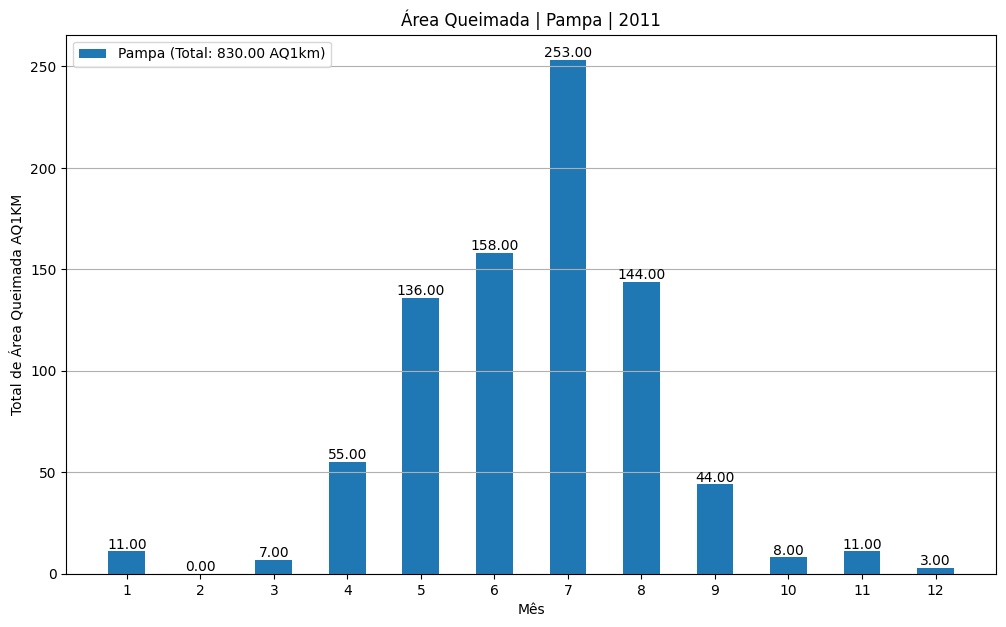

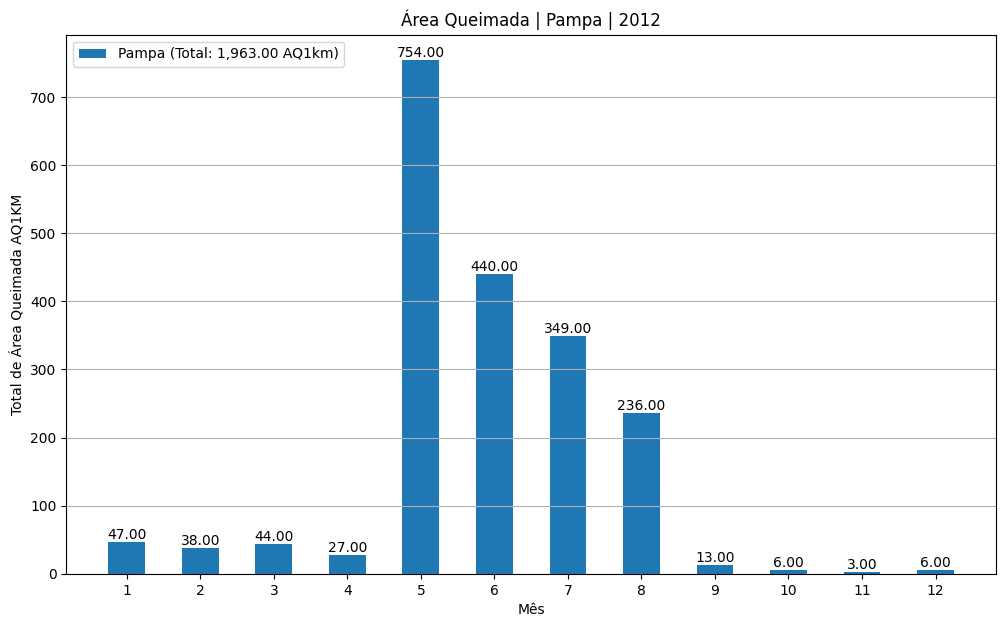

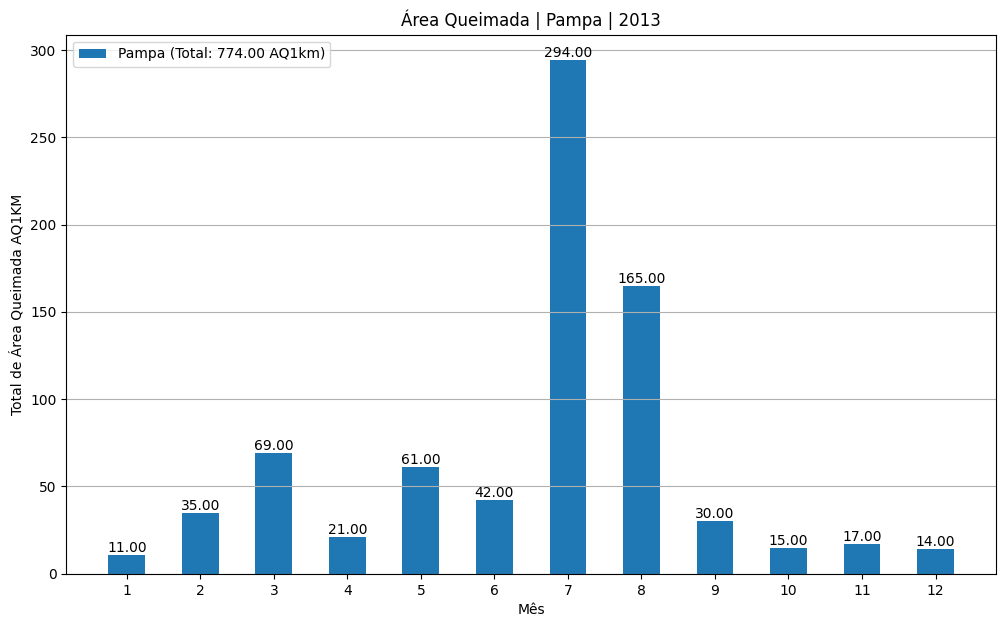

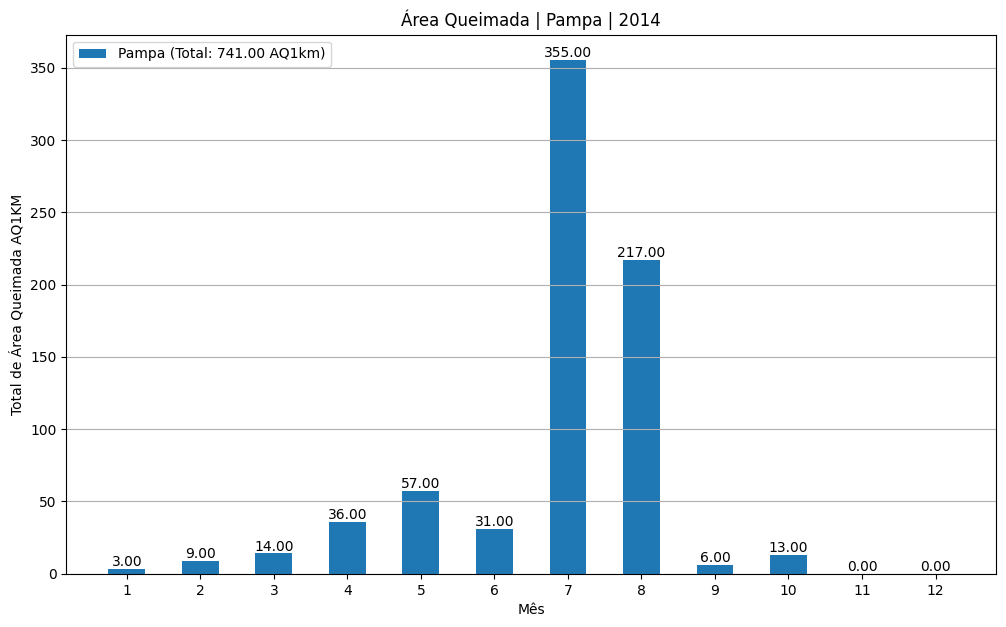

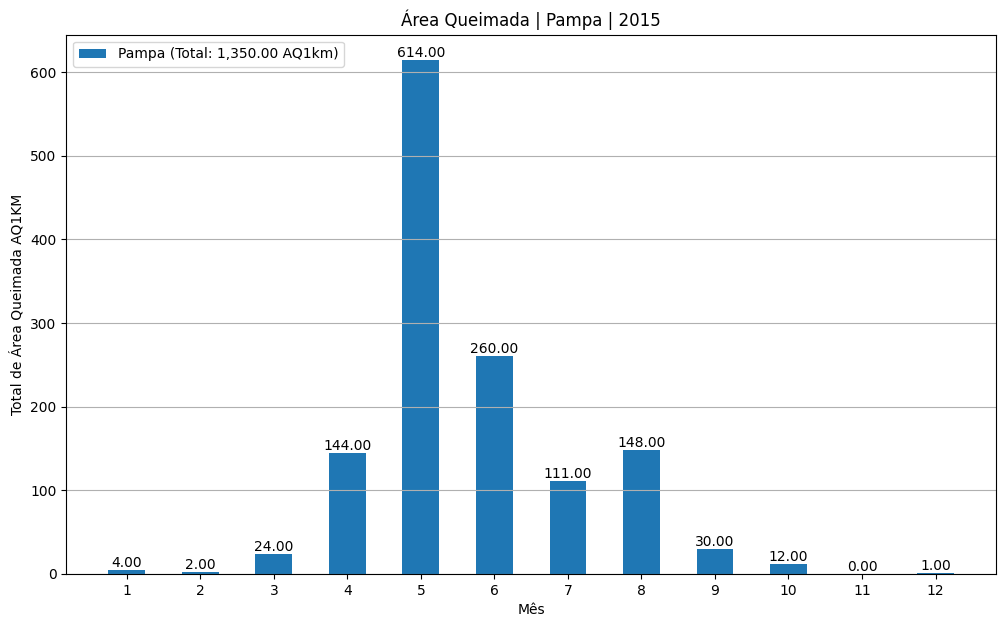

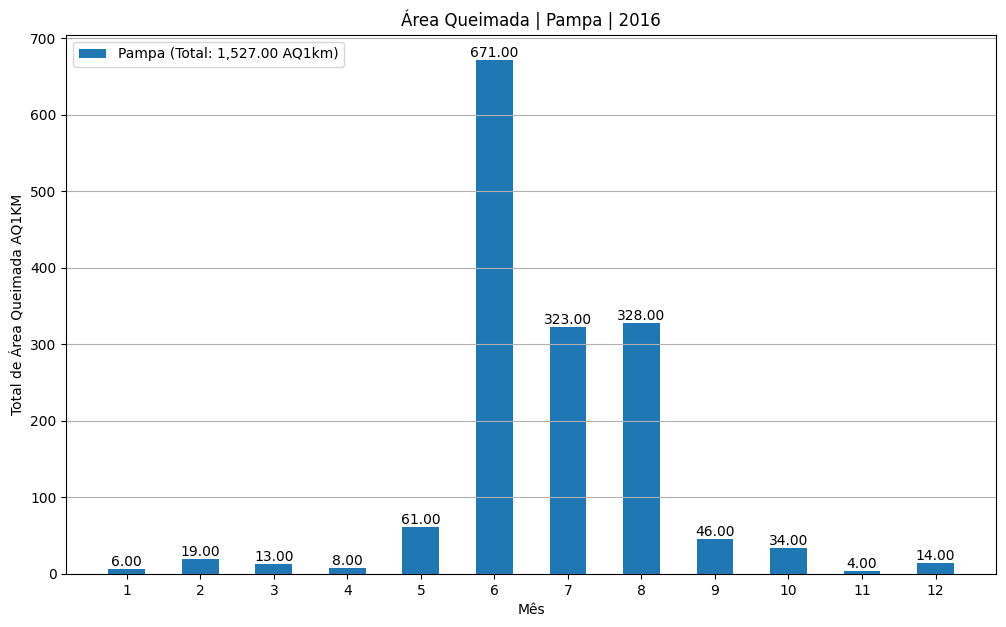

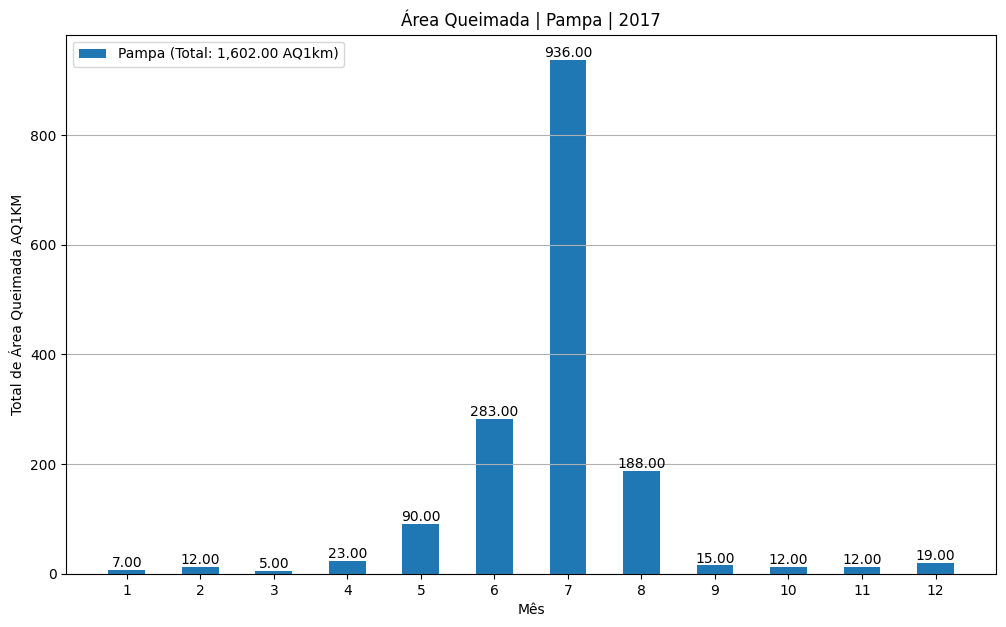

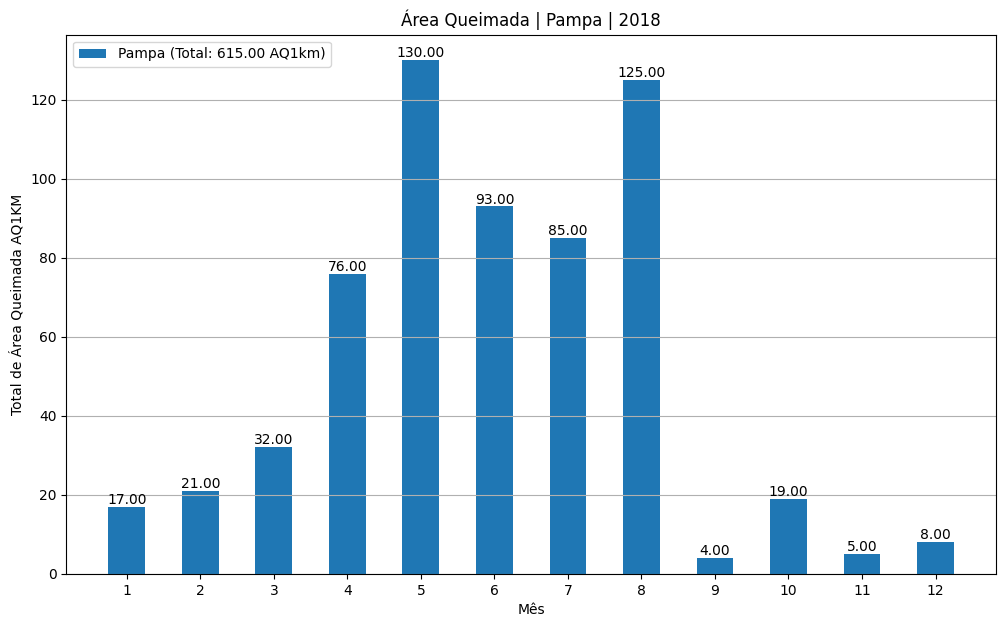

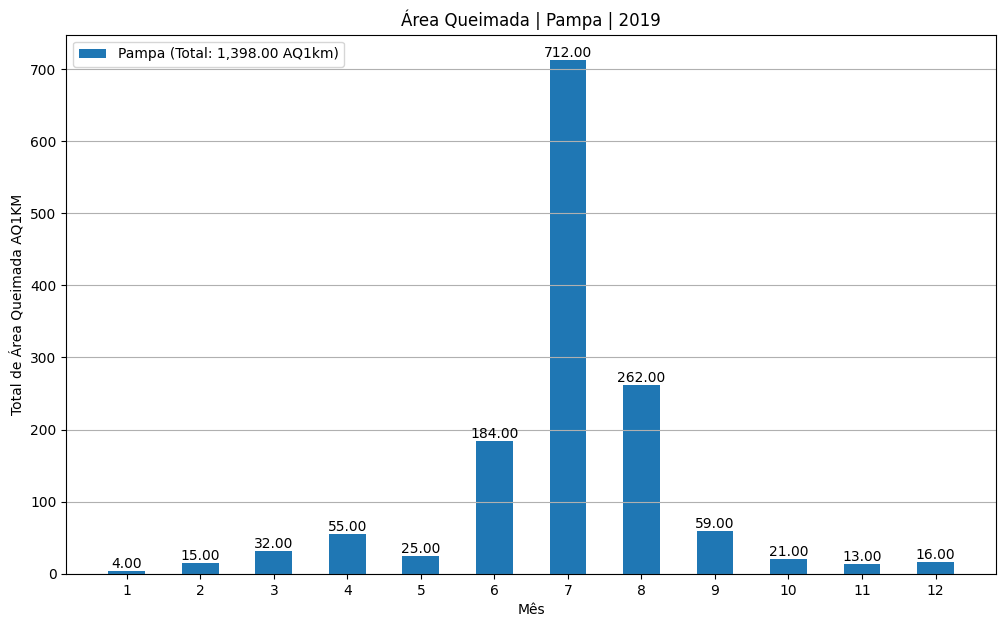

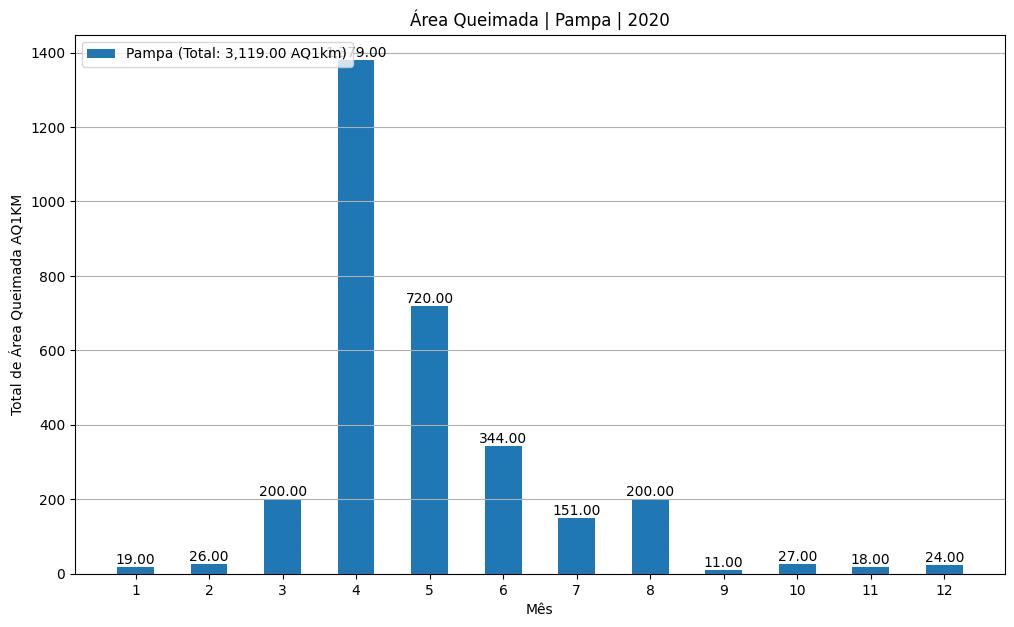

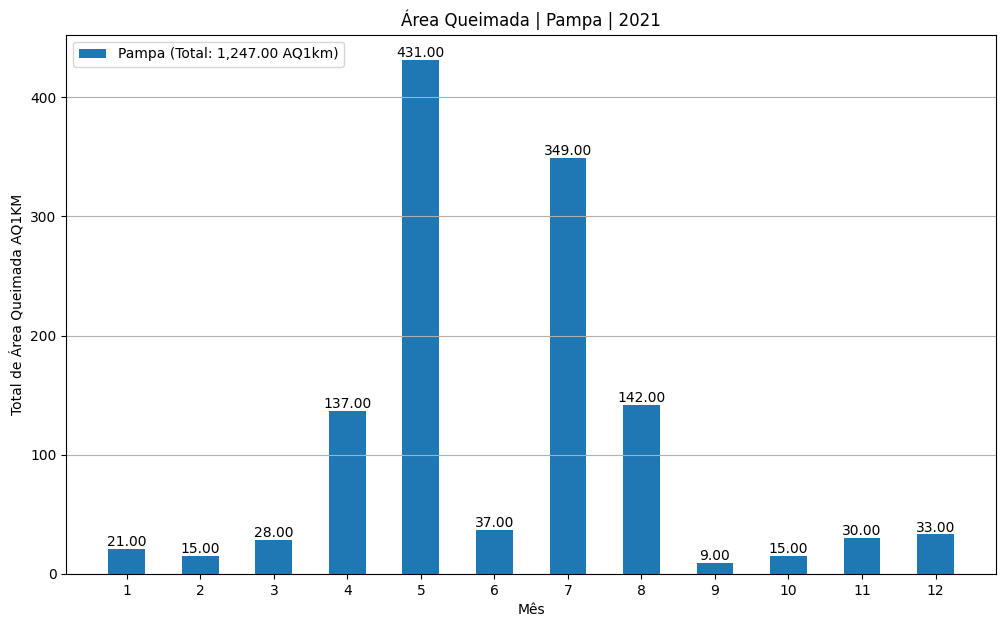

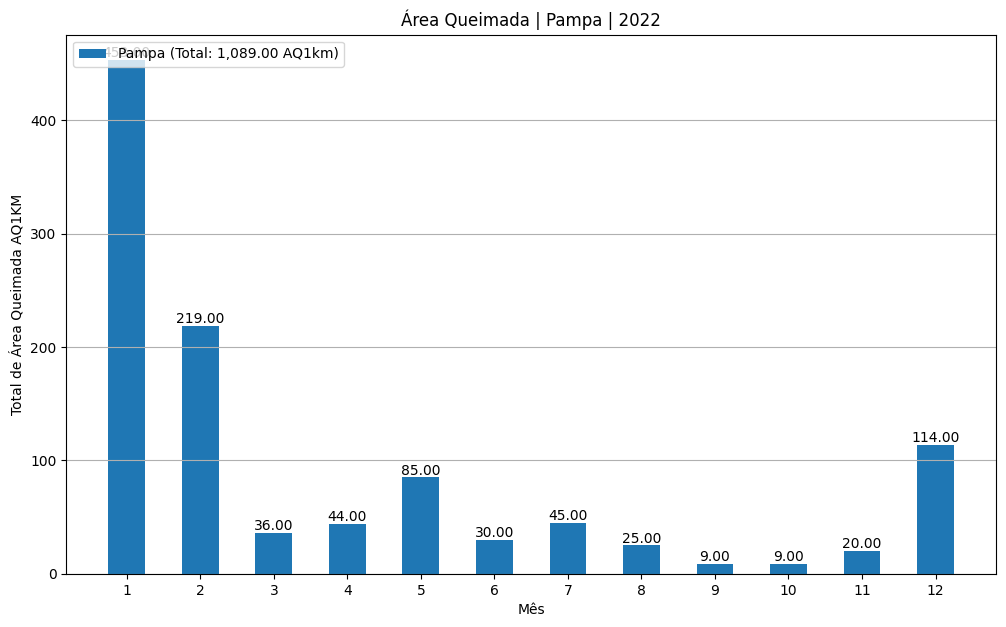

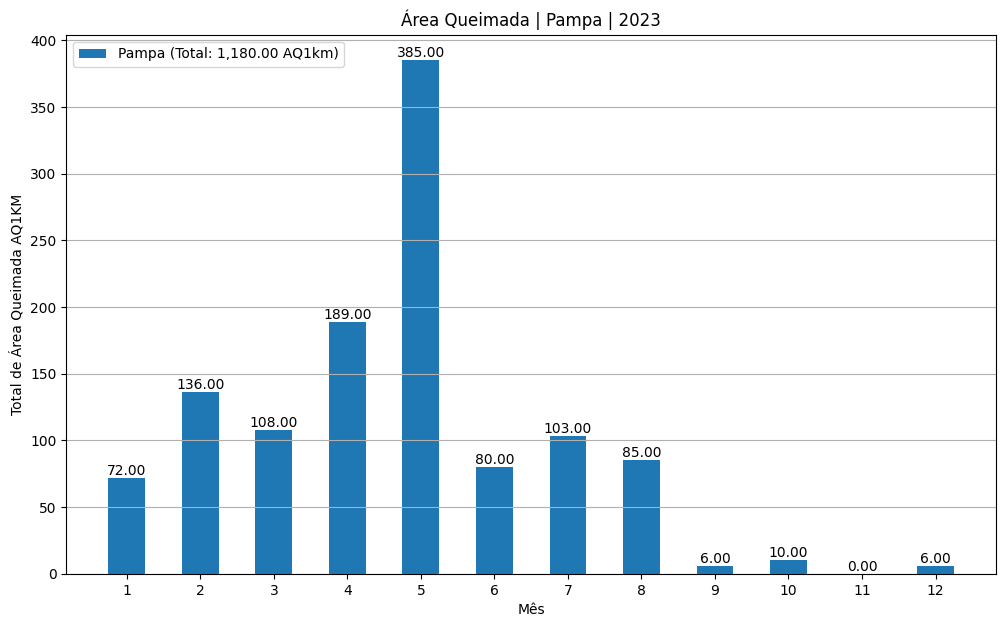

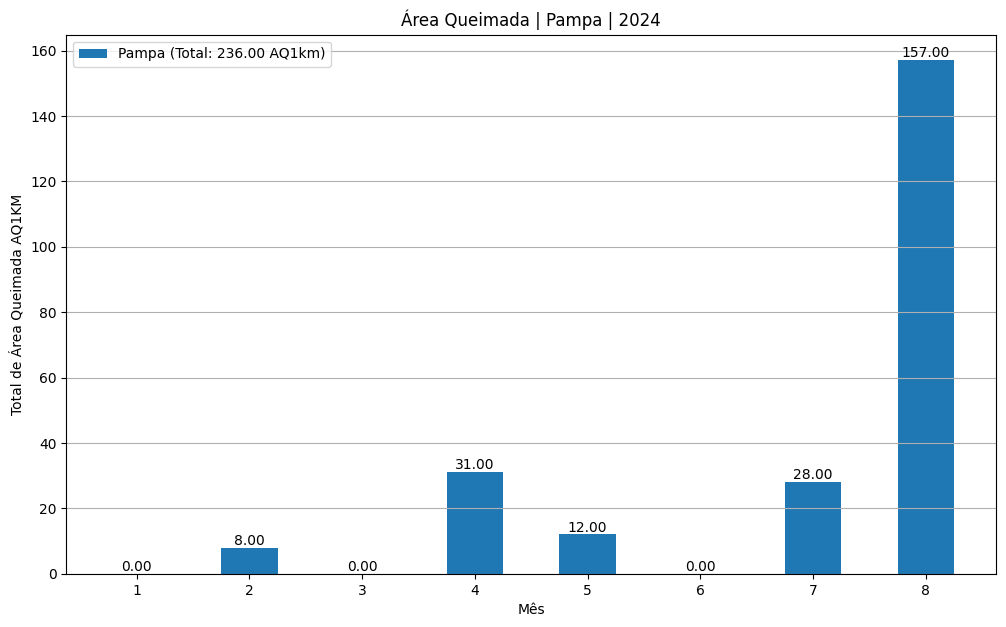

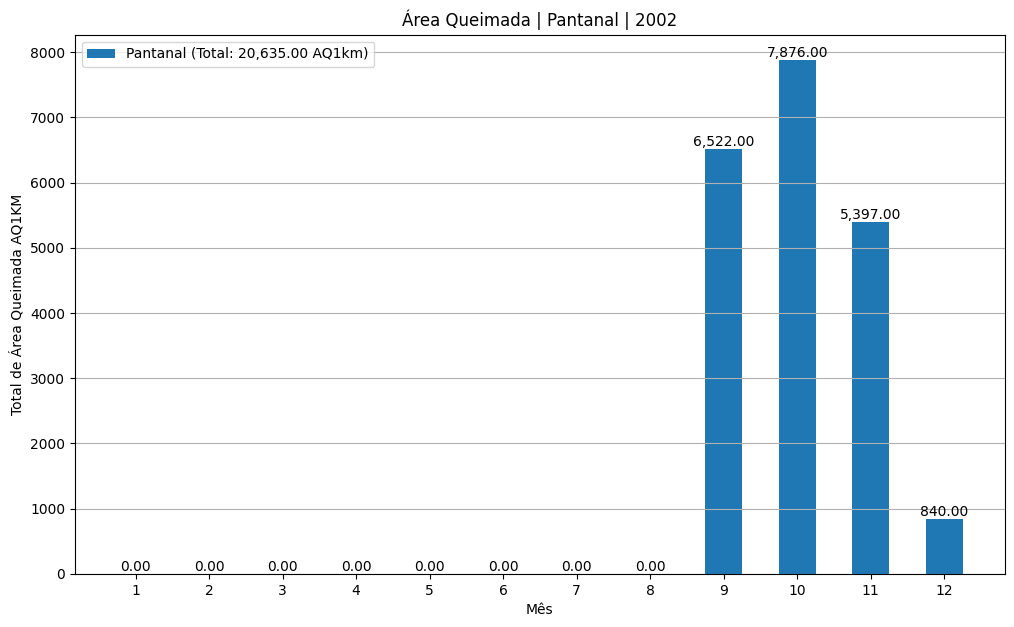

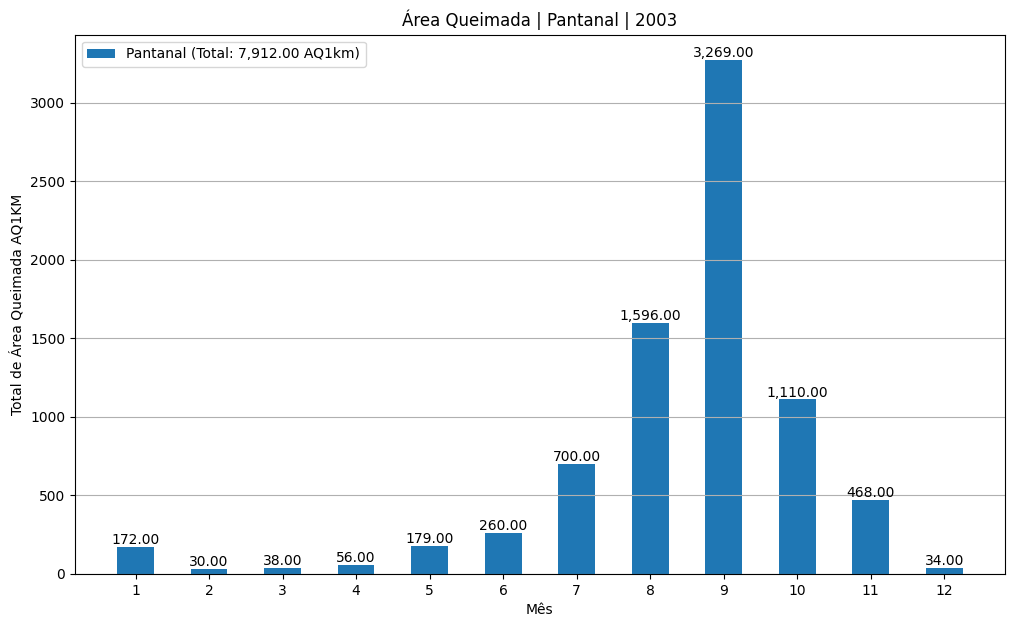

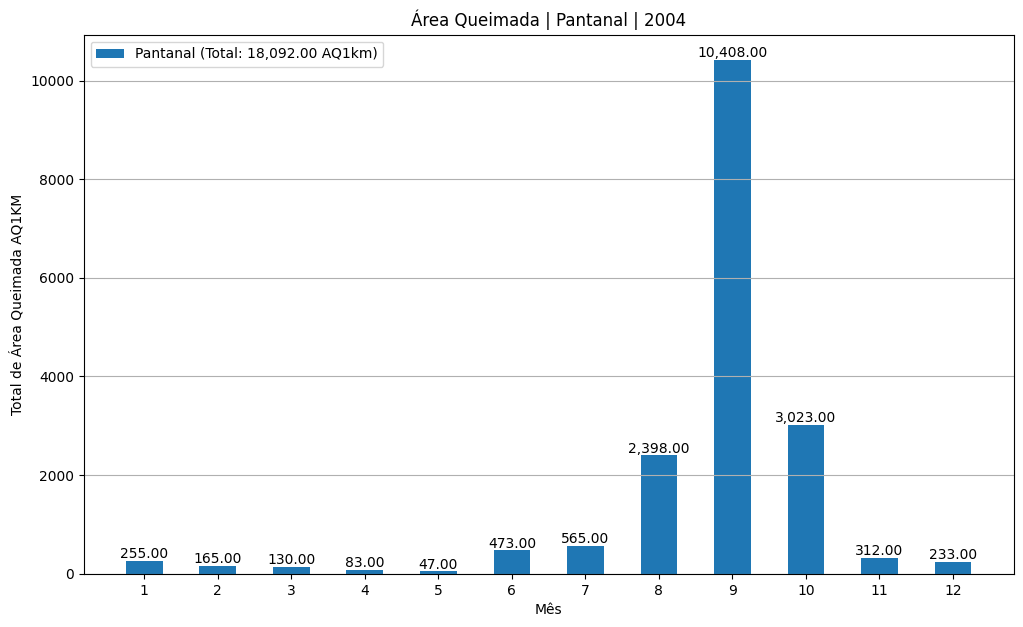

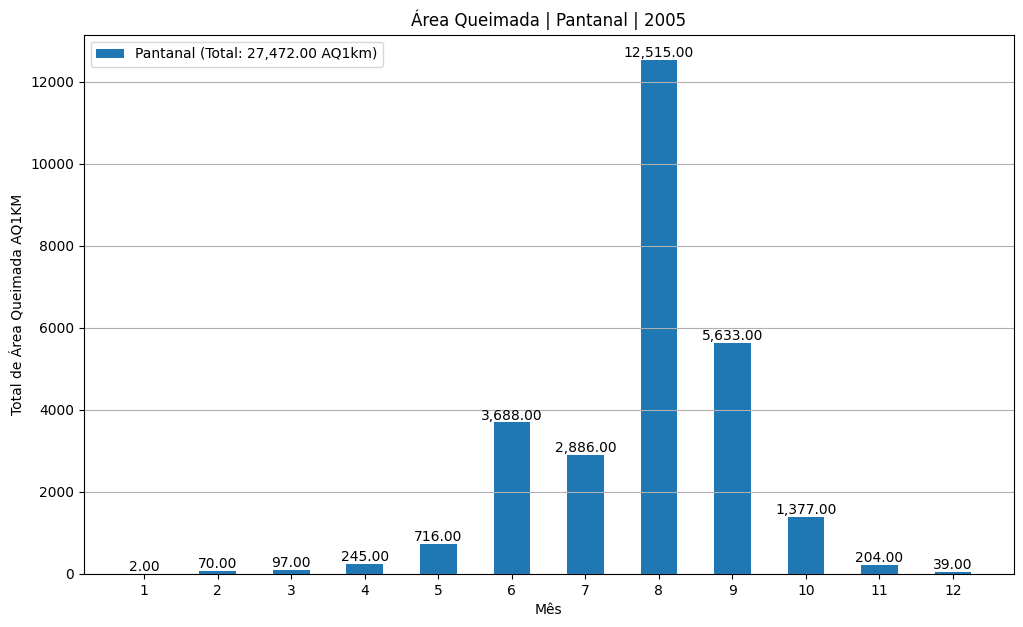

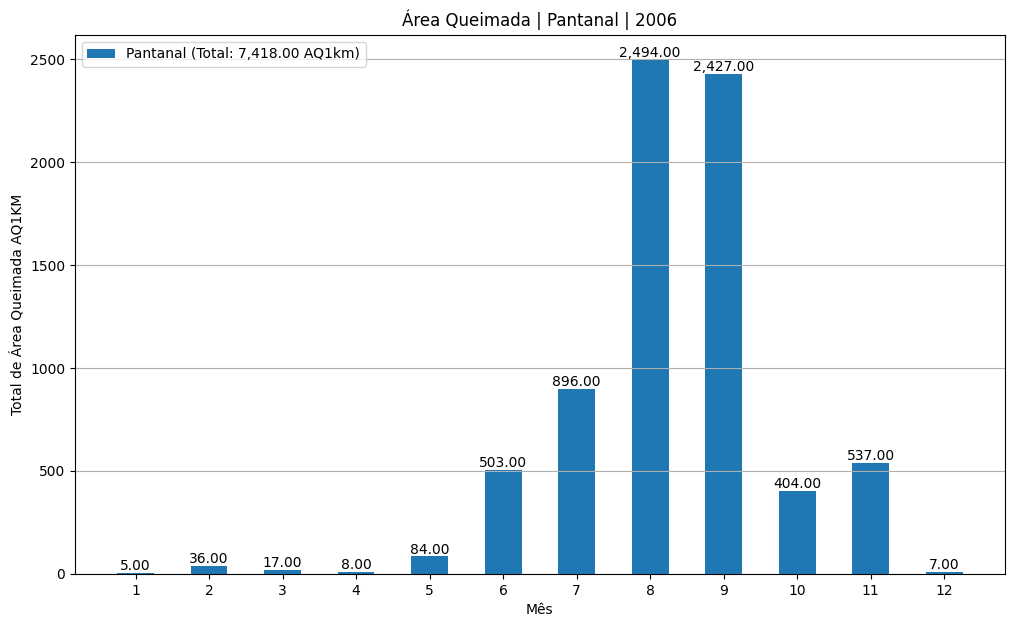

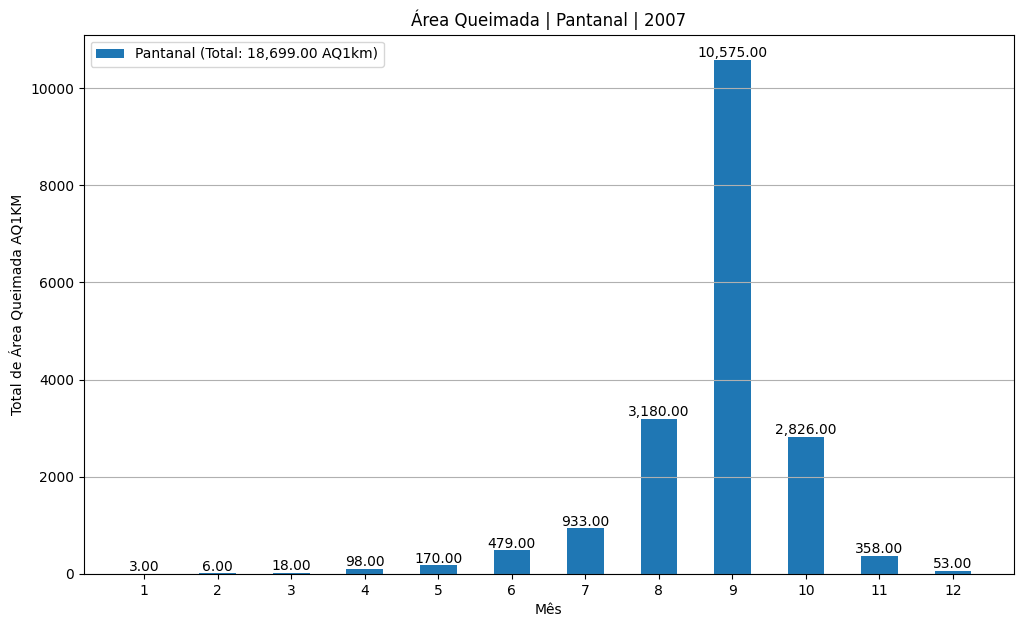

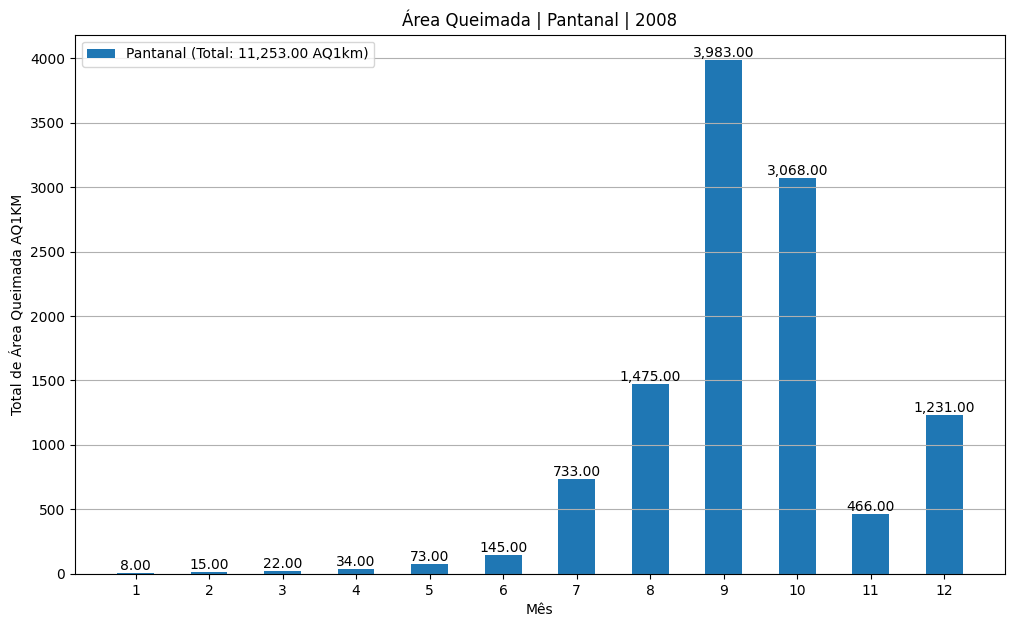

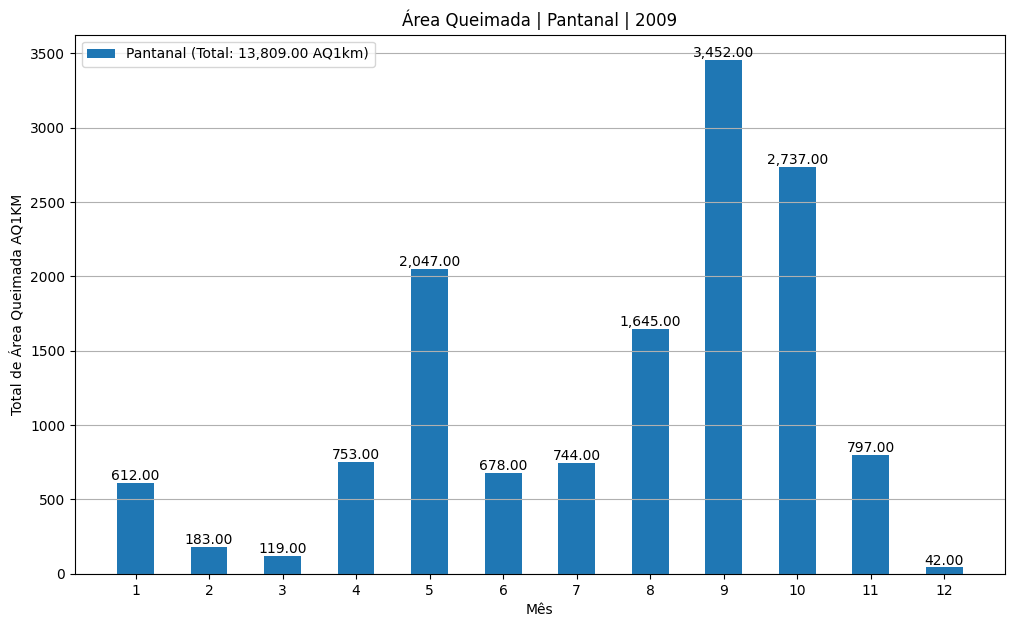

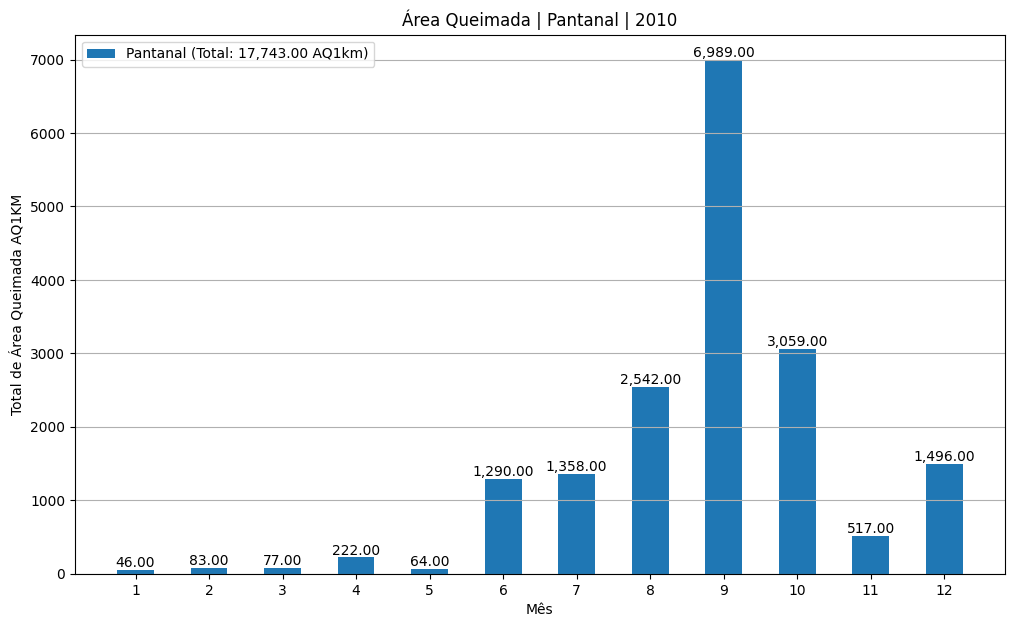

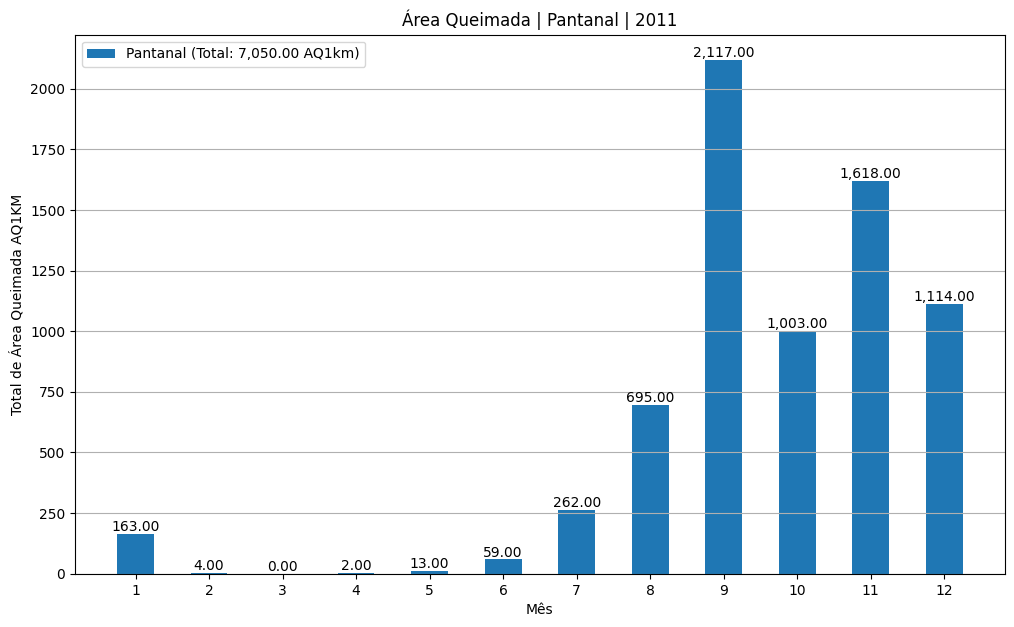

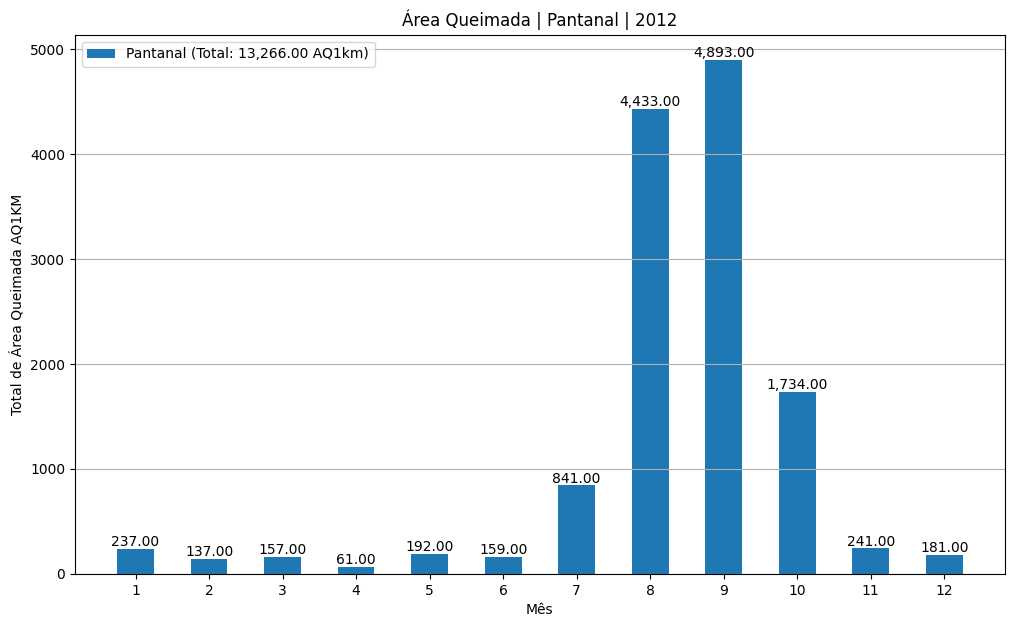

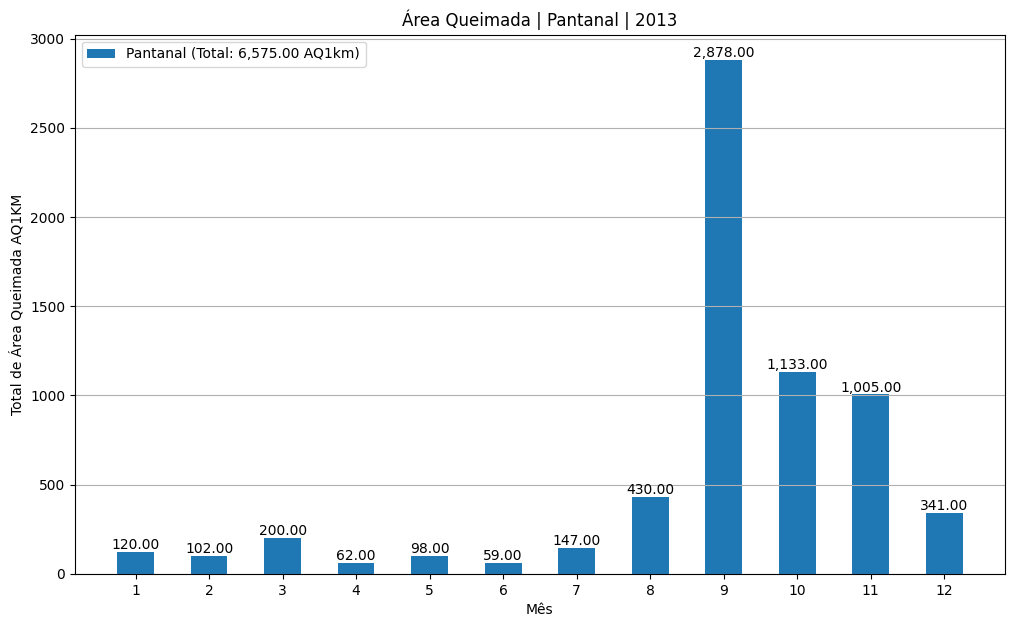

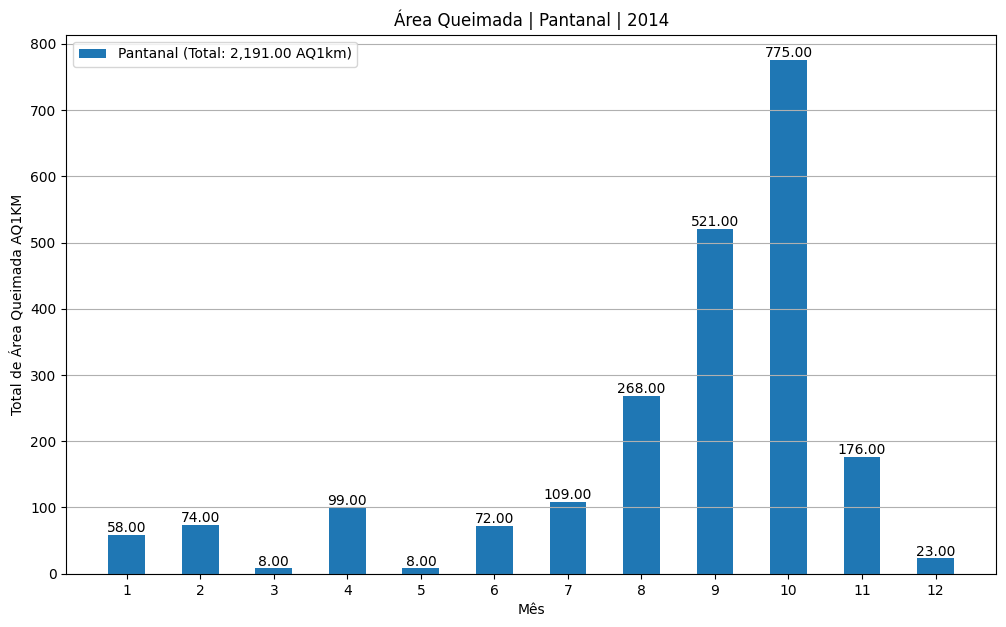

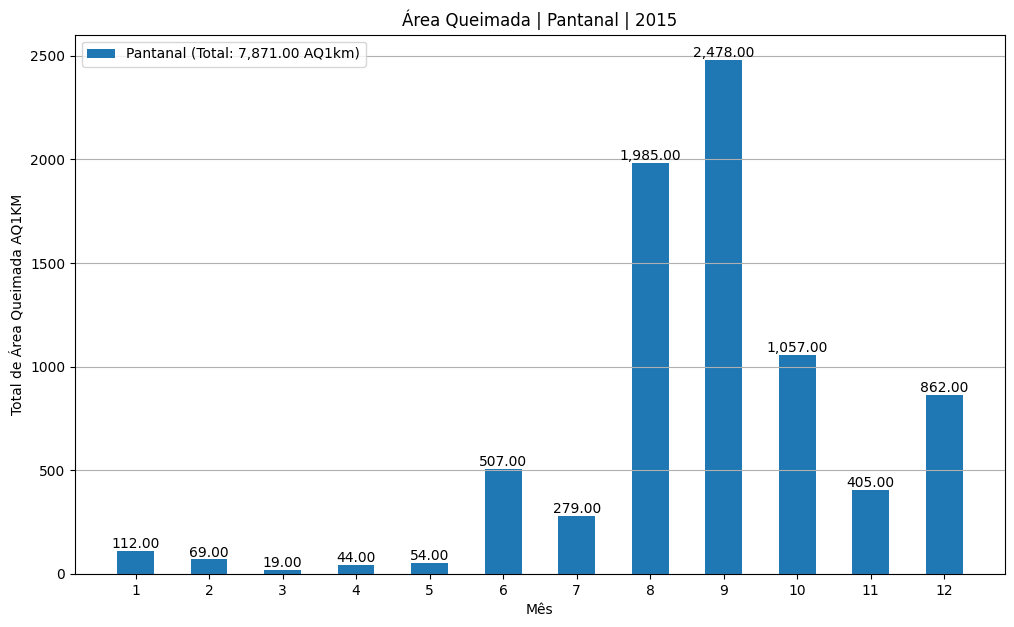

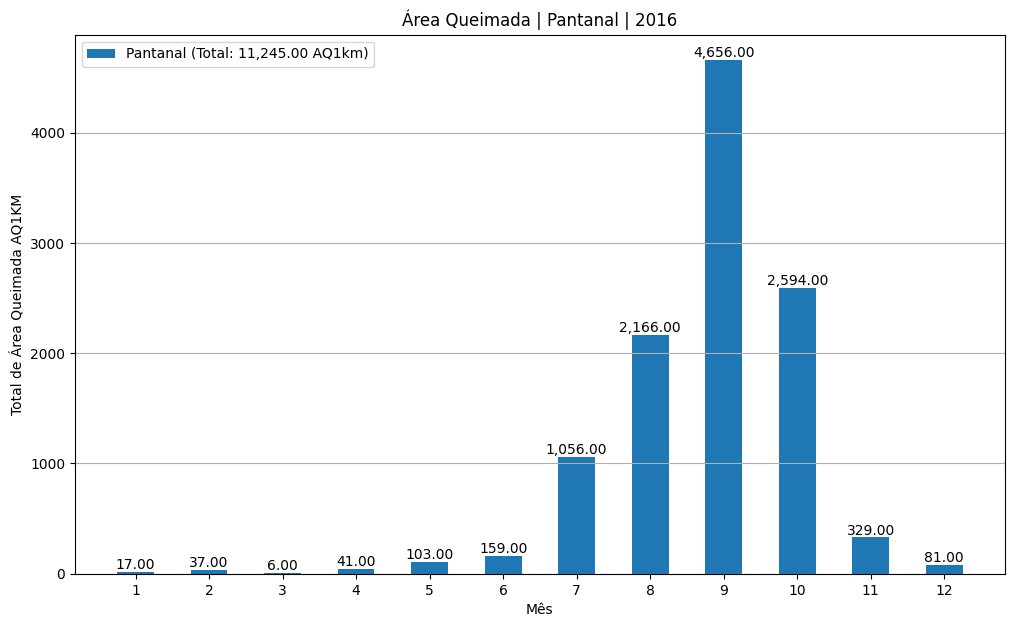

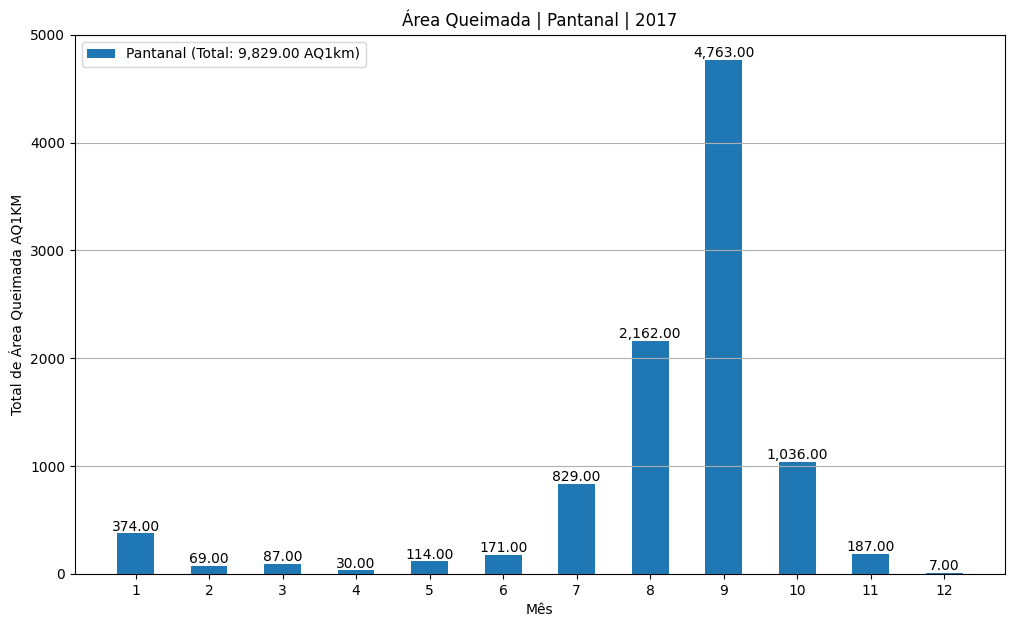

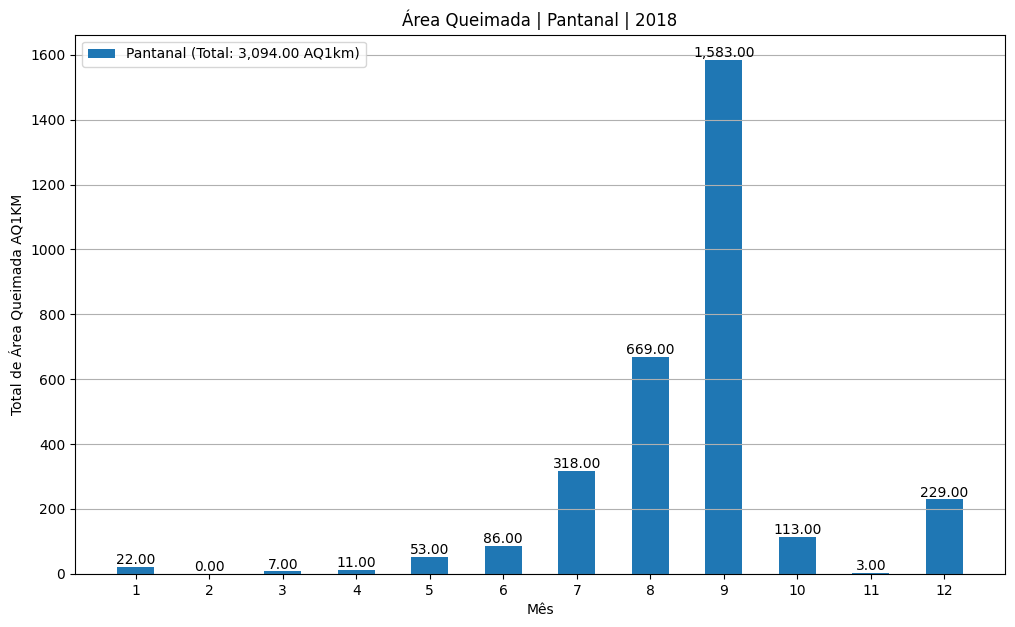

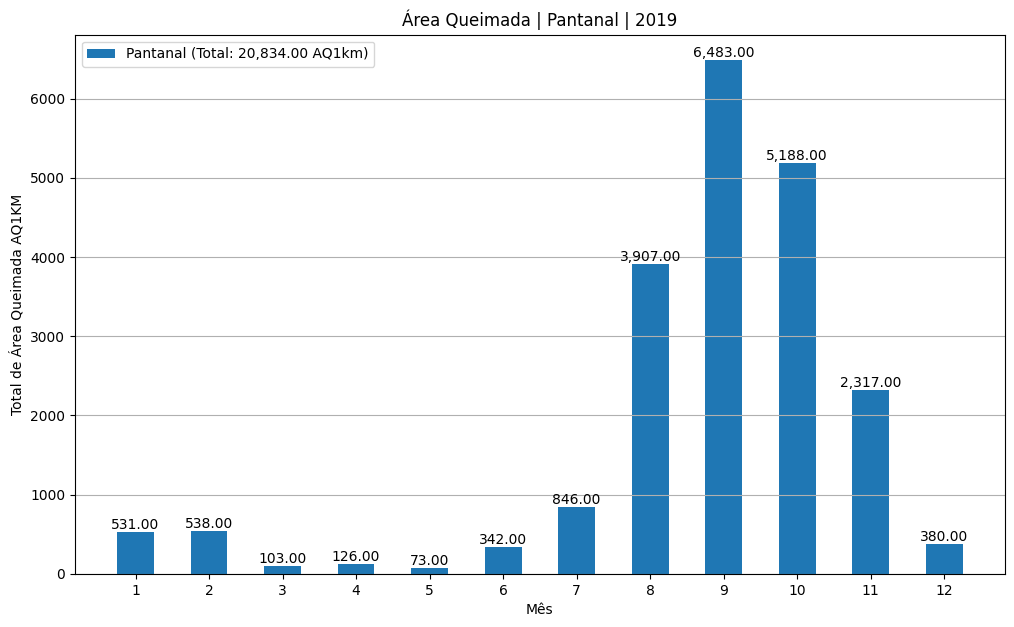

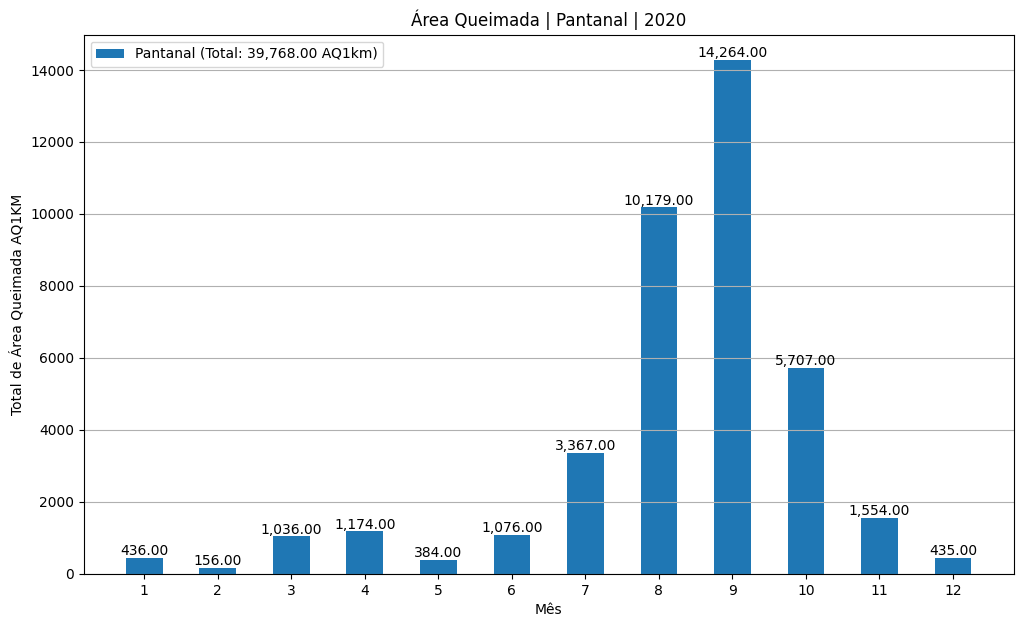

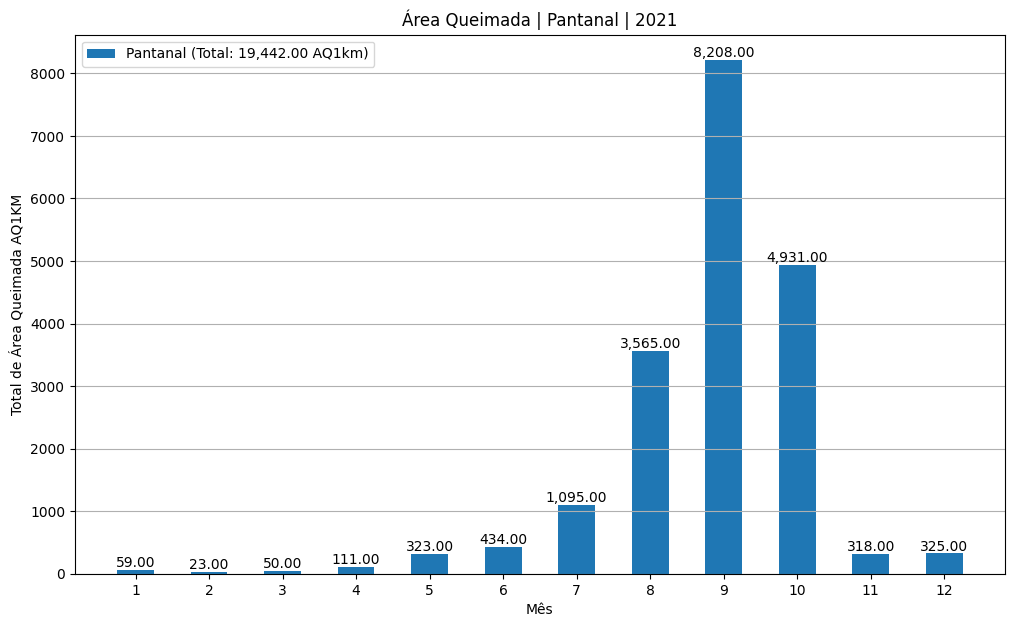

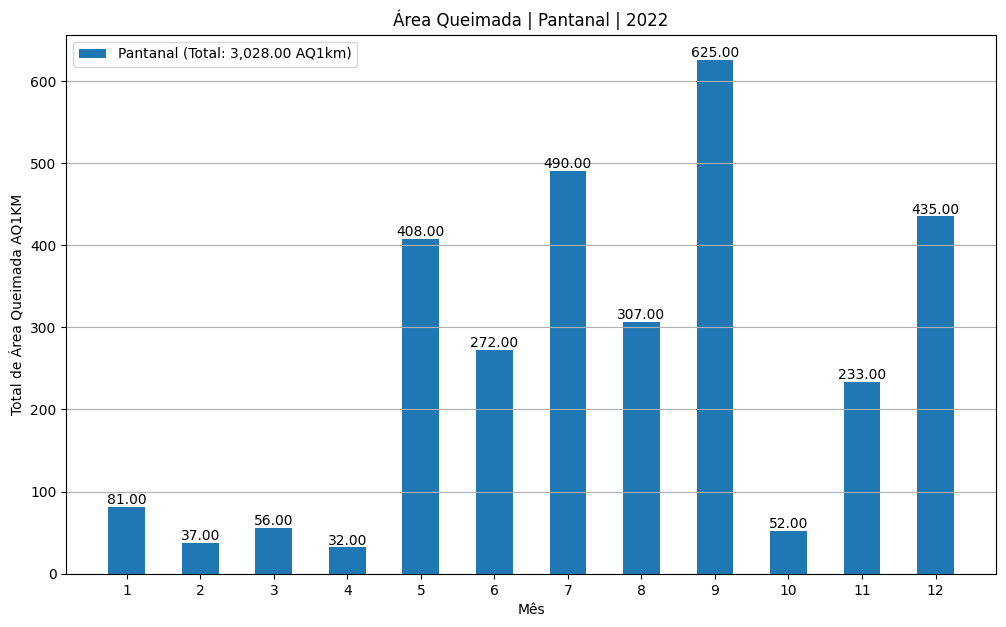

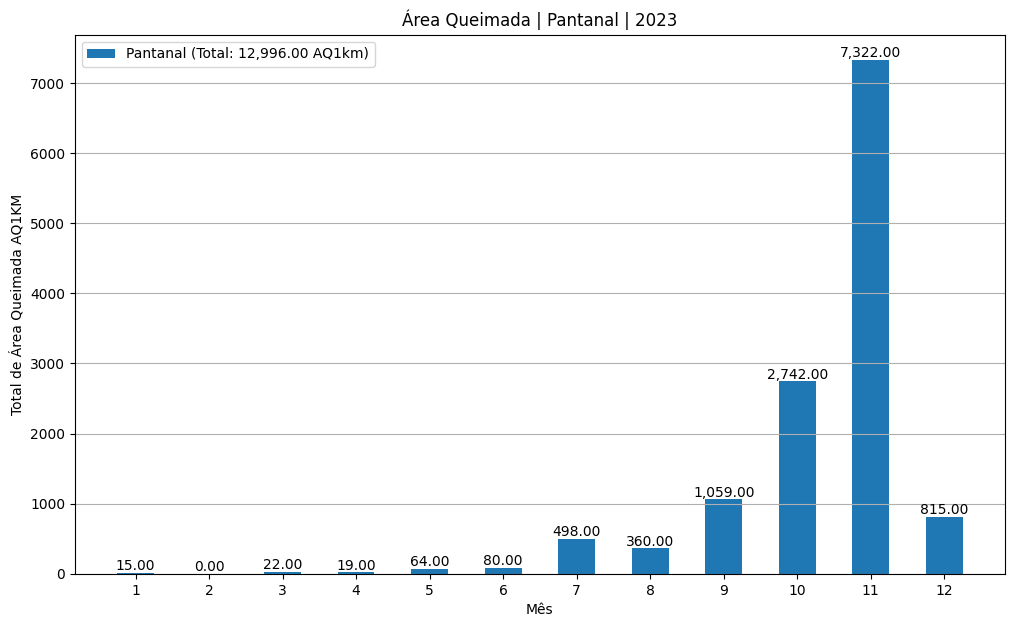

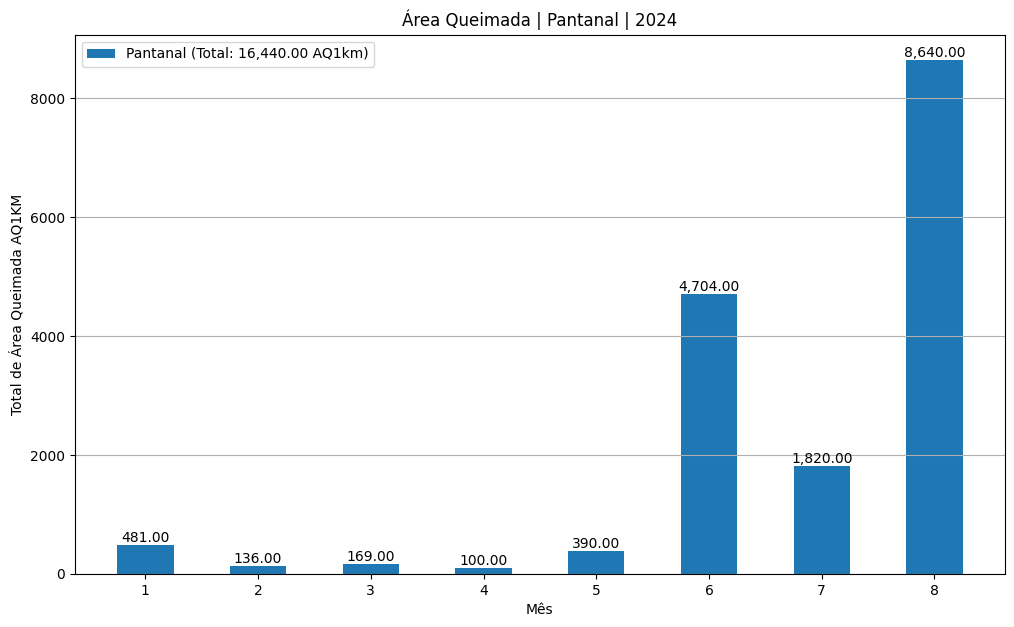

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Defina a região que deseja plotar (por exemplo, 'Região Norte')
for regiao_especifica in regioes[:-1]: 

    # Intervalo de anos
    for ano in range(2002, 2025):
        ano_especifico = ano
        df_ano = df[df['Ano'] == ano_especifico].groupby('Mês')[regiao_especifica].sum()

        # Calcular a soma total de todas as barras (área destruída no ano para essa região)
        soma_total = df_ano.sum()

        # Configuração para o gráfico de barras para uma região específica
        meses = np.arange(len(df_ano))  # Número de meses (índices)

        fig, ax = plt.subplots(figsize=(12, 7))

        # Plotar as barras para a região específica
        barras = ax.bar(meses, df_ano, width=0.5, label=f'{regiao_especifica} (Total: {soma_total:,.2f} AQ1km)')

        # Adicionar o quantitativo em cima de cada barra
        for barra in barras:
            altura = barra.get_height()
            ax.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:,.2f}', 
                    ha='center', va='bottom', fontsize=10)

        ax.set_xticks(meses)
        ax.set_xticklabels(df_ano.index)  # Exibir os meses no eixo x
        ax.set_title(f'Área Queimada | {regiao_especifica} | {ano_especifico}')
        ax.set_xlabel('Mês')
        ax.set_ylabel('Total de Área Queimada AQ1KM')
        
        # Exibir a legenda com a somatória total
        ax.legend(loc='upper left')
        ax.grid(axis='y')

        plt.show()

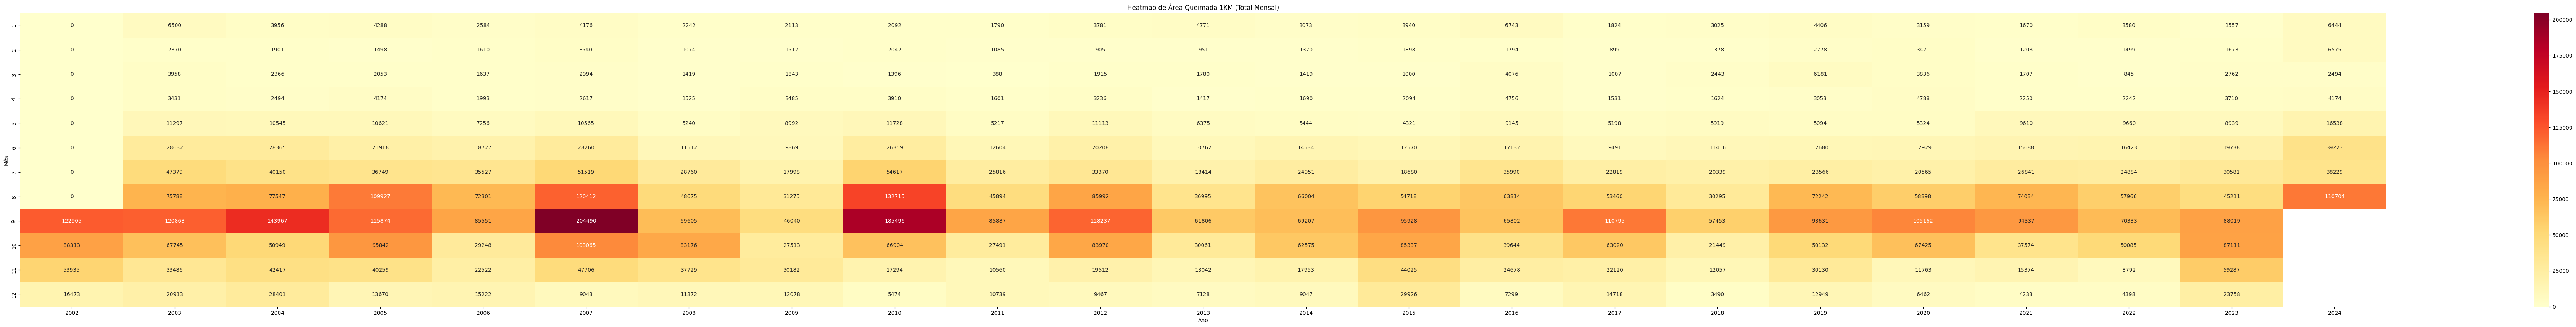

In [7]:
# Heatmap: Visualização das áreas destruídas por mês e por ano
plt.figure(figsize=(100, 10))
pivot_table = df.pivot_table(values='Total mensal', index='Mês', columns='Ano', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Heatmap de Área Queimada 1KM (Total Mensal)')
plt.xlabel('Ano')
plt.ylabel('Mês')
plt.show()
